In [3]:
import pickle 
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1
path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
data = read_pkl(path)
data

{'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute': {'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
          [118.    ,  41.22  ,   0.9795],
          [ 99.06  ,  43.    ,   0.985 ],
          ...,
          [101.44  , 243.4   ,   0.828 ],
          [106.6   , 245.8   ,   0.8804],
          [110.1   , 246.6   ,   0.8843]],
  
         [[108.6   ,  47.16  ,   0.966 ],
          [117.9   ,  40.2   ,   0.9604],
          [ 98.7   ,  41.8   ,   0.9736],
          ...,
          [103.    , 239.6   ,   0.842 ],
          [106.8   , 241.5   ,   0.8643],
          [109.25  , 242.2   ,   0.848 ]],
  
         [[108.    ,  46.28  ,   0.9556],
          [117.56  ,  39.7   ,   0.9785],
          [ 98.06  ,  40.66  ,   0.9683],
          ...,
          [ 99.    , 227.6   ,   0.7515],
          [102.1   , 230.5   ,   0.813 ],
          [104.06  , 231.9   ,   0.8125]],
  
         ...,
  
         [[101.75  ,  65.1   ,   0.935 ],
          [110.2  

In [1]:
from rtree import index

def create_r_tree(keypoints, skeleton):
    """
    Creates an R-tree index for the given keypoints and skeleton structure.

    Args:
        keypoints: A list of keypoint coordinates (x, y).
        skeleton: A list of tuples defining connections between keypoints.

    Returns:
        An R-tree index.
    """

    idx = index.Index()
    for i, (x, y) in enumerate(keypoints):
        # Create a bounding box around the keypoint
        bbox = (x - 5, y - 5, x + 5, y + 5)  # Adjust margin as needed
        idx.insert(i, bbox)

    return idx

# ... (Rest of your code)

# Create the R-tree
r_tree = create_r_tree(keypoints, SKELETON)

# Search for keypoints within a specific region (e.g., mouth area)
search_bbox = (x1, y1, x2, y2)  # Define the search area
matches = list(r_tree.intersection(search_bbox))

# Access the keypoints using the indices from `matches`
for match_index in matches:
    keypoint = keypoints[match_index]
    # ... process the keypoint

NameError: name 'keypoints' is not defined

In [5]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

# Updated Skeleton Structure
SKELETON = [
    # ... (Skeleton definition remains the same)
]

# Function to rotate keypoints by 180 degrees
def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints


def create_r_tree(keypoints, margin=5):
    """
    Creates an R-tree index for the given keypoints.

    Args:
        keypoints: A list of keypoint coordinates (x, y).
        margin: The margin around each keypoint for bounding box creation.

    Returns:
        An R-tree index.
    """

    idx = index.Index()
    for i, (x, y) in enumerate(keypoints):
        # Create a bounding box with a margin around the keypoint
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, data=i)  # Store keypoint index in data field

    return idx


# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize for a specific video file
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute-default-0/1/01April_2010_Thursday_heute":
        # Create R-tree for keypoints
        r_tree = create_r_tree(keypoints)

        # Iterate through each frame, limit to first 10 frames
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)

            # Create the plot
            plt.figure(figsize=(28, 36))

            # Search for mouth keypoints (assuming indices 71-82)
            mouth_bbox = (rotated_keypoints[71][0] - 10, rotated_keypoints[71][1] - 10,
                          rotated_keypoints[82][0] + 10, rotated_keypoints[82][1] + 10)  # Adjust search area
            mouth_indices = list(r_tree.intersection(mouth_bbox))

            # Access and plot mouth keypoints
            mouth_keypoints = rotated_keypoints[mouth_indices]
            plt.scatter(mouth_keypoints[:, 0], -mouth_keypoints[:, 1], color='red', s=10, label='Mouth')

            # Plot remaining keypoints (optional)
            # ... (similar logic for plotting remaining keypoints)

            # Add labels and customize plot
            # ... (similar logic for adding labels and plot customization)

            # Show the plot
            plt.show()

        # Break out of the loop after visualizing the first 10 frames
        break

In [7]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Updated Skeleton Structure with comprehensive keypoint mapping
SKELETON = [
    # Major body parts and their respective keypoint indices
    ('Head', [0, 1, 2, 3, 4]),
    ('Neck', [5, 6]),
    ('Shoulders', [7, 8]),
    ('Arms', [9, 10, 11, 12, 13, 14]),
    ('Torso', [15, 16, 17]),
    ('Hips', [18, 19]),
    ('Legs', [20, 21, 22, 23, 24, 25]),
    ('Mouth', [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])
]

def rotate_keypoints_180(keypoints):
    """
    Rotate keypoints by 180 degrees.
    
    Args:
        keypoints (np.ndarray): Array of keypoint coordinates.
    
    Returns:
        np.ndarray: Rotated keypoints.
    """
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]  # Invert x
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]  # Invert y
    return rotated_keypoints

def create_r_tree(keypoints, margin=5):
    """
    Creates an R-tree index for the given keypoints.

    Args:
        keypoints (np.ndarray): Array of keypoint coordinates.
        margin (int, optional): Margin around each keypoint for bounding box. Defaults to 5.

    Returns:
        index.Index: R-tree index of keypoints.
    """
    idx = index.Index()
    for i, (x, y) in enumerate(keypoints):
        # Create a bounding box with a margin around the keypoint
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox)
    return idx

def find_keypoints_in_region(r_tree, keypoints, region_bbox):
    """
    Find keypoints within a specific region using R-tree indexing.

    Args:
        r_tree (index.Index): R-tree index of keypoints.
        keypoints (np.ndarray): Full keypoint array.
        region_bbox (tuple): Bounding box of the region to search.

    Returns:
        np.ndarray: Keypoints found within the region.
    """
    # Find indices of keypoints in the region
    region_indices = list(r_tree.intersection(region_bbox))
    
    # Return the corresponding keypoints
    return keypoints[region_indices]

def visualize_keypoints_with_rtree(keypoints, r_tree, title='Keypoint Visualization'):
    """
    Visualize keypoints with R-tree region highlighting.

    Args:
        keypoints (np.ndarray): Full keypoint array.
        r_tree (index.Index): R-tree index of keypoints.
        title (str, optional): Plot title. Defaults to 'Keypoint Visualization'.
    """
    plt.figure(figsize=(15, 10))
    
    # Plot all keypoints
    plt.scatter(keypoints[:, 0], -keypoints[:, 1], color='blue', s=10, alpha=0.5, label='All Keypoints')
    
    # Highlight specific body regions
    body_regions = {
        'Mouth': (71, 82),
        'Head': (0, 4),
        'Torso': (15, 17)
    }
    
    colors = {'Mouth': 'red', 'Head': 'green', 'Torso': 'purple'}
    
    for region_name, (start_idx, end_idx) in body_regions.items():
        # Define bounding box for the region
        region_keypoints = keypoints[start_idx:end_idx+1]
        
        # Compute region bounding box
        x_min, y_min = np.min(region_keypoints, axis=0)
        x_max, y_max = np.max(region_keypoints, axis=0)
        
        # Search R-tree for keypoints in this region
        region_bbox = (x_min-5, y_min-5, x_max+5, y_max+5)
        found_keypoints = find_keypoints_in_region(r_tree, keypoints, region_bbox)
        
        # Plot found keypoints
        plt.scatter(found_keypoints[:, 0], -found_keypoints[:, 1], 
                    color=colors[region_name], s=50, label=f'{region_name} Keypoints')
        
        # Draw bounding box
        rect = patches.Rectangle((x_min, -y_max), 
                                 width=x_max-x_min, 
                                 height=y_max-y_min, 
                                 fill=False, 
                                 edgecolor=colors[region_name], 
                                 linewidth=2)
        plt.gca().add_patch(rect)
    
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def main(data):
    """
    Main function to process and visualize keypoint data.

    Args:
        data (dict): Dictionary containing video keypoint data.
    """
    for video_key, video_data in data.items():
        # Filter for a specific video (if needed)
        if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute-default-0/1/01April_2010_Thursday_heute":
            keypoints = video_data['keypoints']
            
            # Iterate through first few frames
            for frame_index, frame_keypoints in enumerate(keypoints[:2]):
                # Rotate keypoints
                rotated_keypoints = rotate_keypoints_180(frame_keypoints)
                
                # Create R-tree index
                r_tree = create_r_tree(rotated_keypoints)
                
                # Visualize keypoints with R-tree regions
                visualize_keypoints_with_rtree(
                    rotated_keypoints, 
                    r_tree, 
                    title=f'Keypoint Analysis - Frame {frame_index}'
                )

# Note: Ensure 'data' is defined before calling main()
# main(data)  # Uncomment when 'data' is available

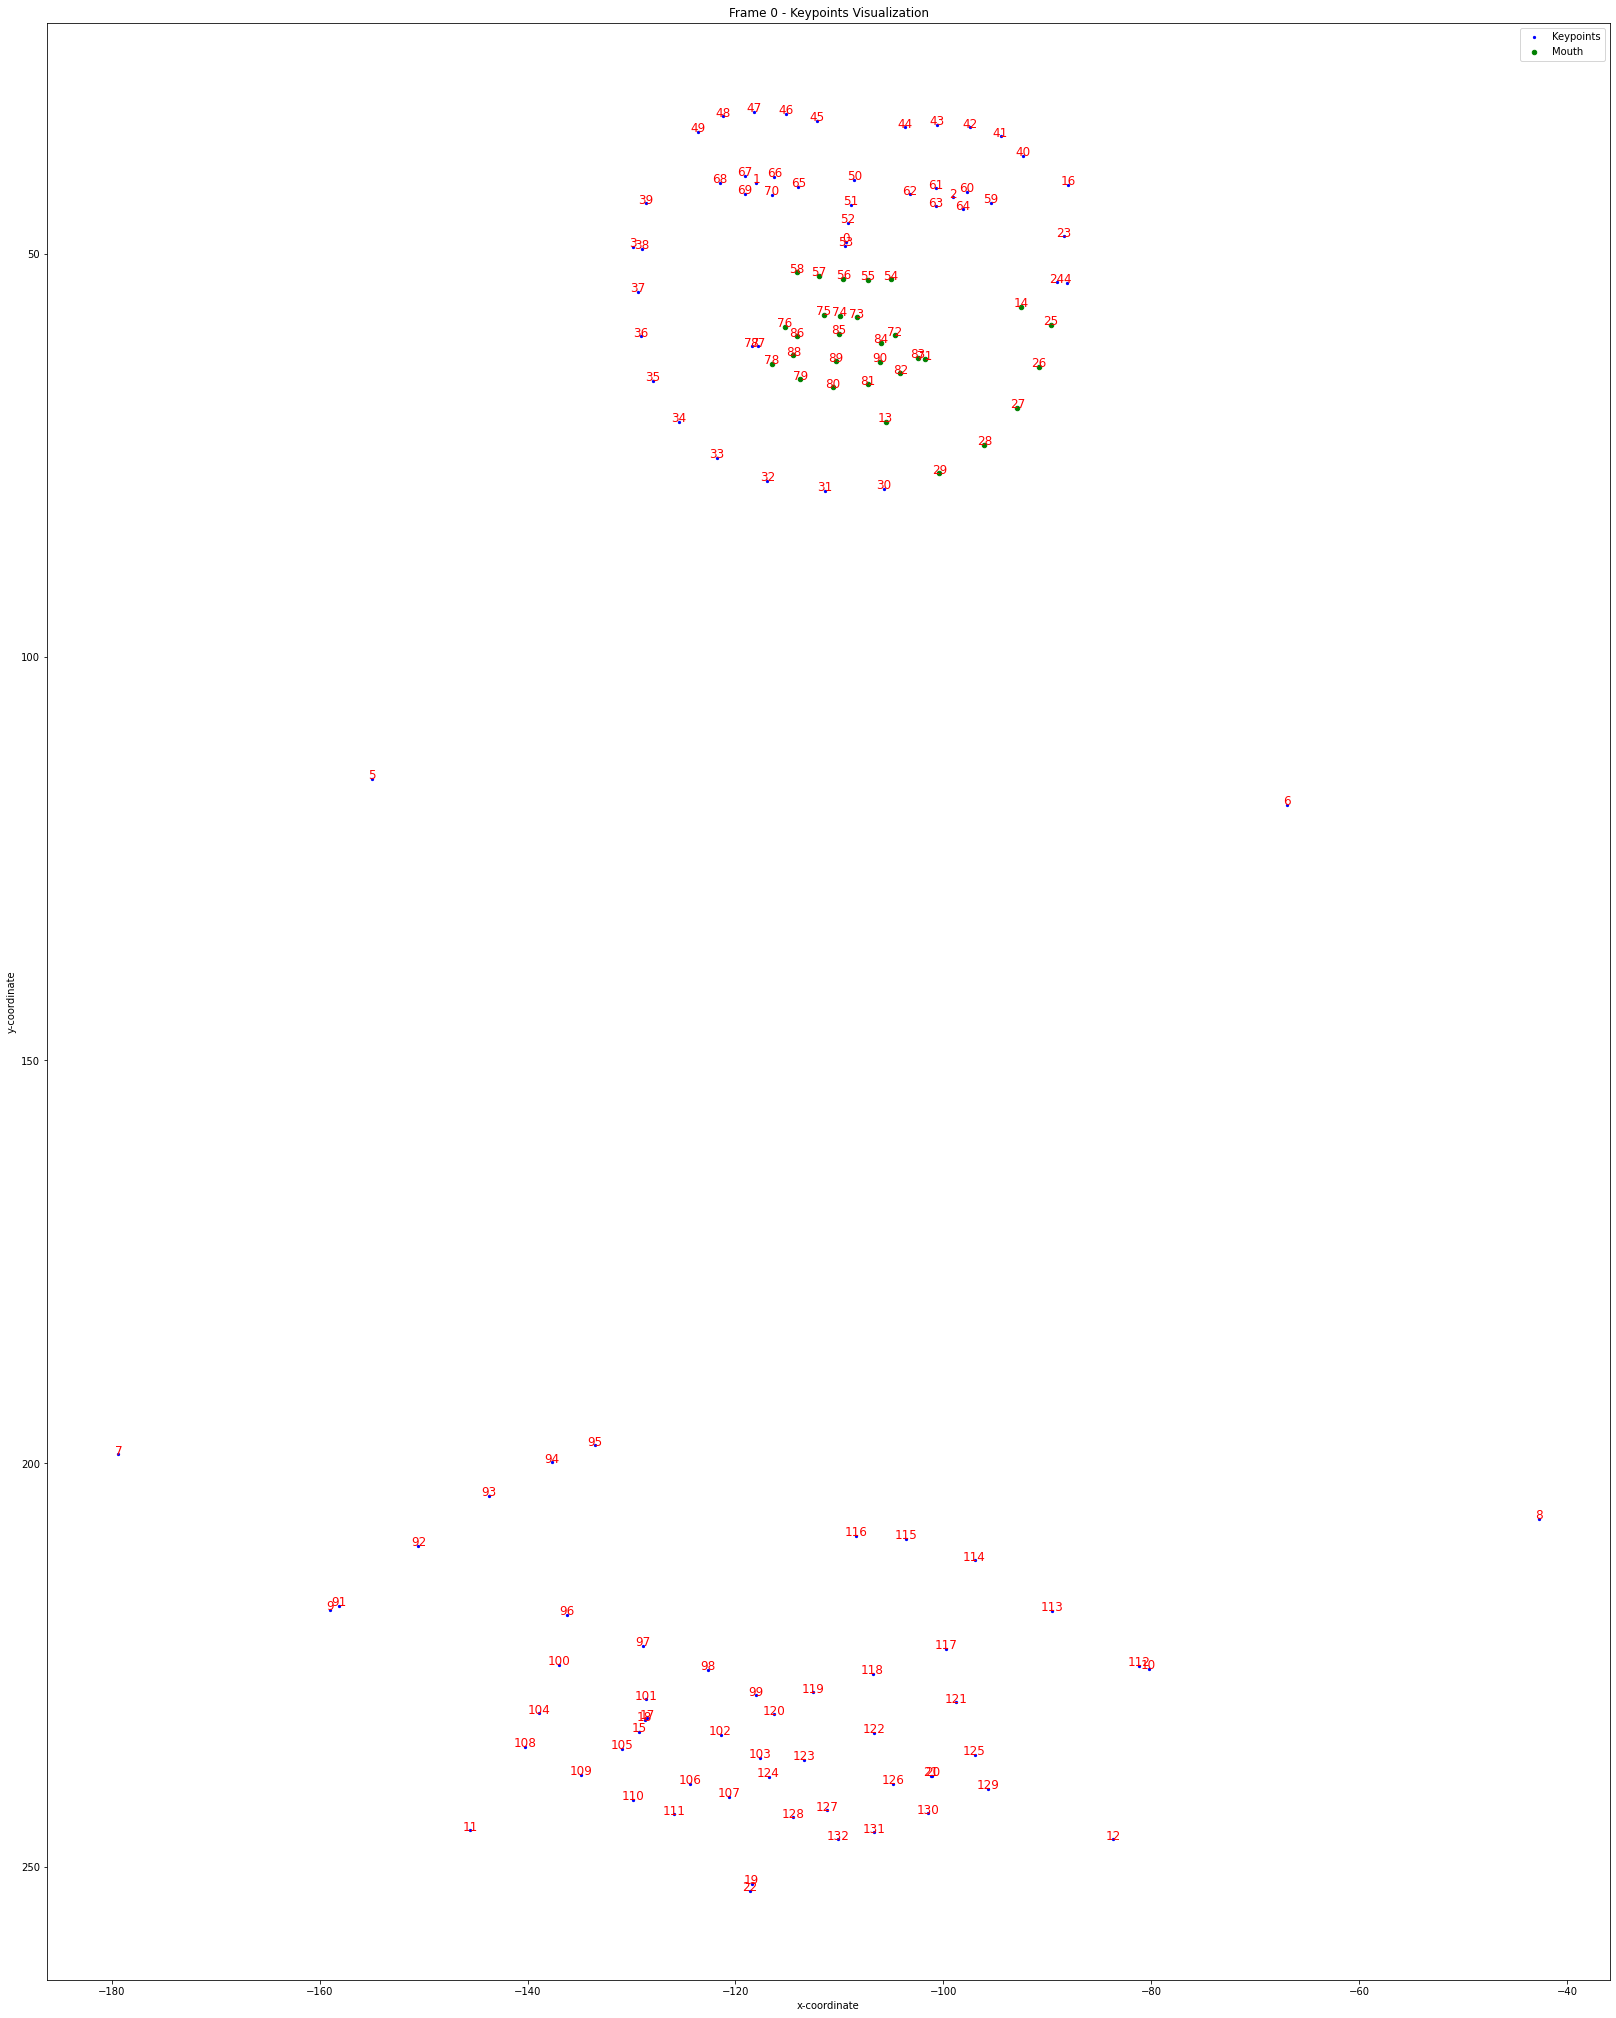

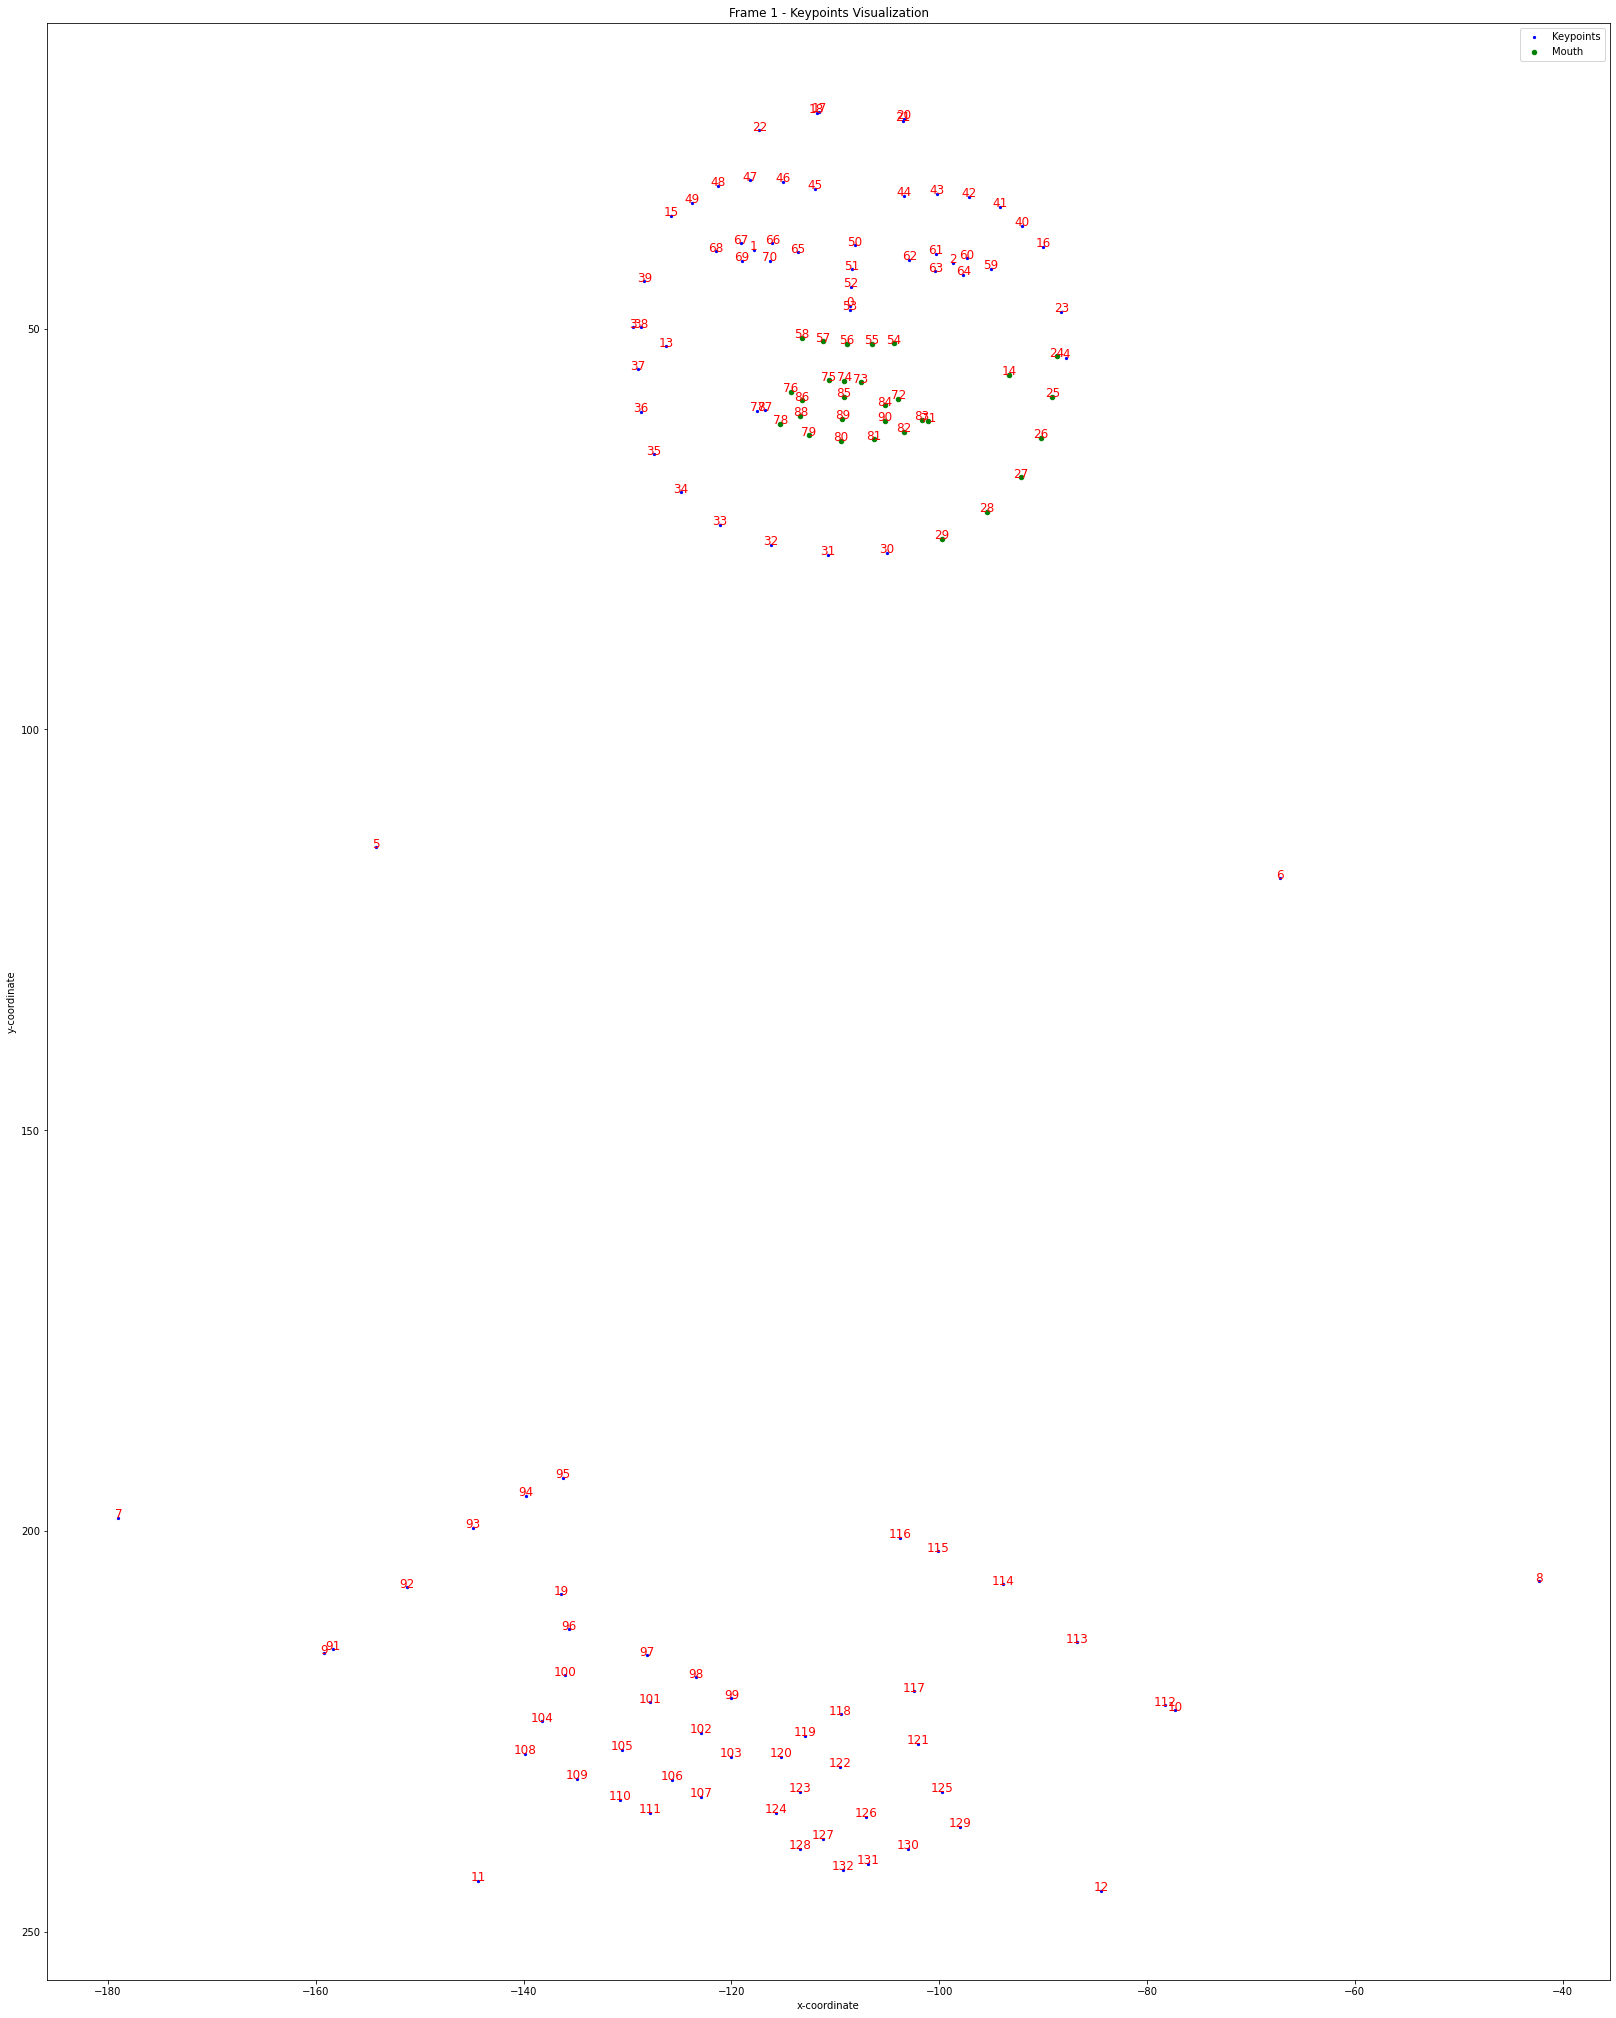

In [8]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

# Updated Skeleton Structure
SKELETON = [
    # ... (Skeleton definition remains the same)
]

def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]
    return rotated_keypoints

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, _) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            r_tree = create_r_tree(rotated_keypoints)

            plt.figure(figsize=(28, 36))

            # Plot all keypoints
            plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

            # Number each keypoint
            for i, (x, y, _) in enumerate(rotated_keypoints):
                plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')

            # Use R-tree to find and highlight specific keypoints (e.g., mouth)
            mouth_bbox = (rotated_keypoints[71][0] - 10, rotated_keypoints[71][1] - 10,
                          rotated_keypoints[82][0] + 10, rotated_keypoints[82][1] + 10)
            mouth_indices = list(r_tree.intersection(mouth_bbox))
            mouth_keypoints = rotated_keypoints[mouth_indices]
            plt.scatter(mouth_keypoints[:, 0], -mouth_keypoints[:, 1], color='green', s=20, label='Mouth')

            # Add bonds based on the skeleton structure
            for joint_start, joint_end in SKELETON:
                x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
                x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
                plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)

            plt.title(f"Frame {frame_index} - Keypoints Visualization")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()

            plt.show()

        break

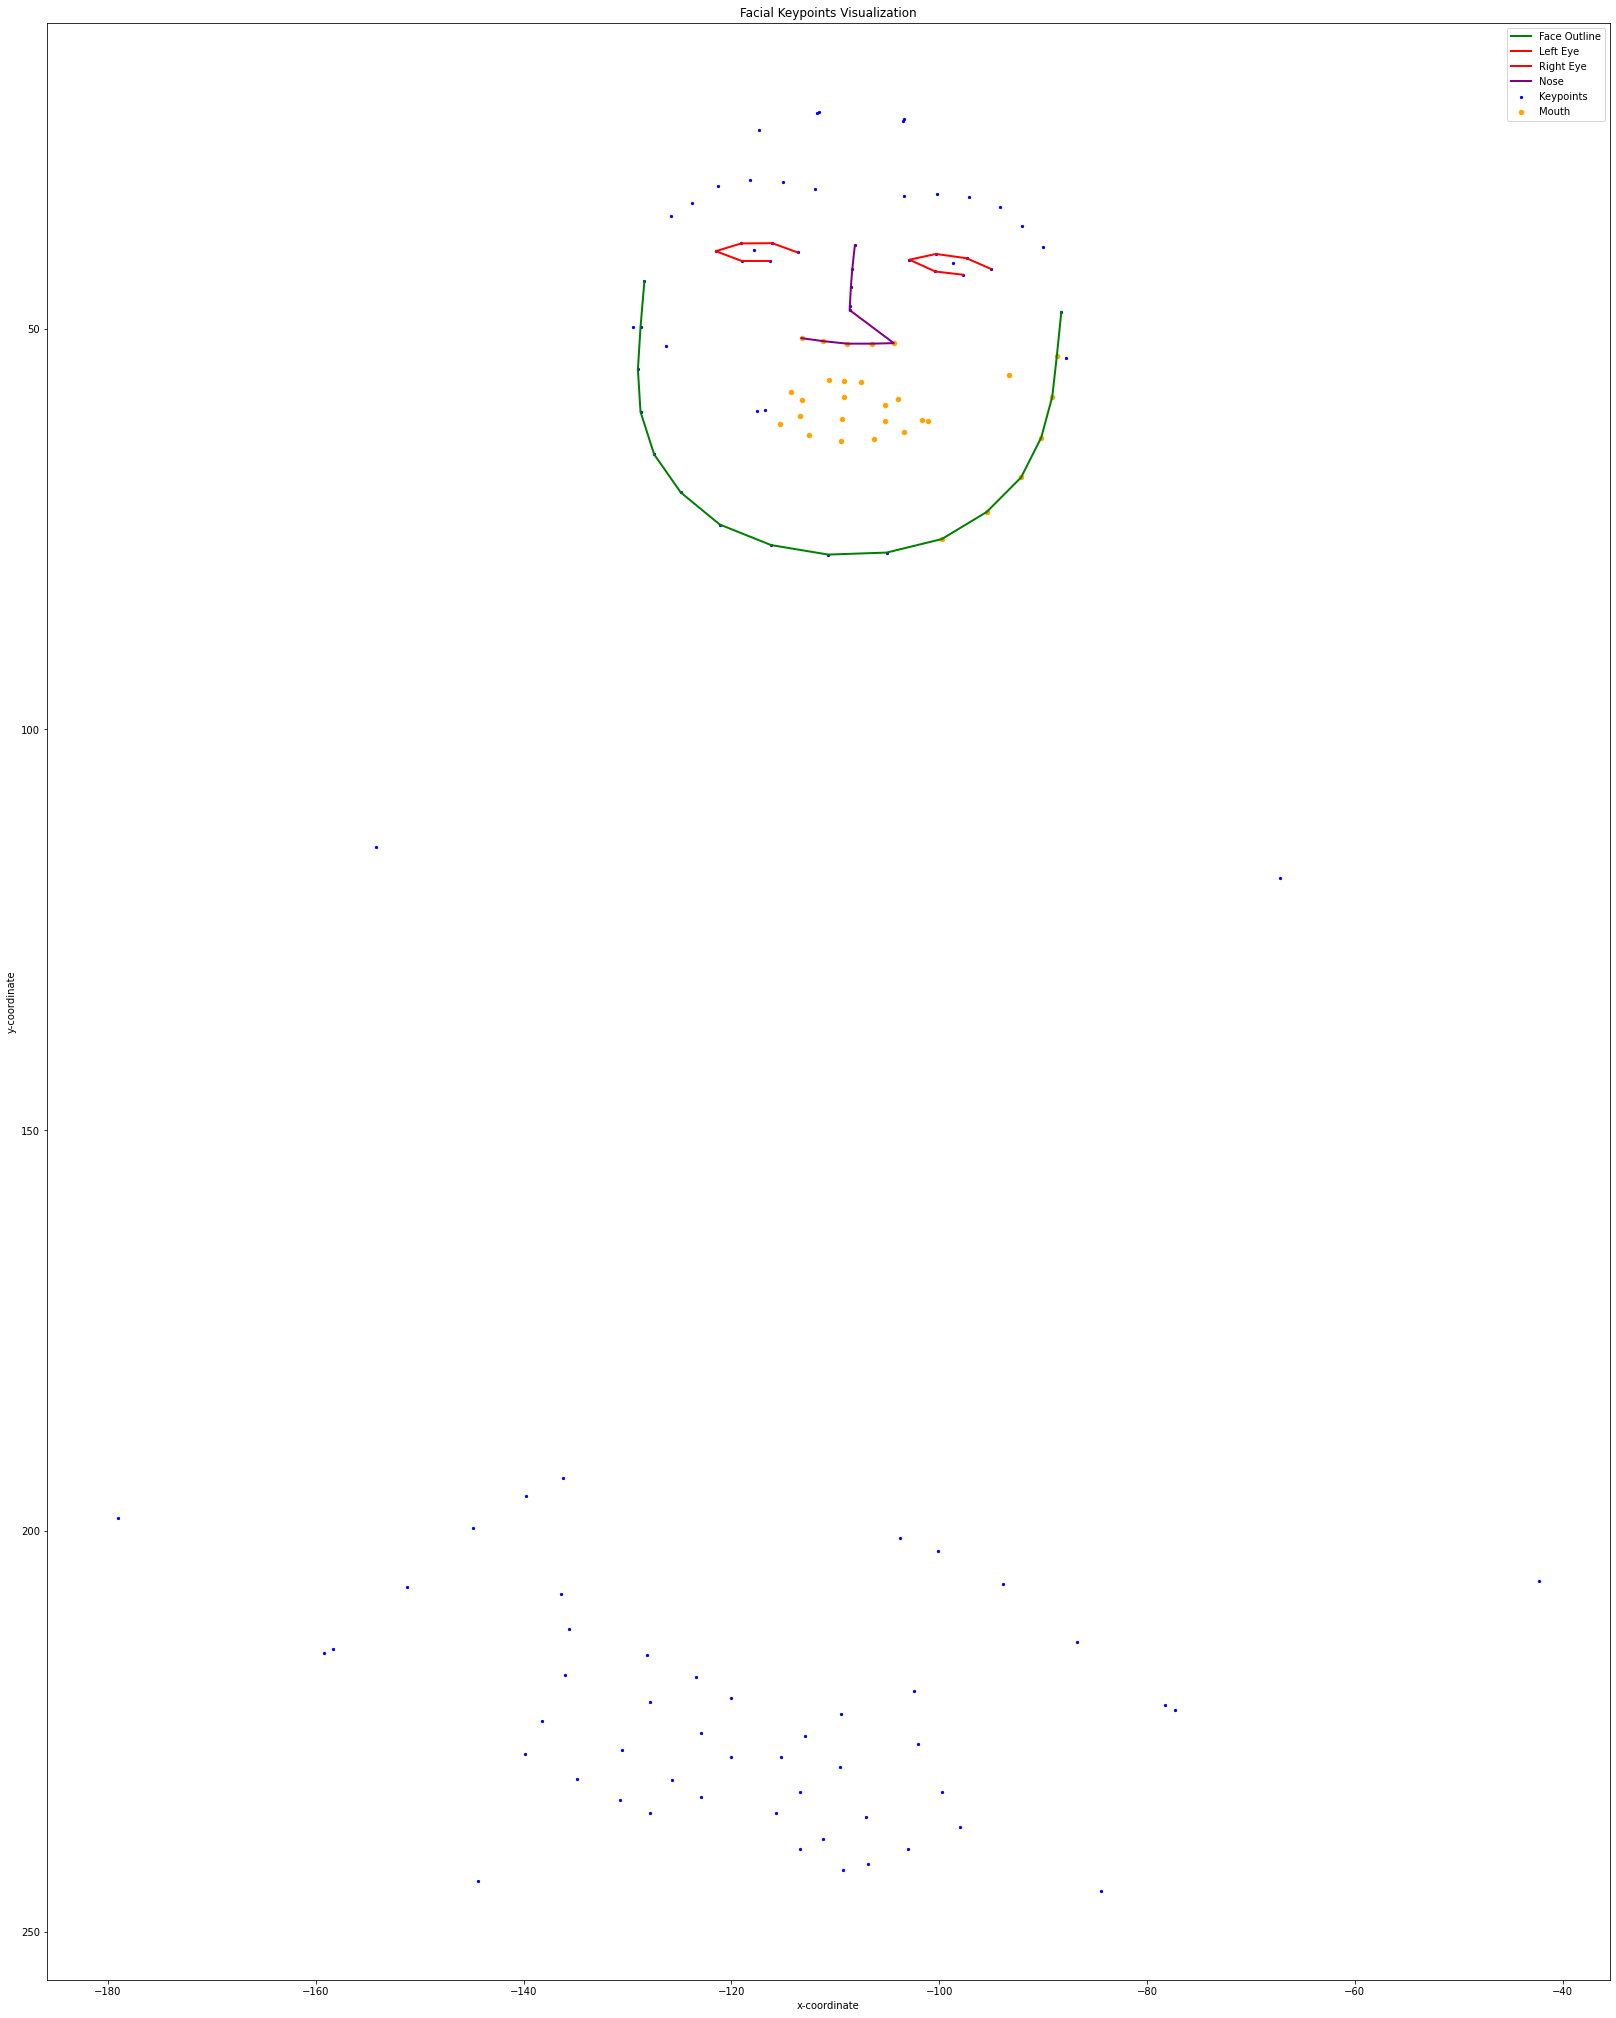

In [9]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, _) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def draw_facial_keypoints(rotated_keypoints, r_tree):
    plt.figure(figsize=(28, 36))

    # Draw all keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

    # Face outline (assuming keypoints 23-39 form the face outline)
    face_outline = list(range(23, 40))
    face_keypoints = rotated_keypoints[face_outline]
    plt.plot(face_keypoints[:, 0], -face_keypoints[:, 1], color='green', linewidth=2, label='Face Outline')

    # Eyes (assuming keypoints 59-70 are for eyes)
    left_eye = list(range(59, 65))
    right_eye = list(range(65, 71))
    plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], color='red', linewidth=2, label='Left Eye')
    plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], color='red', linewidth=2, label='Right Eye')

    # Nose (assuming keypoints 50-58 are for nose)
    nose = list(range(50, 59))
    plt.plot(rotated_keypoints[nose, 0], -rotated_keypoints[nose, 1], color='purple', linewidth=2, label='Nose')

    # Mouth (using R-tree to find mouth keypoints)
    mouth_bbox = (rotated_keypoints[71][0] - 10, rotated_keypoints[71][1] - 10,
                  rotated_keypoints[82][0] + 10, rotated_keypoints[82][1] + 10)
    mouth_indices = list(r_tree.intersection(mouth_bbox))
    mouth_keypoints = rotated_keypoints[mouth_indices]
    plt.scatter(mouth_keypoints[:, 0], -mouth_keypoints[:, 1], color='orange', s=20, label='Mouth')

    plt.title("Facial Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.gca().invert_yaxis()

    plt.show()

# In the main loop, after rotating keypoints:
r_tree = create_r_tree(rotated_keypoints)
draw_facial_keypoints(rotated_keypoints, r_tree)

In [10]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_r_tree(keypoints, margin=5):
    """
    Create an R-tree index for keypoints with a specified margin.
    
    Args:
        keypoints (np.ndarray): Array of keypoint coordinates
        margin (float, optional): Margin around each keypoint. Defaults to 5.
    
    Returns:
        index.Index: R-tree spatial index
    """
    idx = index.Index()
    for i, point in enumerate(keypoints):
        x, y = point[:2]  # Ensure we only use x and y coordinates
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def draw_facial_keypoints(rotated_keypoints, r_tree):
    """
    Visualize facial keypoints with R-tree assisted region detection.
    
    Args:
        rotated_keypoints (np.ndarray): Rotated keypoint coordinates
        r_tree (index.Index): R-tree spatial index of keypoints
    """
    plt.figure(figsize=(28, 36))
    
    # Draw all keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], 
                color='blue', s=5, label='All Keypoints', alpha=0.5)
    
    # Face Regions and their corresponding keypoint indices
    regions = {
        'Face Outline': list(range(23, 40)),
        'Left Eye': list(range(59, 65)),
        'Right Eye': list(range(65, 71)),
        'Nose': list(range(50, 59)),
        'Mouth': list(range(71, 83))
    }
    
    # Colors for different regions
    colors = {
        'Face Outline': 'green',
        'Left Eye': 'red',
        'Right Eye': 'red',
        'Nose': 'purple',
        'Mouth': 'orange'
    }
    
    # Visualization of different facial regions
    for region_name, region_indices in regions.items():
        region_keypoints = rotated_keypoints[region_indices]
        
        # Plot region keypoints
        if region_name in ['Left Eye', 'Right Eye', 'Nose']:
            # For these regions, use line plot
            plt.plot(region_keypoints[:, 0], -region_keypoints[:, 1], 
                     color=colors[region_name], linewidth=2, label=region_name)
        elif region_name == 'Mouth':
            # For mouth, use R-tree to find and highlight keypoints
            x_min, y_min = np.min(region_keypoints, axis=0)
            x_max, y_max = np.max(region_keypoints, axis=0)
            
            mouth_bbox = (x_min - 10, y_min - 10, x_max + 10, y_max + 10)
            mouth_indices = list(r_tree.intersection(mouth_bbox))
            
            mouth_keypoints = rotated_keypoints[mouth_indices]
            plt.scatter(mouth_keypoints[:, 0], -mouth_keypoints[:, 1], 
                        color=colors[region_name], s=20, label=region_name)
            
            # Optional: Add bounding box for mouth region
            rect = patches.Rectangle(
                (x_min, -y_max), 
                width=x_max-x_min, 
                height=y_max-y_min, 
                fill=False, 
                edgecolor=colors[region_name], 
                linewidth=2
            )
            plt.gca().add_patch(rect)
        else:
            # For face outline, use line plot
            plt.plot(region_keypoints[:, 0], -region_keypoints[:, 1], 
                     color=colors[region_name], linewidth=2, label=region_name)
    
    # Customize plot
    plt.title("Facial Keypoints Visualization with R-tree Indexing")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def main(data):
    """
    Main processing function for keypoint data.
    
    Args:
        data (dict): Dictionary containing video keypoint data
    """
    for video_key, video_data in data.items():
        # Optional: Filter for specific video
        if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute-default-0/1/01April_2010_Thursday_heute":
            keypoints = video_data['keypoints']
            
            # Process first few frames
            for frame_index, frame_keypoints in enumerate(keypoints[:2]):
                # Rotate keypoints 180 degrees
                rotated_keypoints = np.copy(frame_keypoints)
                rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]
                rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]
                
                # Create R-tree index
                r_tree = create_r_tree(rotated_keypoints)
                
                # Visualize facial keypoints
                draw_facial_keypoints(rotated_keypoints, r_tree)

# Uncomment and call main(data) when data is available
# main(data)

/home/muhiddin/miniconda3/envs/slt4/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/muhiddin/miniconda3/envs/slt4/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/muhiddin/miniconda3/envs/slt4/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/muhiddin/miniconda3/envs/slt4/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/muhiddin/miniconda3/envs/slt4/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/muhiddin/minic

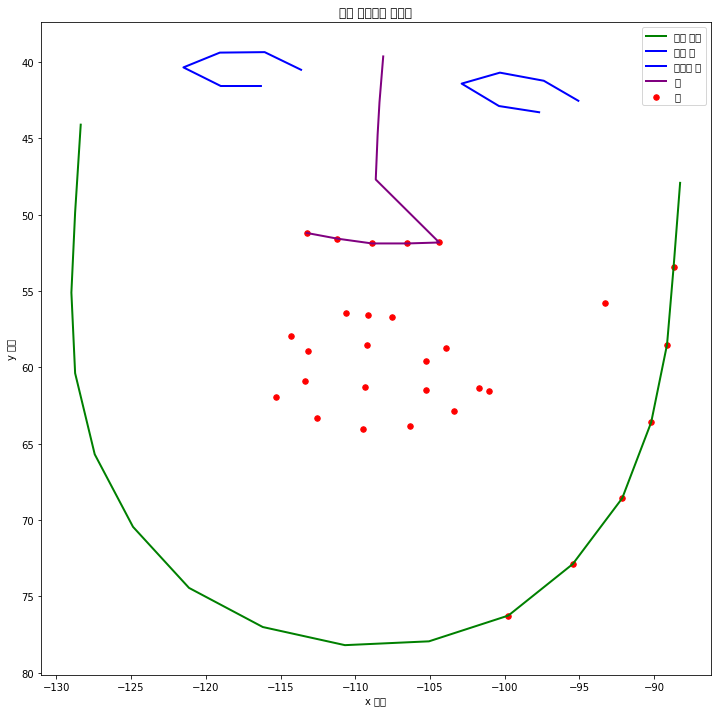

In [11]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, _) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def draw_facial_keypoints(rotated_keypoints, r_tree):
    plt.figure(figsize=(12, 12))

    # 얼굴 윤곽 (Face outline)
    face_outline = list(range(23, 40))
    face_keypoints = rotated_keypoints[face_outline]
    plt.plot(face_keypoints[:, 0], -face_keypoints[:, 1], color='green', linewidth=2, label='얼굴 윤곽')

    # 눈 (Eyes)
    left_eye = list(range(59, 65))
    right_eye = list(range(65, 71))
    plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], color='blue', linewidth=2, label='왼쪽 눈')
    plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], color='blue', linewidth=2, label='오른쪽 눈')

    # 코 (Nose)
    nose = list(range(50, 59))
    plt.plot(rotated_keypoints[nose, 0], -rotated_keypoints[nose, 1], color='purple', linewidth=2, label='코')

    # 입 (Mouth) - R-tree 사용
    mouth_bbox = (rotated_keypoints[71][0] - 10, rotated_keypoints[71][1] - 10,
                  rotated_keypoints[82][0] + 10, rotated_keypoints[82][1] + 10)
    mouth_indices = list(r_tree.intersection(mouth_bbox))
    mouth_keypoints = rotated_keypoints[mouth_indices]
    plt.scatter(mouth_keypoints[:, 0], -mouth_keypoints[:, 1], color='red', s=30, label='입')

    plt.title("얼굴 키포인트 시각화")
    plt.xlabel('x 좌표')
    plt.ylabel('y 좌표')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

# 메인 루프에서 사용:
rotated_keypoints = rotate_keypoints_180(frame_keypoints)
r_tree = create_r_tree(rotated_keypoints)
draw_facial_keypoints(rotated_keypoints, r_tree)

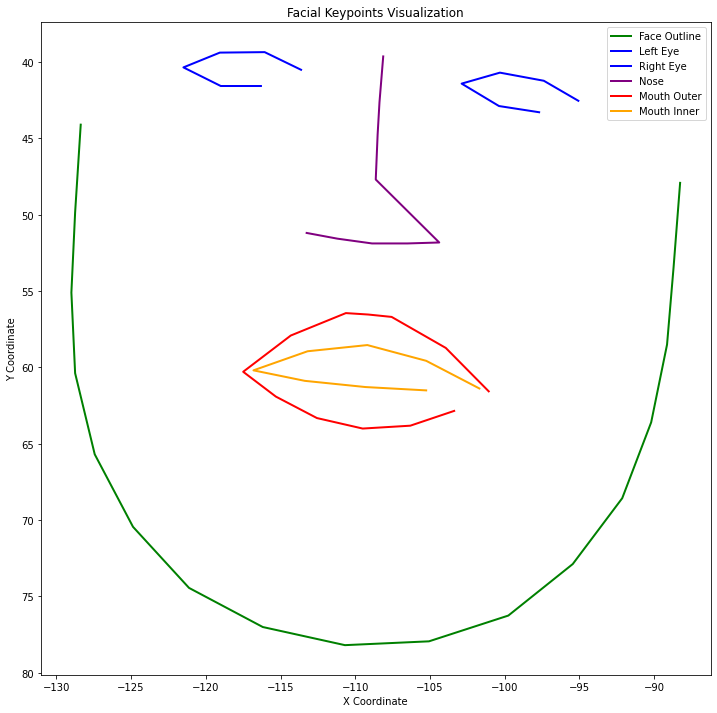

In [12]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, _) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def draw_facial_keypoints(rotated_keypoints, r_tree):
    plt.figure(figsize=(12, 12))

    # Face outline
    face_outline = list(range(23, 40))
    face_keypoints = rotated_keypoints[face_outline]
    plt.plot(face_keypoints[:, 0], -face_keypoints[:, 1], color='green', linewidth=2, label='Face Outline')

    # Eyes
    left_eye = list(range(59, 65))
    right_eye = list(range(65, 71))
    plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], color='blue', linewidth=2, label='Left Eye')
    plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], color='blue', linewidth=2, label='Right Eye')

    # Nose
    nose = list(range(50, 59))
    plt.plot(rotated_keypoints[nose, 0], -rotated_keypoints[nose, 1], color='purple', linewidth=2, label='Nose')

    # Mouth - Outer and Inner points
    outer_mouth = list(range(71, 83))
    inner_mouth = list(range(83, 91))
    
    # Outer mouth contour
    plt.plot(rotated_keypoints[outer_mouth, 0], -rotated_keypoints[outer_mouth, 1], color='red', linewidth=2, label='Mouth Outer')
    
    # Inner mouth contour
    plt.plot(rotated_keypoints[inner_mouth, 0], -rotated_keypoints[inner_mouth, 1], color='orange', linewidth=2, label='Mouth Inner')

    plt.title("Facial Keypoints Visualization")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

# In the main loop, after rotating keypoints:
r_tree = create_r_tree(rotated_keypoints)
draw_facial_keypoints(rotated_keypoints, r_tree)

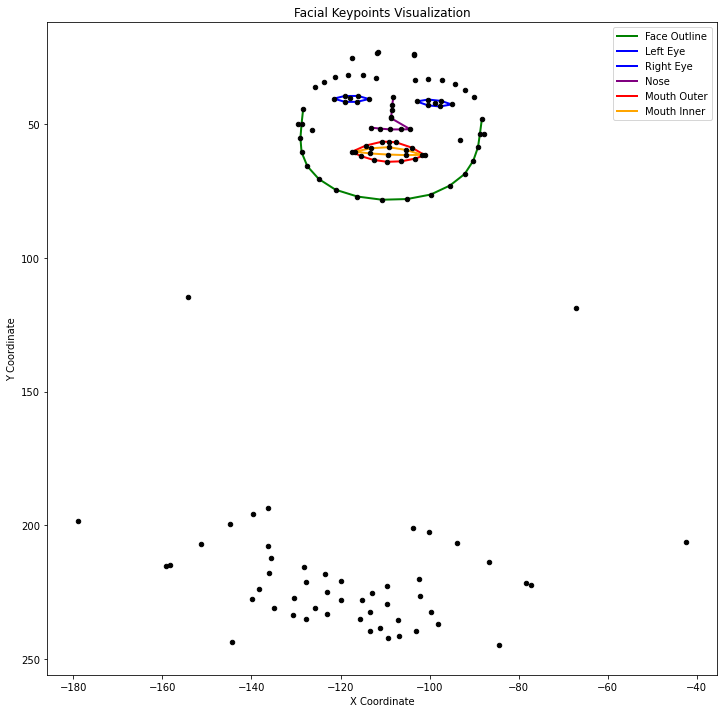

In [15]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, _) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def draw_facial_keypoints(rotated_keypoints, r_tree):
    plt.figure(figsize=(12, 12))

    # Face outline
    face_outline = list(range(23, 40))
    face_keypoints = rotated_keypoints[face_outline]
    plt.plot(face_keypoints[:, 0], -face_keypoints[:, 1], color='green', linewidth=2, label='Face Outline')

    # Eyes
    left_eye = list(range(59, 65)) + [59]  # Add first point again to close the loop
    right_eye = list(range(65, 71)) + [65]  # Add first point again to close the loop
    plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], color='blue', linewidth=2, label='Left Eye')
    plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], color='blue', linewidth=2, label='Right Eye')

    # Nose
    nose = list(range(50, 59))
    plt.plot(rotated_keypoints[nose, 0], -rotated_keypoints[nose, 1], color='purple', linewidth=2, label='Nose')

    # Mouth - Outer and Inner points
    outer_mouth = list(range(71, 83)) + [71]  # Add first point again to close the loop
    inner_mouth = list(range(83, 91)) + [83]  # Add first point again to close the loop
    
    # Outer mouth contour
    plt.plot(rotated_keypoints[outer_mouth, 0], -rotated_keypoints[outer_mouth, 1], color='red', linewidth=2, label='Mouth Outer')
    
    # Inner mouth contour
    plt.plot(rotated_keypoints[inner_mouth, 0], -rotated_keypoints[inner_mouth, 1], color='orange', linewidth=2, label='Mouth Inner')

    # Plot all facial keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=20, zorder=10)

    plt.title("Facial Keypoints Visualization")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()
    
# In the main loop, after rotating keypoints:
r_tree = create_r_tree(rotated_keypoints)
draw_facial_keypoints(rotated_keypoints, r_tree)

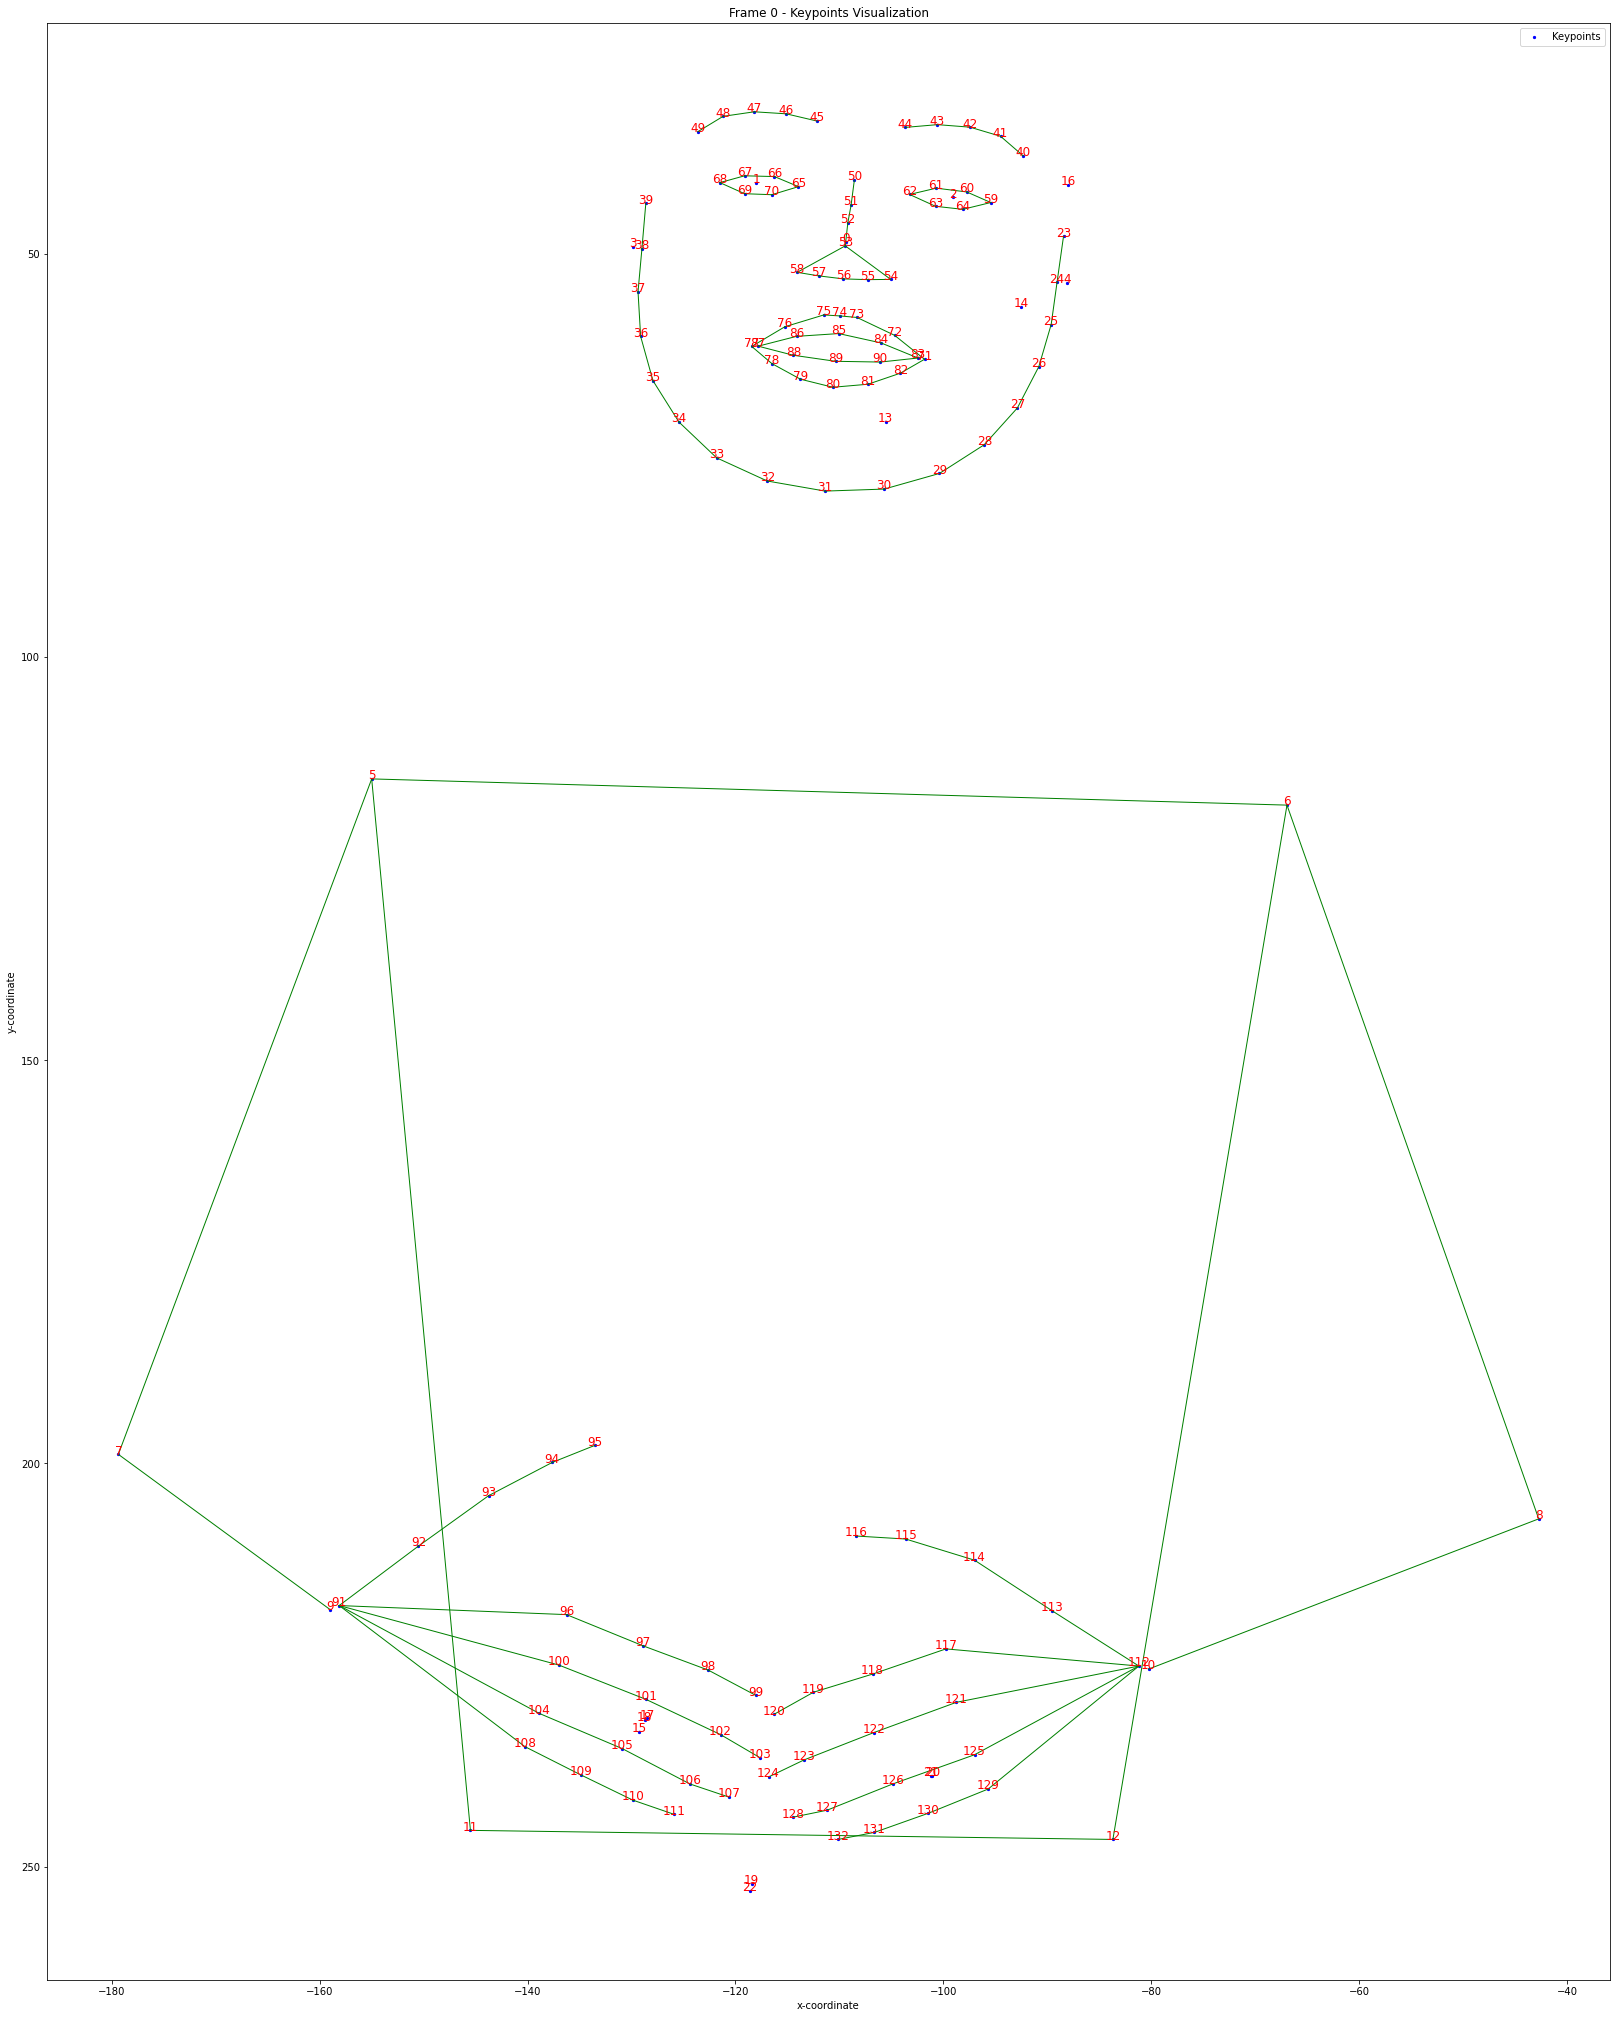

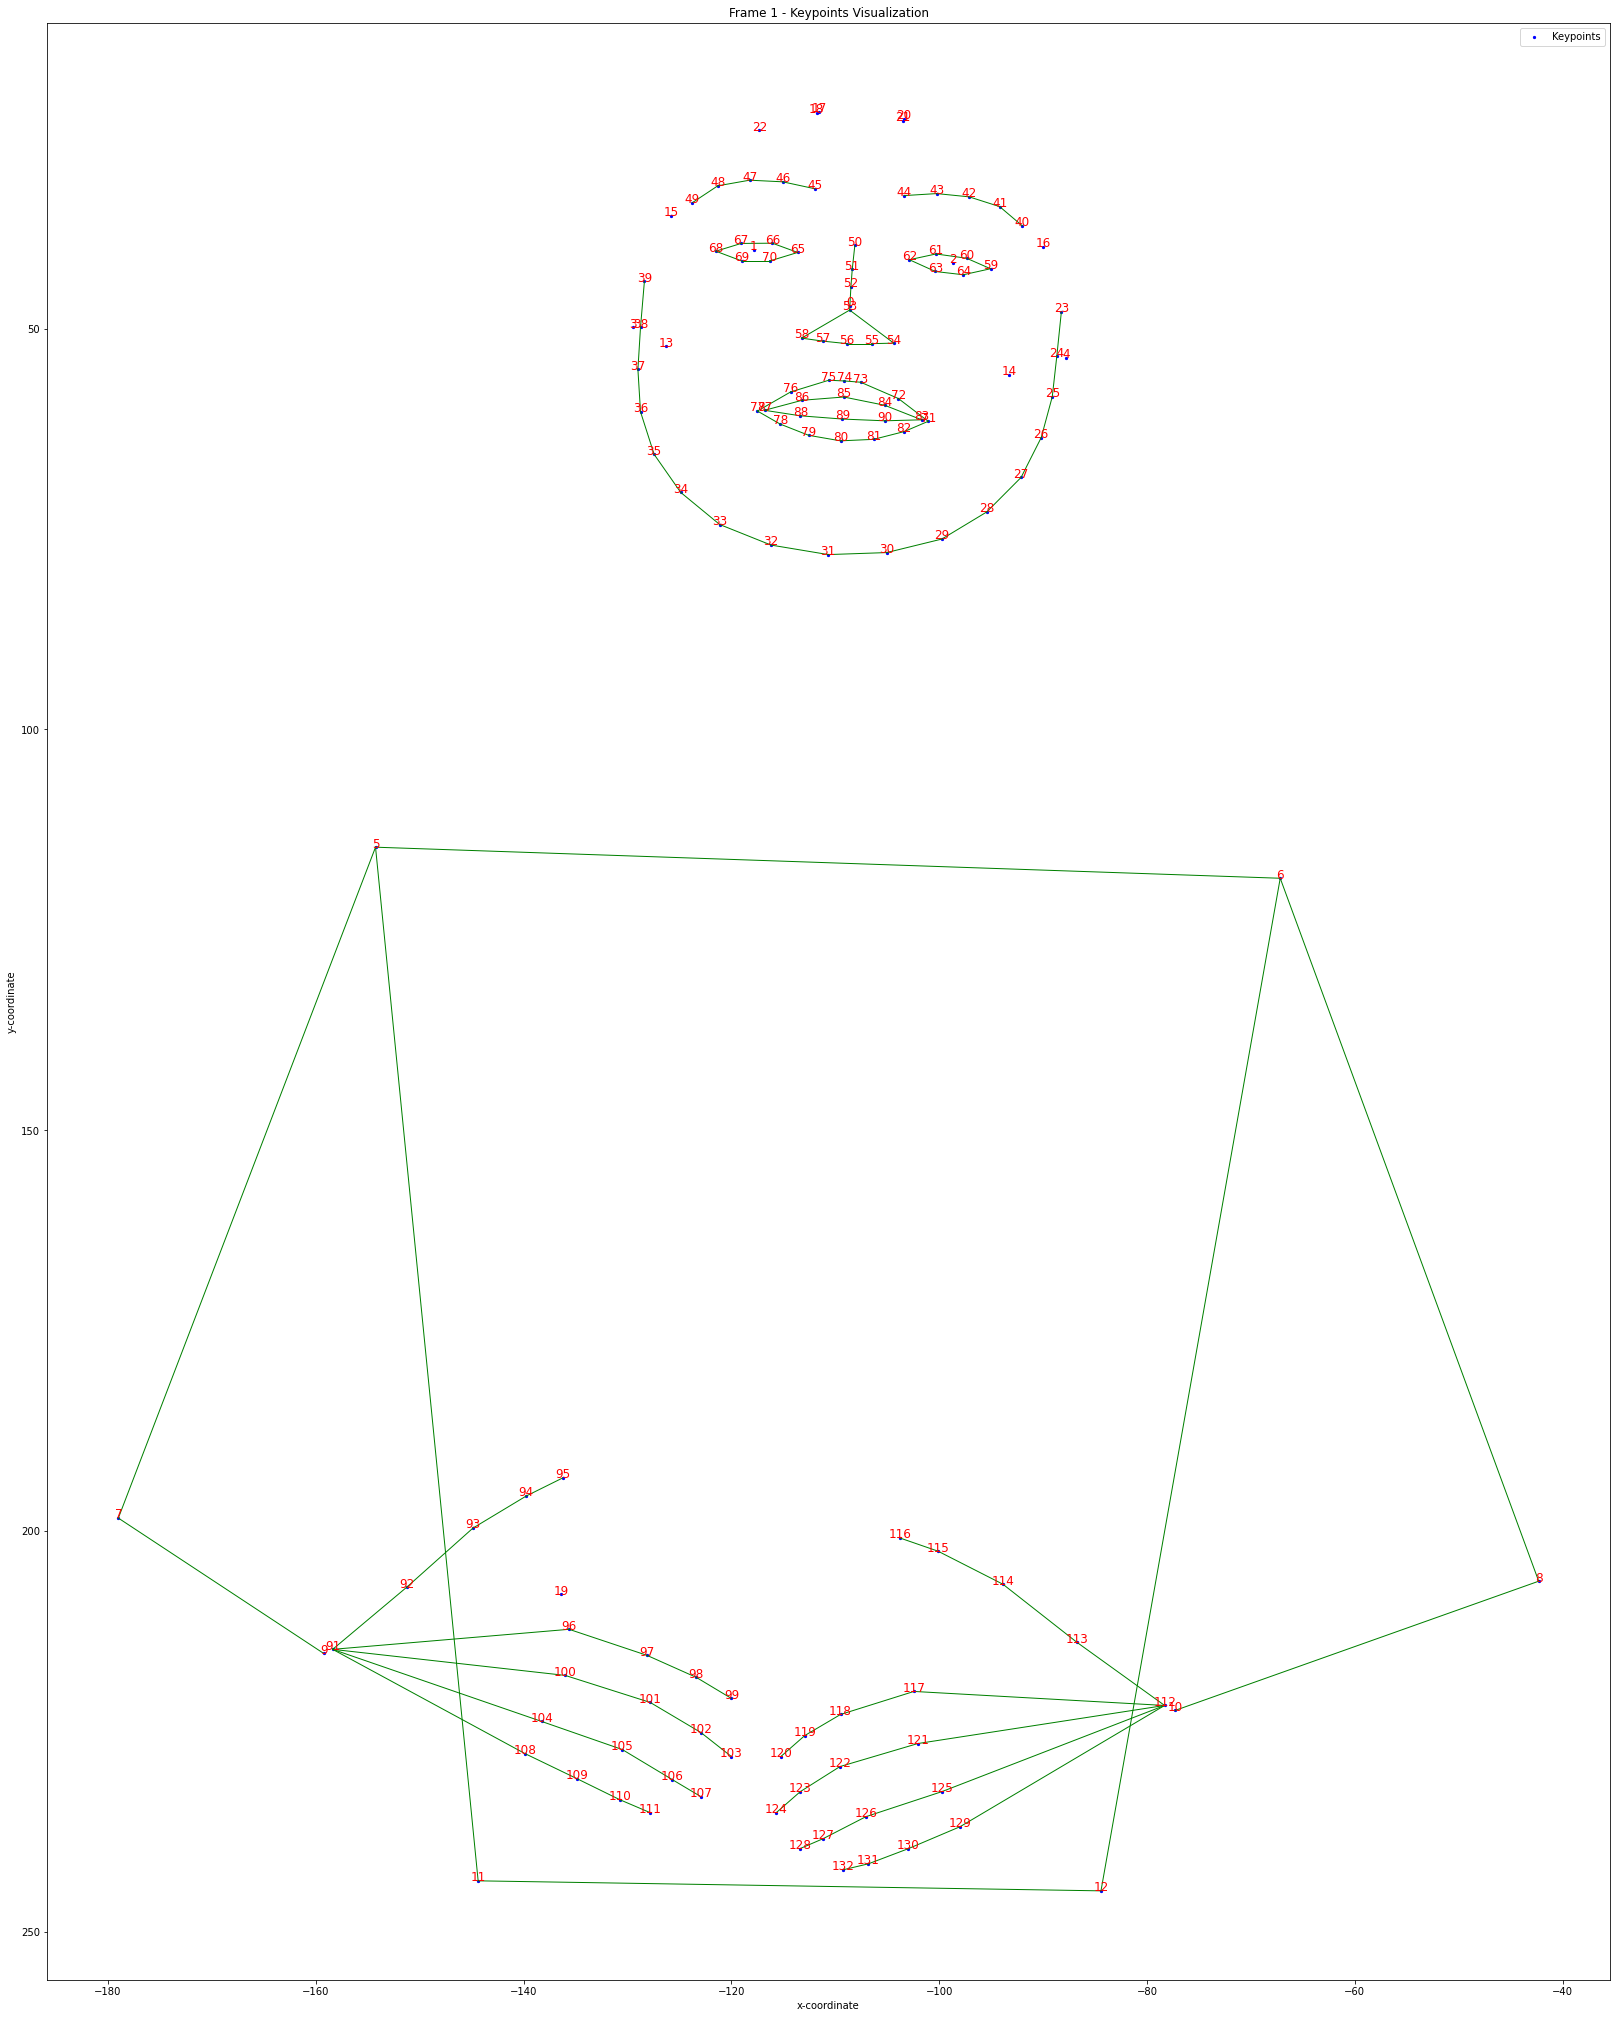

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# Updated Skeleton Structure
SKELETON = [
    # Body connections
    (5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12),
    # Left eyes
    (59,60), (60, 61), (61, 62), (62,63), (63, 64), (64, 59),
    # Eye brows
    (45, 46), (46, 47), (47, 48), (48, 49),
    # Right eyes
    (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 65),
    # Eye brows
    (40,41), (41,42), (42,43), (43,44),
    # Mouth
    (71,72), (72,73),(73,74), (74,75), (75,76), (76,77), (77,78), (78,79), (79,80), (80,81), (81,82), (82,71),
    # Mouth inner
    (83,84), (84,85), (85,86), (86,87), (87,88), (88,89), (89,90), (90, 83),
    # Nose
    (50, 51), (51,52), (52,53), (53, 54), (54,55), (55,56), (56,57), (57,58), (58,53),
    # Face 
    (23,24), (24,25), (25,26), (26,27), (27,28), (28,29), (29,30), (30,31), (31,32), (32,33), (33,34), (34,35), (35,36), (36,37), (37,38), (38,39), 
    # Right Hand Connections
    (91, 92), (92, 93), (93, 94), (94, 95), (91, 96), (96, 97), (97, 98), (98, 99),
    (91, 100), (100, 101), (101, 102), (102, 103), (91, 104), (104, 105), (105, 106), (106, 107),
    (91, 108), (108, 109), (109, 110), (110, 111),
    # Left Hand Connections
    (112, 113), (113, 114), (114, 115), (115, 116), (112, 117), (117, 118), (118, 119), (119, 120),
    (112, 121), (121, 122), (122, 123), (123, 124), (112, 125), (125, 126), (126, 127), (127, 128),
    (112, 129), (129, 130), (130, 131), (131, 132)
]

def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]
    return rotated_keypoints

def draw_facial_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))

    # Plot rotated keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')

    # Add numbers for each keypoint
    for i, (x, y, _) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')

    # Add bonds based on the skeleton structure
    for joint_start, joint_end in SKELETON:
        x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
        x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
        plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)

    plt.title(f"Frame {frame_index} - Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.gca().invert_yaxis()

    plt.show()

# In the main loop:
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            draw_facial_keypoints(rotated_keypoints, frame_index)
        break

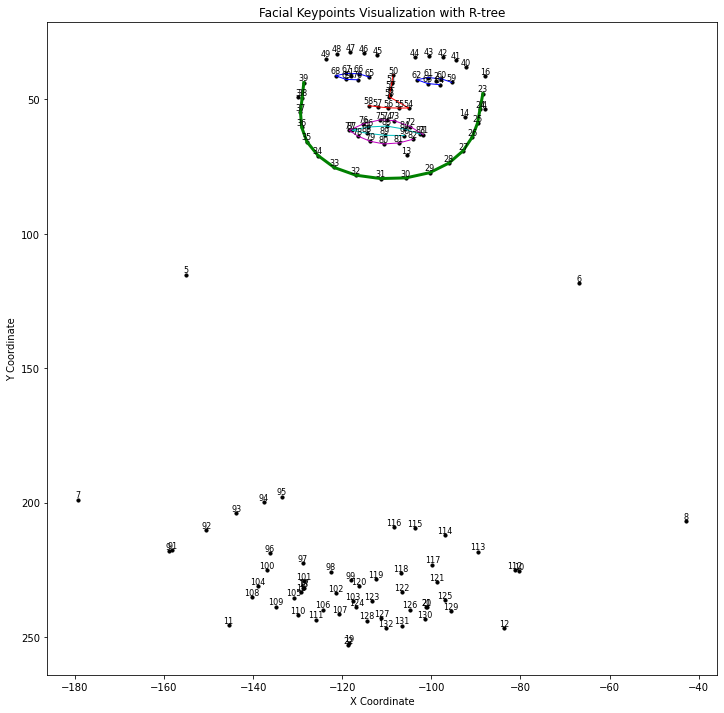

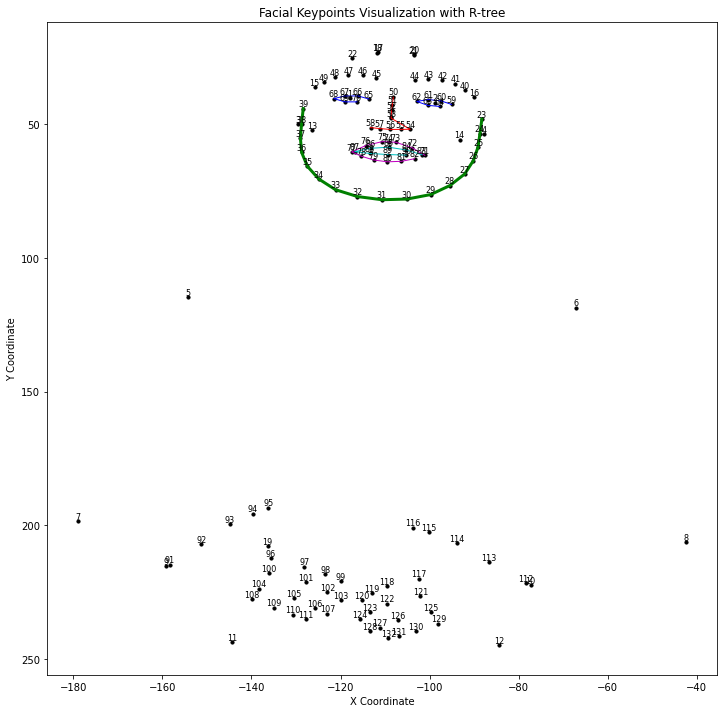

In [23]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, c) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=(i, c))
    return idx

def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]
    return rotated_keypoints

def draw_facial_keypoints(rotated_keypoints):
    plt.figure(figsize=(12, 12))
    
    r_tree = create_r_tree(rotated_keypoints)
    
    # Define facial regions
    face_outline = list(range(23, 40))
    left_eye = list(range(59, 65))
    right_eye = list(range(65, 71))
    nose = list(range(50, 59))
    mouth_outer = list(range(71, 83))
    mouth_inner = list(range(83, 91))
    
    # Draw face outline with bold line
    plt.plot(rotated_keypoints[face_outline, 0], -rotated_keypoints[face_outline, 1], 'g-', linewidth=3)
    
    # Draw eyes separately without connecting them
    plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], 'b-', linewidth=1)
    plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], 'b-', linewidth=1)
    
    # Draw nose and mouth with normal line width
    plt.plot(rotated_keypoints[nose, 0], -rotated_keypoints[nose, 1], 'r-', linewidth=1)
    plt.plot(rotated_keypoints[mouth_outer, 0], -rotated_keypoints[mouth_outer, 1], 'm-', linewidth=1)
    plt.plot(rotated_keypoints[mouth_inner, 0], -rotated_keypoints[mouth_inner, 1], 'c-', linewidth=1)
    
    # Plot all keypoints and add point numbers
    for i, (x, y, _) in enumerate(rotated_keypoints):
        plt.scatter(x, -y, color='black', s=10)
        plt.text(x, -y, str(i), fontsize=8, ha='center', va='bottom')
    
    plt.title("Facial Keypoints Visualization with R-tree")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()
    plt.show()
# In the main loop:
for frame_keypoints in keypoints[:2]:
    rotated_kpts = rotate_keypoints_180(frame_keypoints)
    draw_facial_keypoints(rotated_kpts)

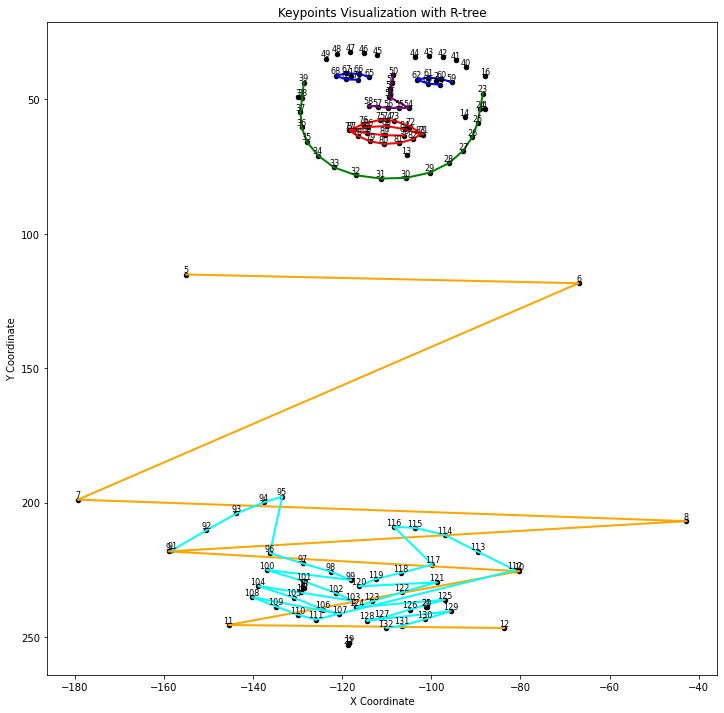

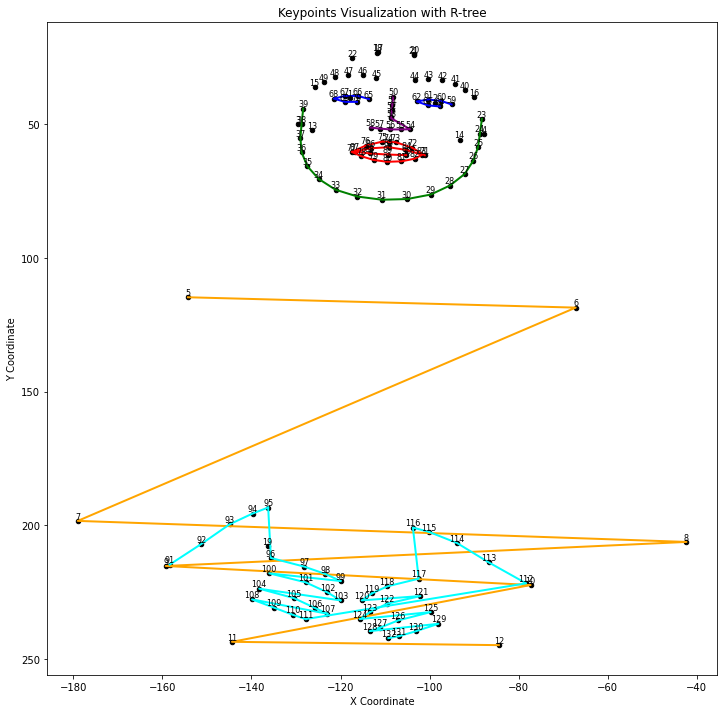

In [24]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, c) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=(i, c))
    return idx

def draw_keypoints(rotated_keypoints):
    plt.figure(figsize=(12, 12))
    
    r_tree = create_r_tree(rotated_keypoints)
    
    # Define body parts
    face = list(range(23, 40))
    left_eye = list(range(59, 65))
    right_eye = list(range(65, 71))
    nose = list(range(50, 59))
    mouth = list(range(71, 91))
    body = [5, 6, 7, 8, 9, 10, 11, 12]
    hands = list(range(91, 133))
    
    # Color mapping for different body parts
    color_map = {
        'face': 'green',
        'eyes': 'blue',
        'nose': 'purple',
        'mouth': 'red',
        'body': 'orange',
        'hands': 'cyan'
    }
    
    # Draw connections for each body part
    for part, color in color_map.items():
        if part == 'eyes':
            plt.plot(rotated_keypoints[left_eye, 0], -rotated_keypoints[left_eye, 1], color=color, linewidth=2)
            plt.plot(rotated_keypoints[right_eye, 0], -rotated_keypoints[right_eye, 1], color=color, linewidth=2)
        elif part == 'hands':
            for i in range(91, 132, 4):  # Connect each finger
                plt.plot(rotated_keypoints[i:i+5, 0], -rotated_keypoints[i:i+5, 1], color=color, linewidth=2)
        else:
            points = locals()[part]
            plt.plot(rotated_keypoints[points, 0], -rotated_keypoints[points, 1], color=color, linewidth=2)
    
    # Plot all keypoints
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.scatter(x, -y, color='black', s=20)
        plt.text(x, -y, str(i), fontsize=8, ha='center', va='bottom')
    
    plt.title("Keypoints Visualization with R-tree")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()
    plt.show()

# In the main loop:
for frame_keypoints in keypoints[:2]:
    rotated_kpts = rotate_keypoints_180(frame_keypoints)
    draw_keypoints(rotated_kpts)

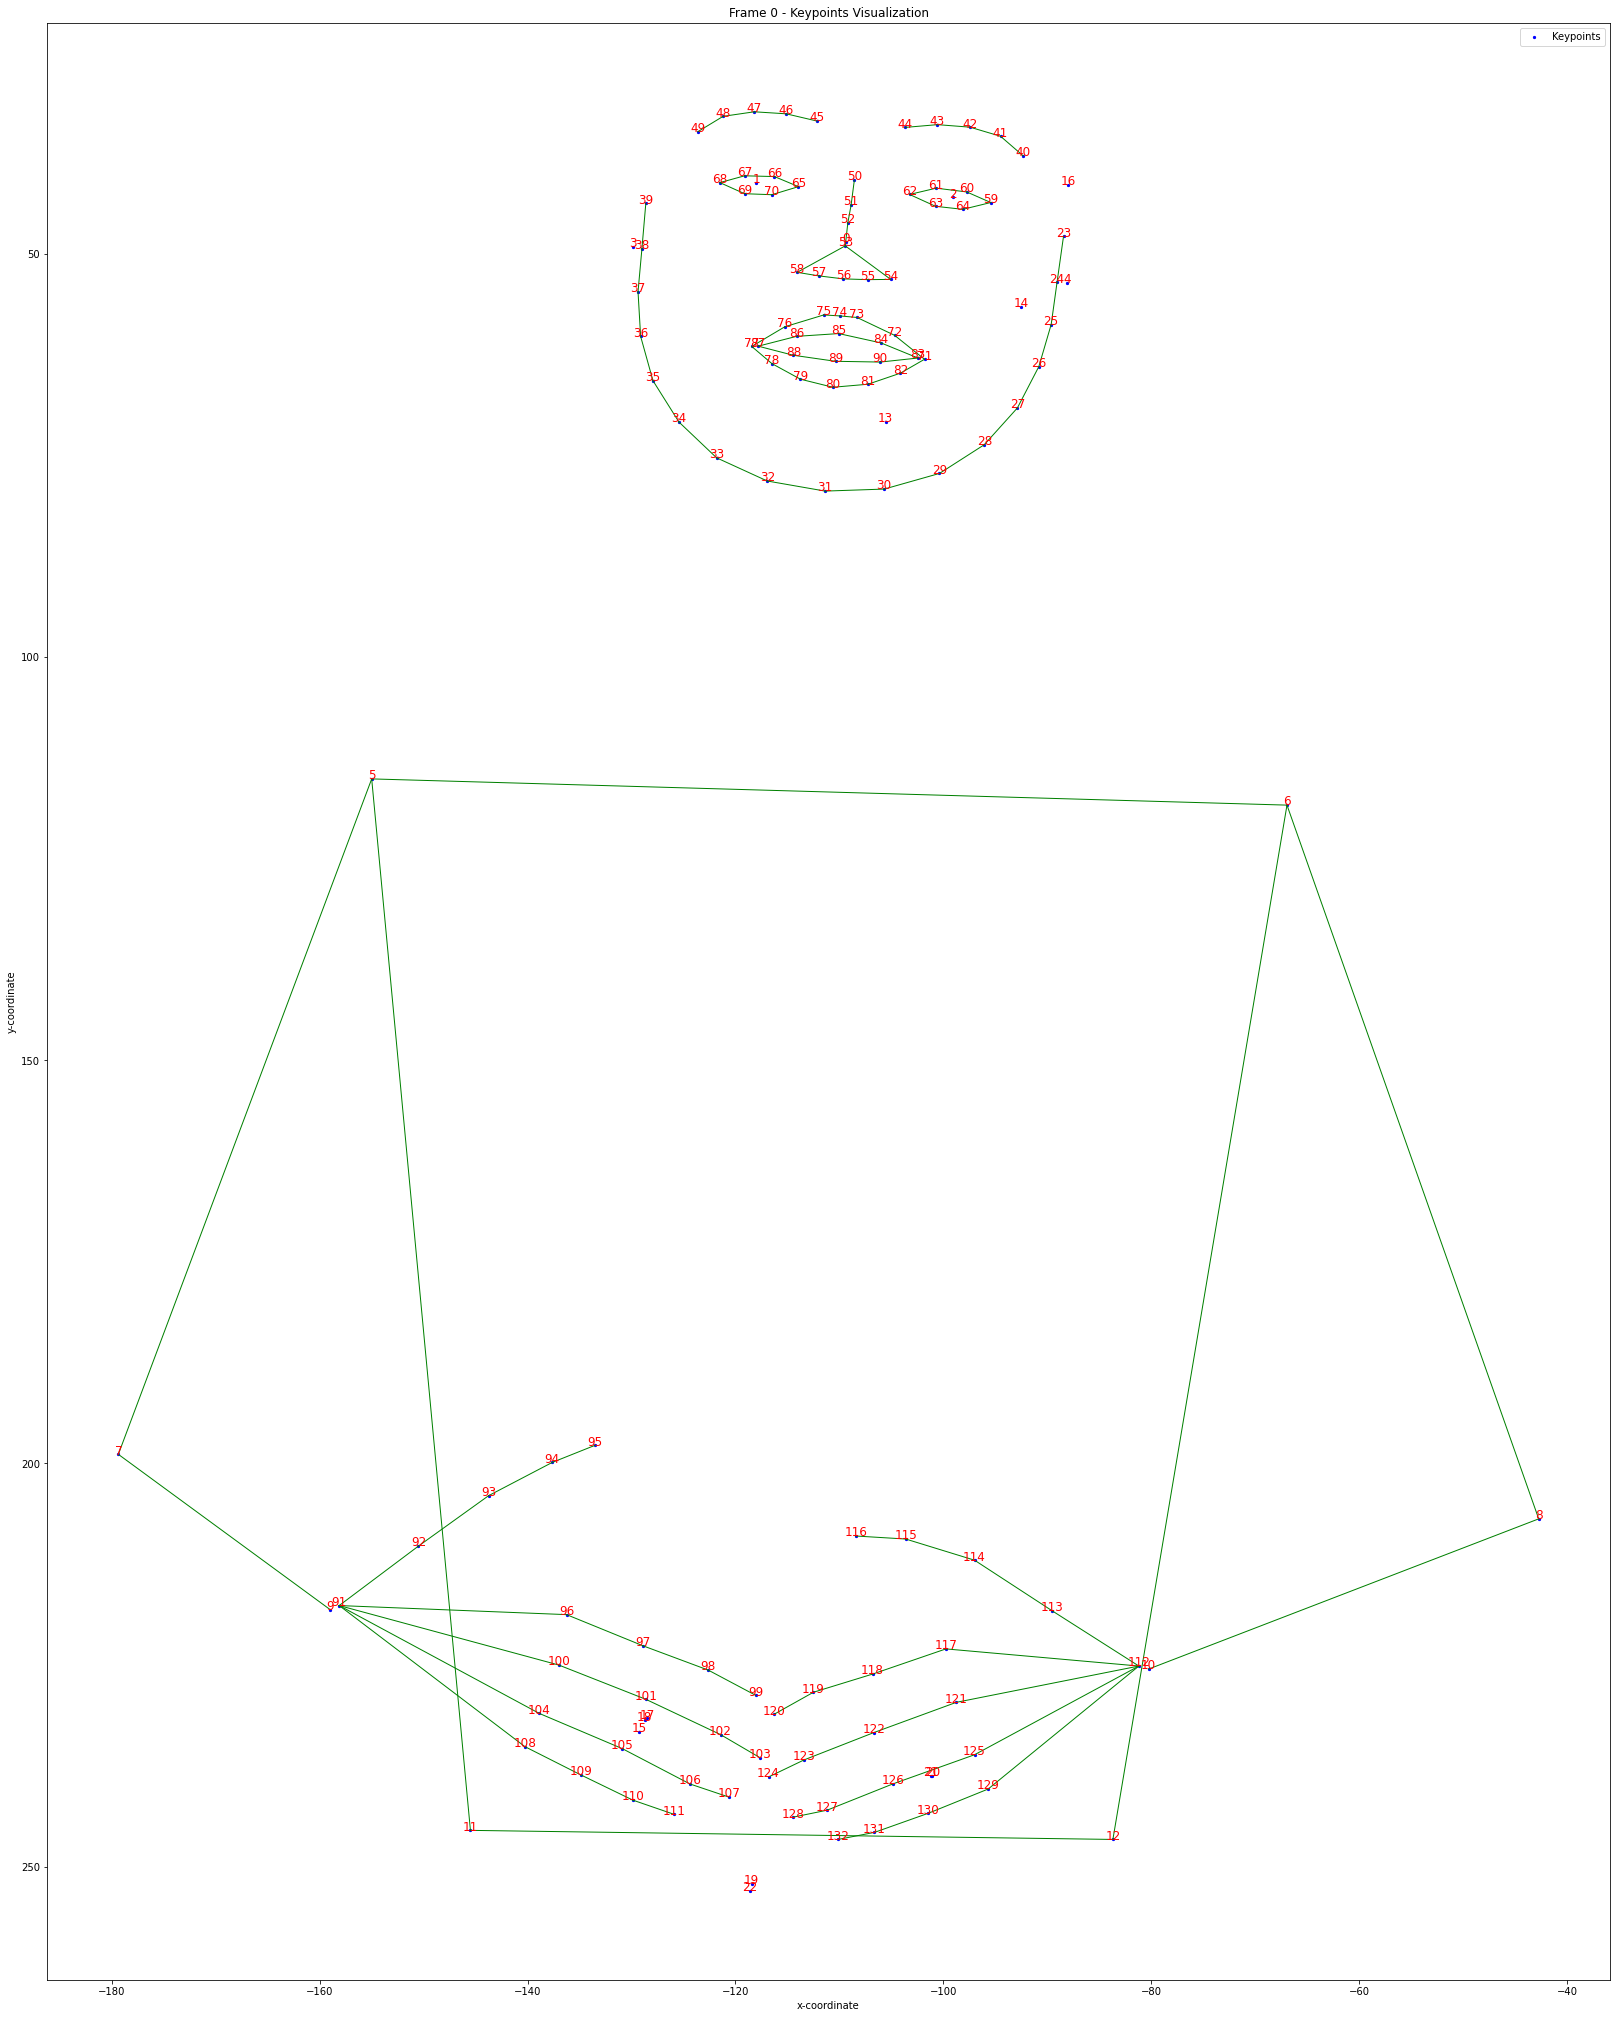

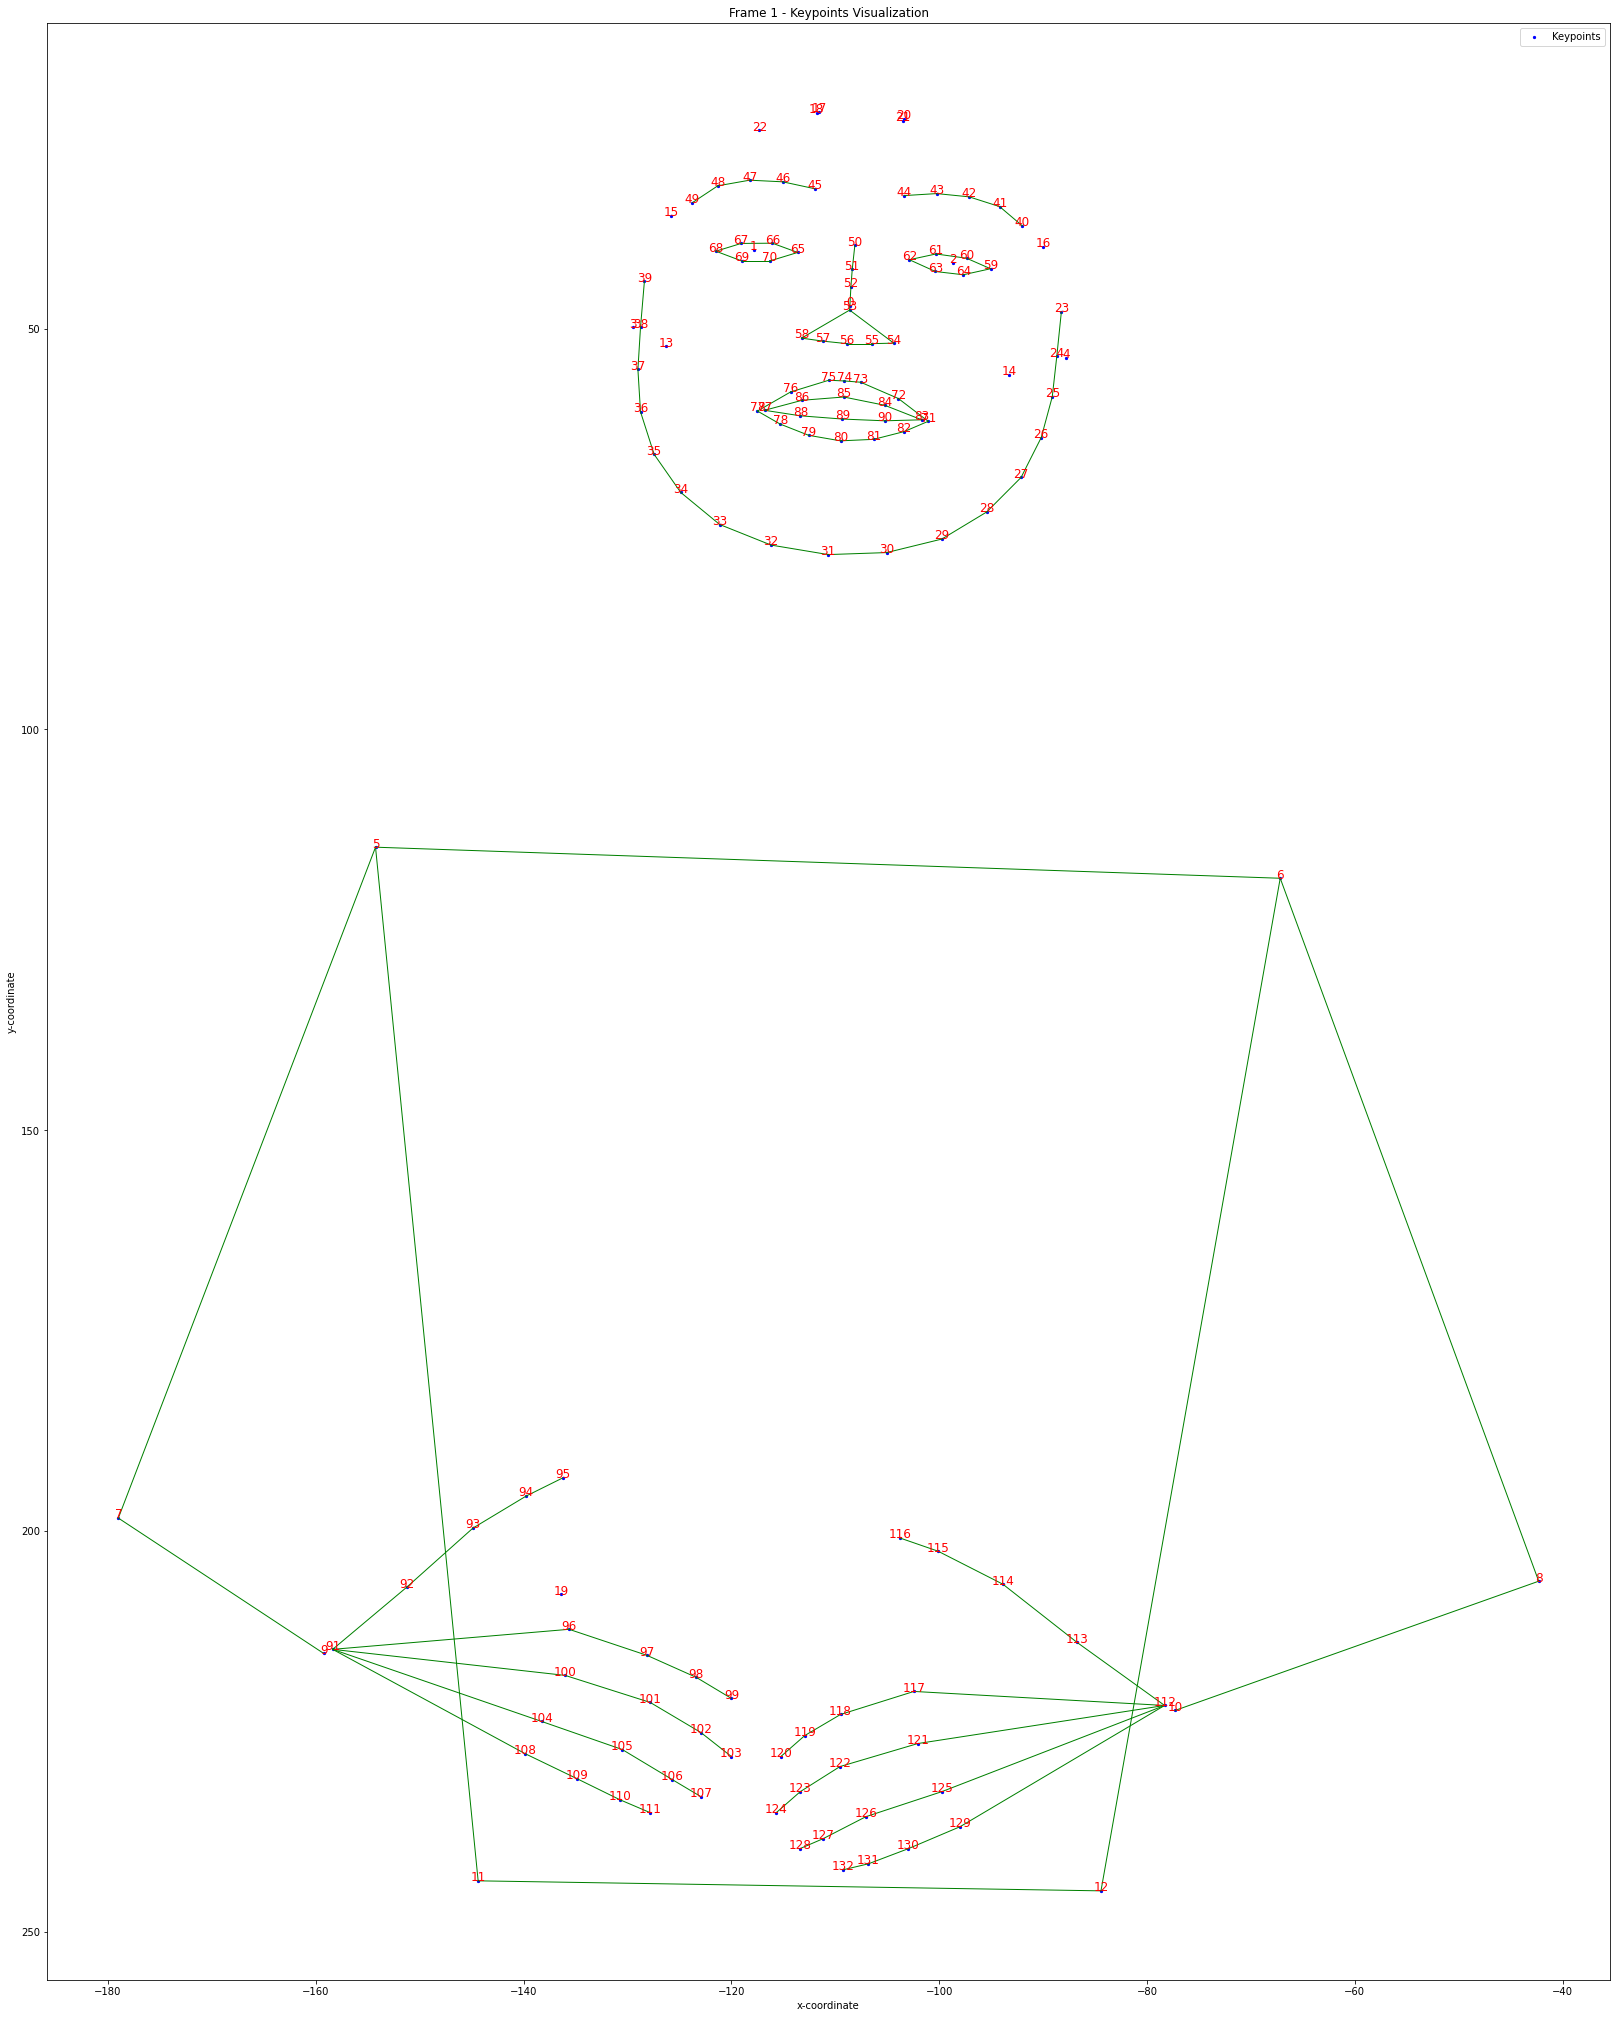

In [25]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt

# Updated Skeleton Structure
SKELETON = [
    # Body connections
    (5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12),
    # Left eyes
    (59,60), (60, 61), (61, 62), (62,63), (63, 64), (64, 59),
    # Eye brows
    (45, 46), (46, 47), (47, 48), (48, 49),
    # Right eyes
    (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 65),
    # Eye brows
    (40,41), (41,42), (42,43), (43,44),
    # Mouth
    (71,72), (72,73),(73,74), (74,75), (75,76), (76,77), (77,78), (78,79), (79,80), (80,81), (81,82), (82,71),
    # Mouth inner
    (83,84), (84,85), (85,86), (86,87), (87,88), (88,89), (89,90), (90, 83),
    # Nose
    (50, 51), (51,52), (52,53), (53, 54), (54,55), (55,56), (56,57), (57,58), (58,53),
    # Face 
    (23,24), (24,25), (25,26), (26,27), (27,28), (28,29), (29,30), (30,31), (31,32), (32,33), (33,34), (34,35), (35,36), (36,37), (37,38), (38,39), 
    # Right Hand Connections
    (91, 92), (92, 93), (93, 94), (94, 95), (91, 96), (96, 97), (97, 98), (98, 99),
    (91, 100), (100, 101), (101, 102), (102, 103), (91, 104), (104, 105), (105, 106), (106, 107),
    (91, 108), (108, 109), (109, 110), (110, 111),
    # Left Hand Connections
    (112, 113), (113, 114), (114, 115), (115, 116), (112, 117), (117, 118), (118, 119), (119, 120),
    (112, 121), (121, 122), (122, 123), (123, 124), (112, 125), (125, 126), (126, 127), (127, 128),
    (112, 129), (129, 130), (130, 131), (131, 132)
]

def create_r_tree(keypoints, margin=5):
    idx = index.Index()
    for i, (x, y, c) in enumerate(keypoints):
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=(i, c))
    return idx

def rotate_keypoints_180(keypoints):
    rotated_keypoints = np.copy(keypoints)
    rotated_keypoints[:, 0] = -rotated_keypoints[:, 0]
    rotated_keypoints[:, 1] = -rotated_keypoints[:, 1]
    return rotated_keypoints

def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))
    
    r_tree = create_r_tree(rotated_keypoints)
    
    # Plot rotated keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='blue', s=5, label='Keypoints')
    
    # Add numbers for each keypoint
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')
    
    # Add bonds based on the skeleton structure
    for joint_start, joint_end in SKELETON:
        x_start, y_start = rotated_keypoints[joint_start, 0], -rotated_keypoints[joint_start, 1]
        x_end, y_end = rotated_keypoints[joint_end, 0], -rotated_keypoints[joint_end, 1]
        plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=1)
    
    plt.title(f"Frame {frame_index} - Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

# Main loop
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

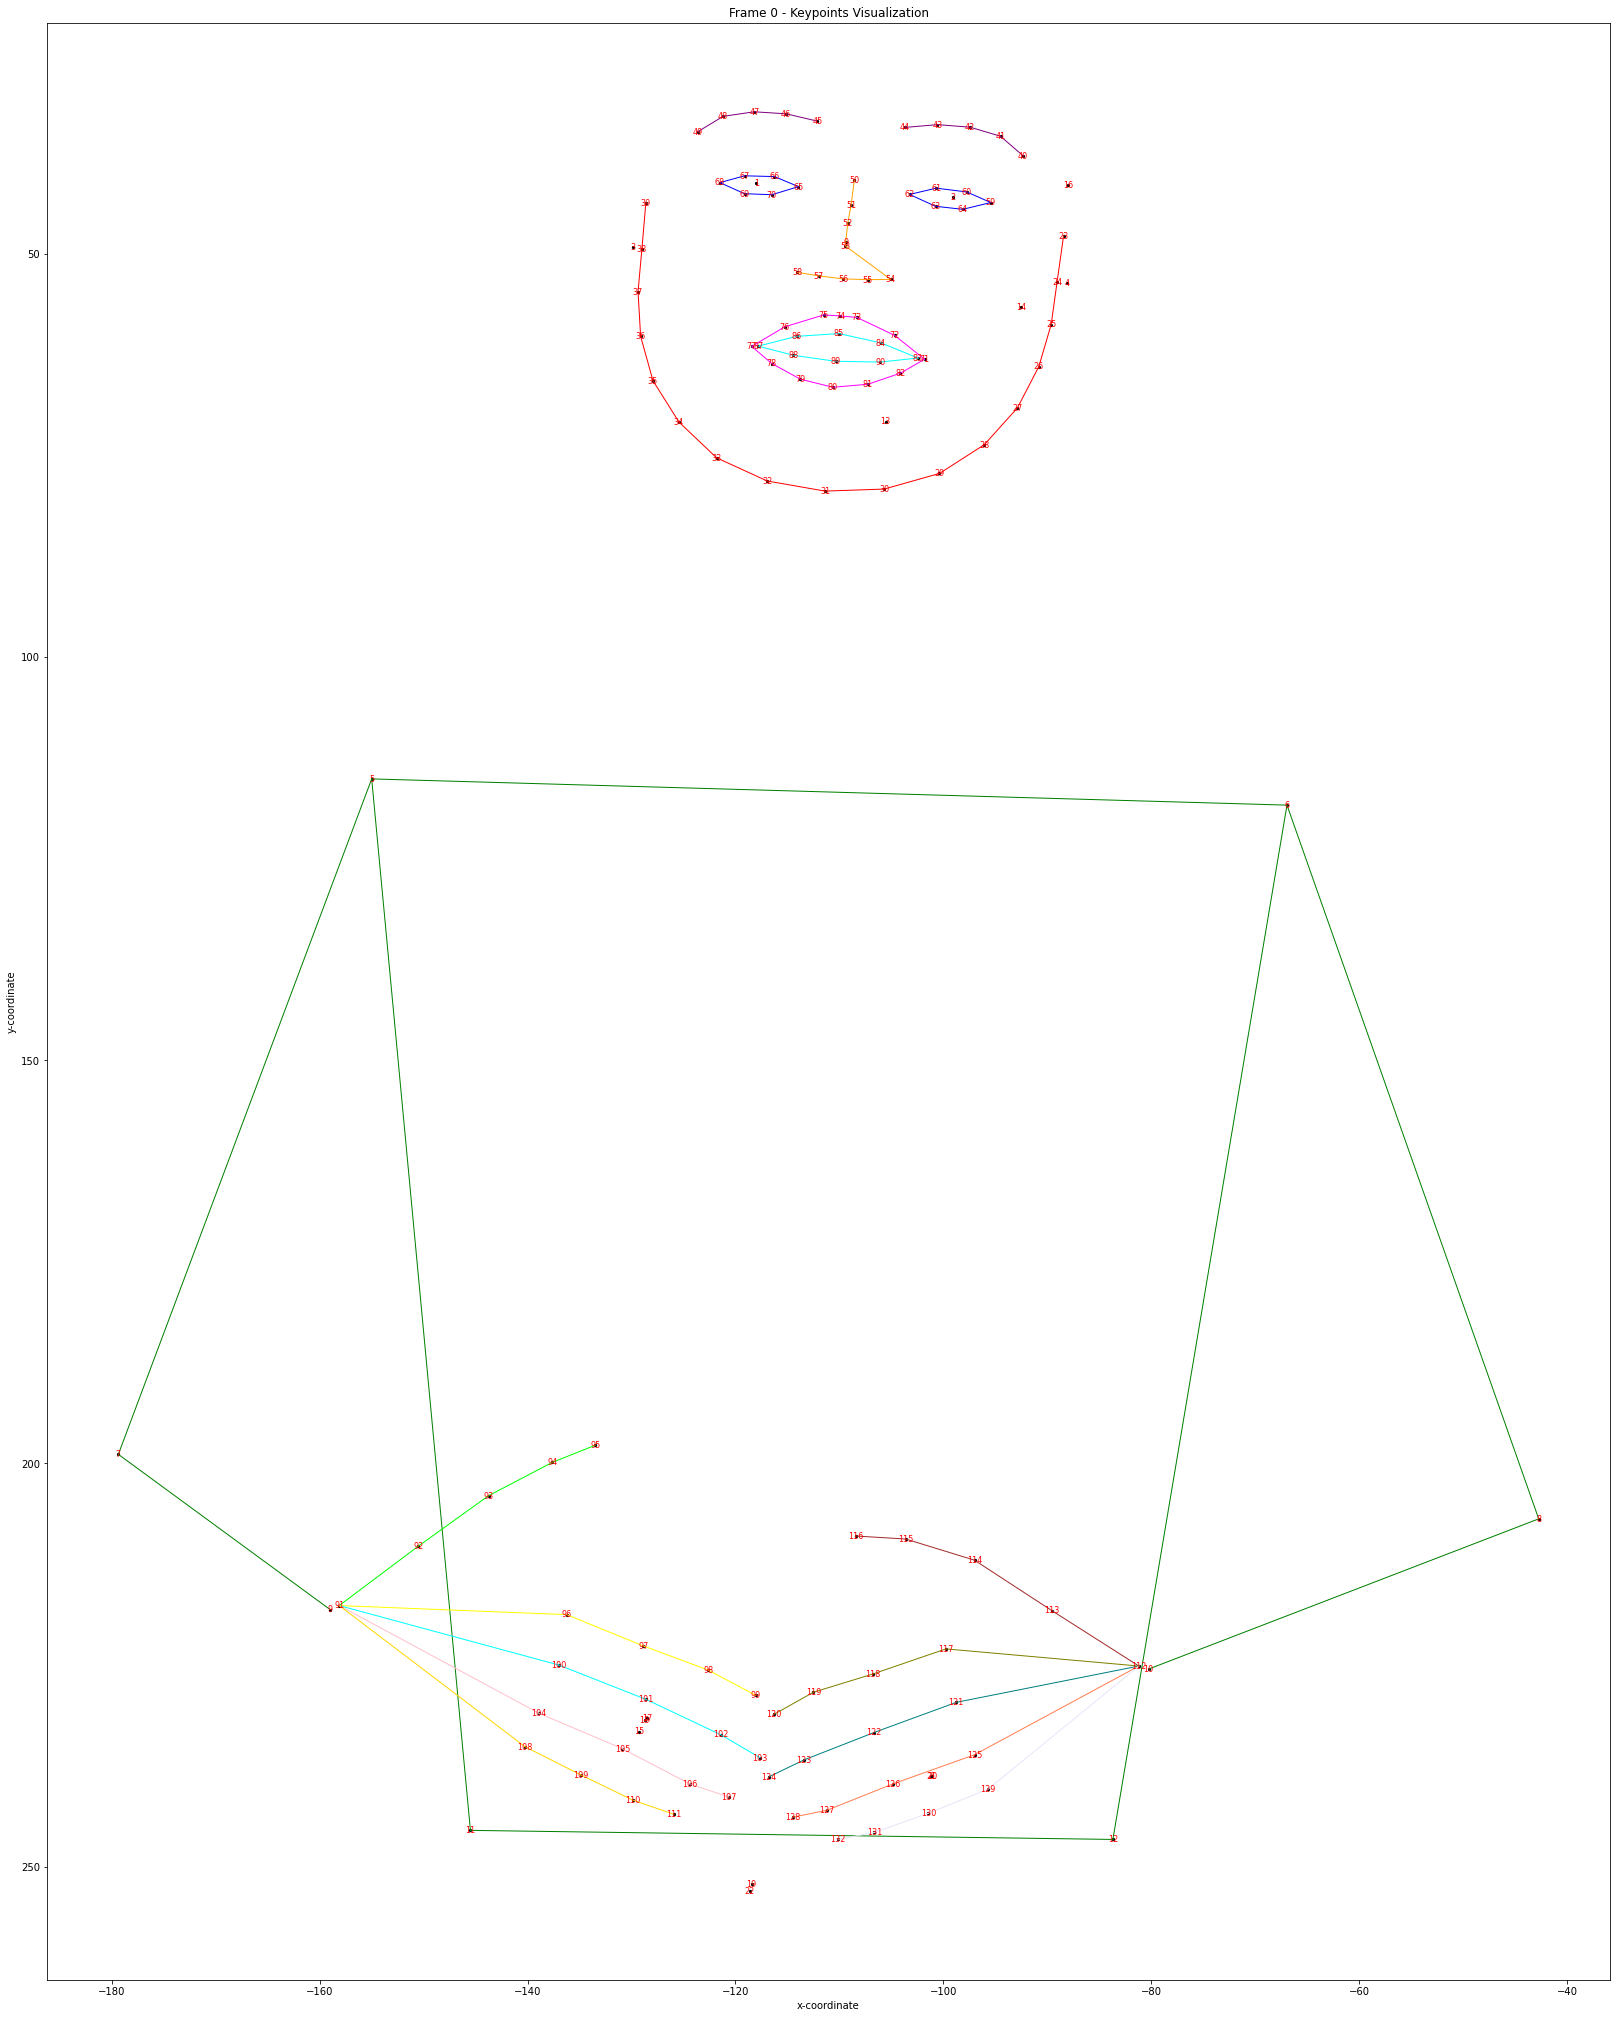

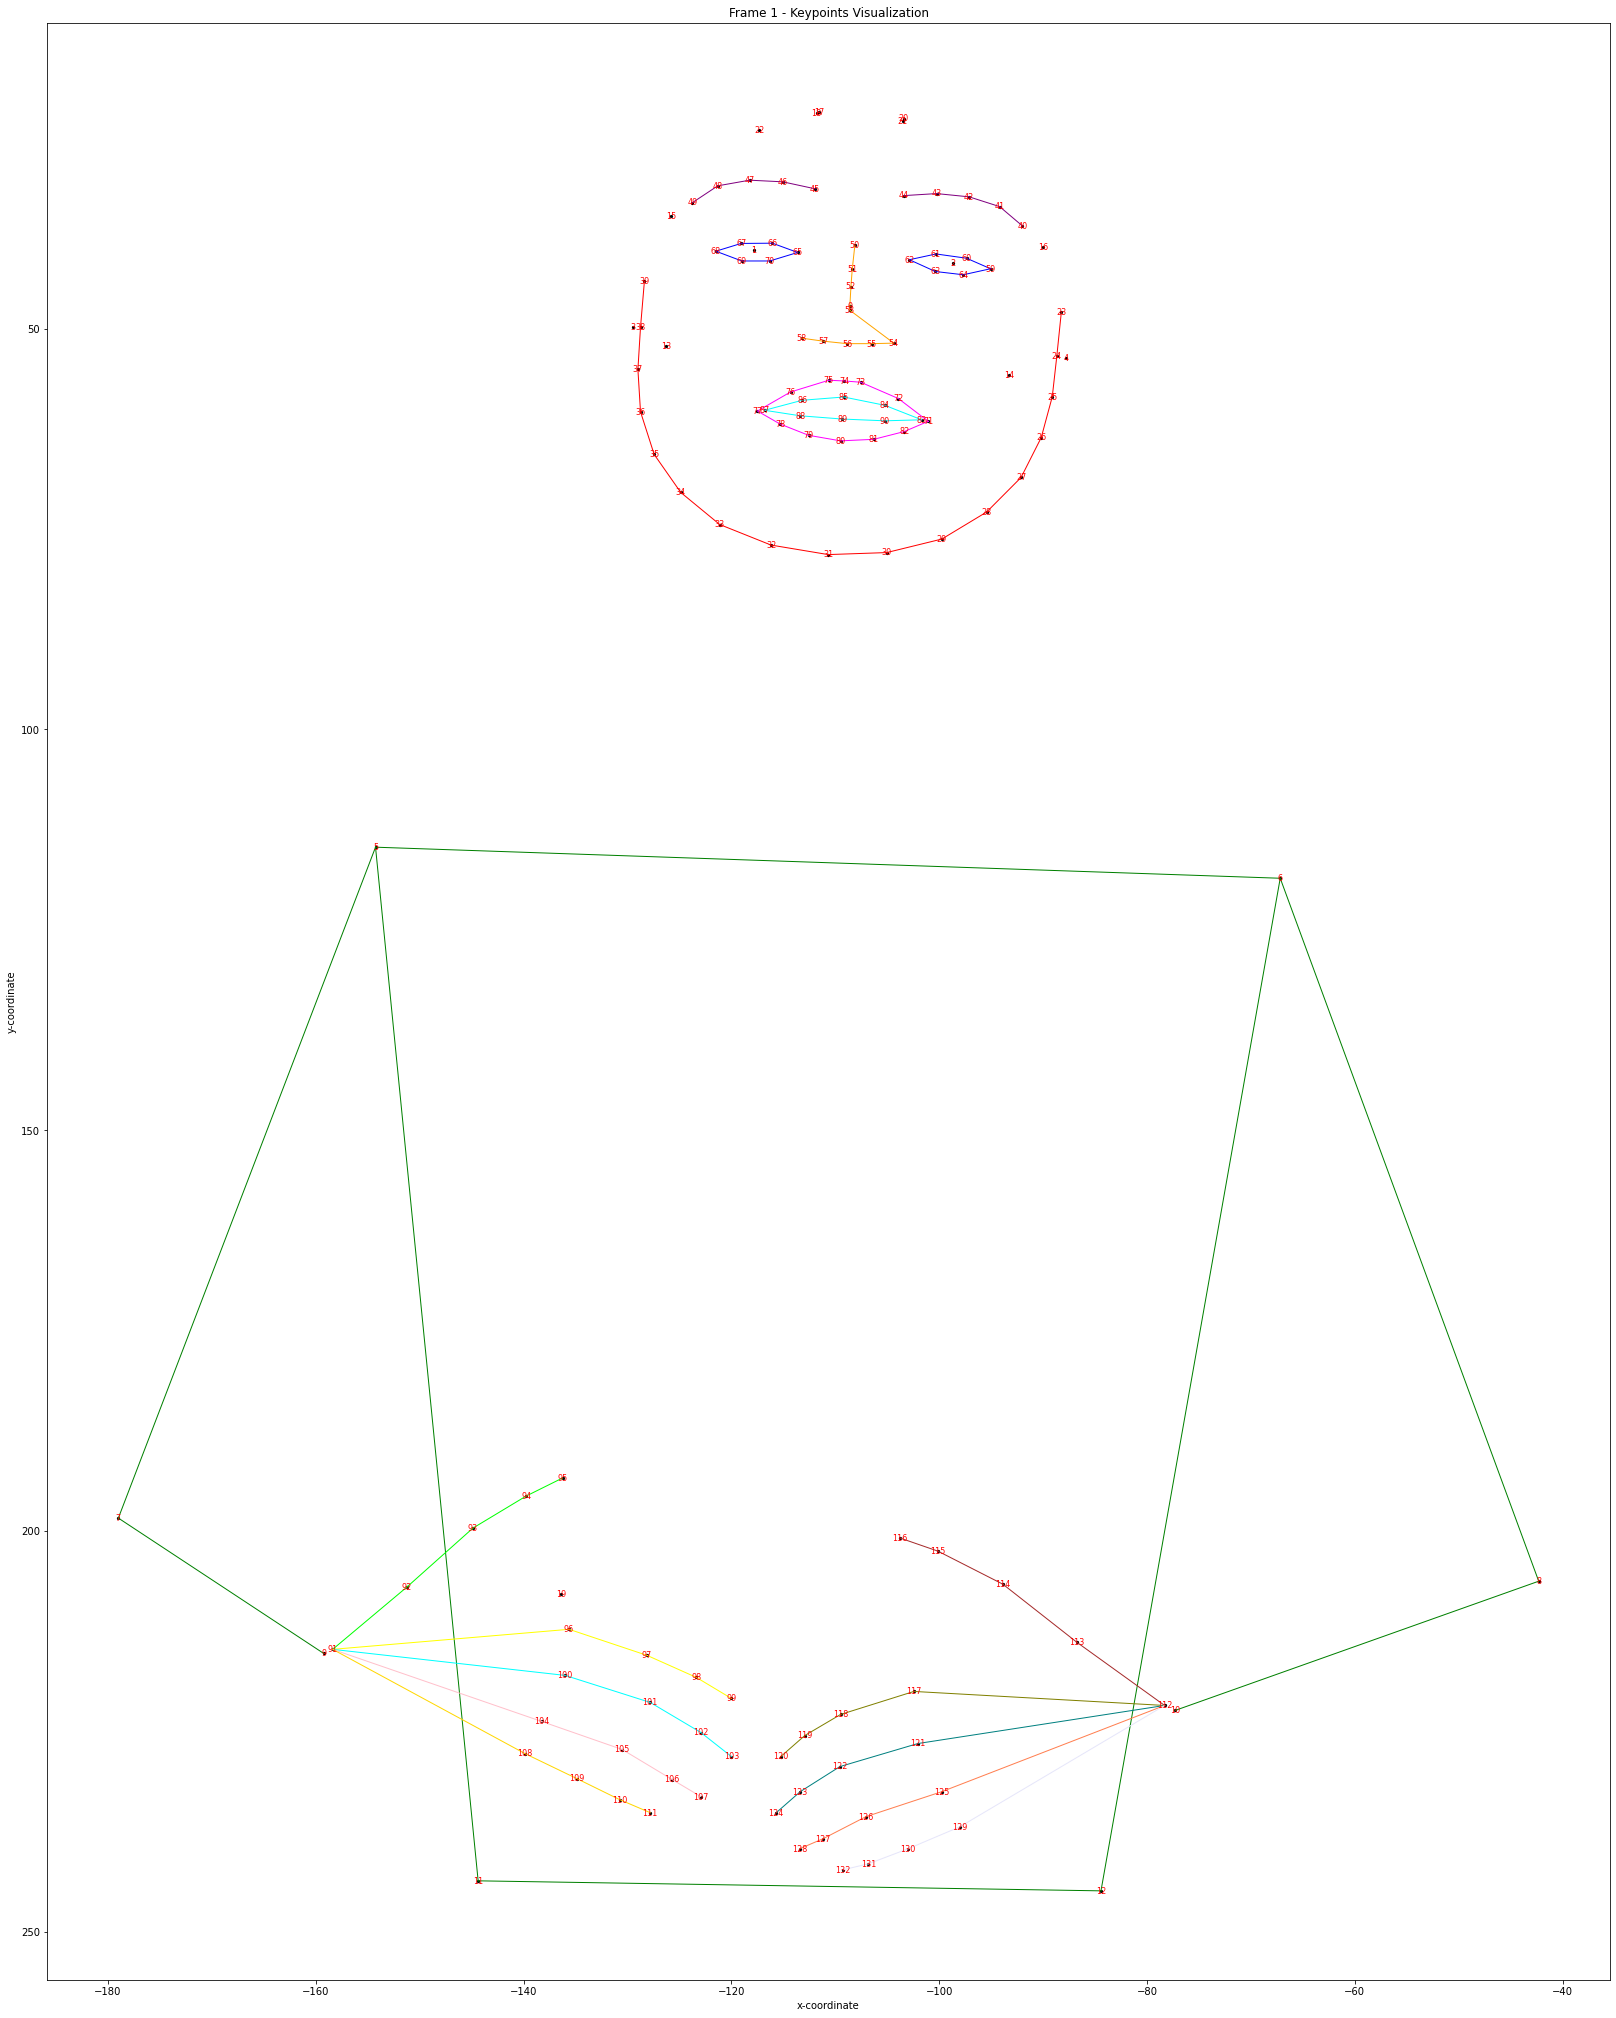

In [33]:
def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))
    
    # Define color mapping for different body parts
    color_map = {
        'body': 'green',
        'face': 'red',
        'left_eyes': 'blue',
        'right_eyes': 'blue',
        'left_eyebrows': 'purple',
        'right_eyebrows': 'purple',
        'nose': 'orange',
        'mouth_outer': 'magenta',
        'mouth_inner': 'cyan',
        'right_thumb': 'lime',
        'right_index': 'yellow',
        'right_middle': 'cyan',
        'right_ring': 'pink',
        'right_pinky': 'gold',
        'left_thumb': 'brown',
        'left_index': 'olive',
        'left_middle': 'teal',
        'left_ring': 'coral',
        'left_pinky': 'lavender'
    }
    
    # Body parts
    body_parts = {
        'body': [(5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12)],
        'face': list(range(23, 40)),
        'left_eyes': list(range(59, 65)) + [59],
        'right_eyes': list(range(65, 71)) + [65],
        'left_eyebrows': [(45, 46), (46, 47), (47, 48), (48, 49)],
        'right_eyebrows': [(40, 41), (41, 42), (42, 43), (43, 44)],
        'nose': list(range(50, 59)),
        'mouth_outer': list(range(71, 83)) + [71],
        'mouth_inner': list(range(83, 91)) + [83],
        'right_thumb': [(91, 92), (92, 93), (93, 94), (94, 95)],
        'right_index': [(91, 96), (96, 97), (97, 98), (98, 99)],
        'right_middle': [(91, 100), (100, 101), (101, 102), (102, 103)],
        'right_ring': [(91, 104), (104, 105), (105, 106), (106, 107)],
        'right_pinky': [(91, 108), (108, 109), (109, 110), (110, 111)],
        'left_thumb': [(112, 113), (113, 114), (114, 115), (115, 116)],
        'left_index': [(112, 117), (117, 118), (118, 119), (119, 120)],
        'left_middle': [(112, 121), (121, 122), (122, 123), (123, 124)],
        'left_ring': [(112, 125), (125, 126), (126, 127), (127, 128)],
        'left_pinky': [(112, 129), (129, 130), (130, 131), (131, 132)]
    }
    
    # Plot keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=5, label='Keypoints')

    # Add numbers for each keypoint
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=8, color='red', ha='center', va='center')

    # Draw connections for each body part
    for part, connections in body_parts.items():
        if isinstance(connections, list) and len(connections) > 0:
            if isinstance(connections[0], int):
                # If list of indices
                plt.plot(rotated_keypoints[connections, 0], -rotated_keypoints[connections, 1], 
                         color=color_map.get(part, 'gray'), linewidth=1)
            else:
                # If list of connection tuples
                for start, end in connections:
                    x_start, y_start = rotated_keypoints[start, 0], -rotated_keypoints[start, 1]
                    x_end, y_end = rotated_keypoints[end, 0], -rotated_keypoints[end, 1]
                    plt.plot([x_start, x_end], [y_start, y_end], 
                             color=color_map.get(part, 'gray'), linewidth=1)

    plt.title(f"Frame {frame_index} - Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.show()

# Main loop remains unchanged
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

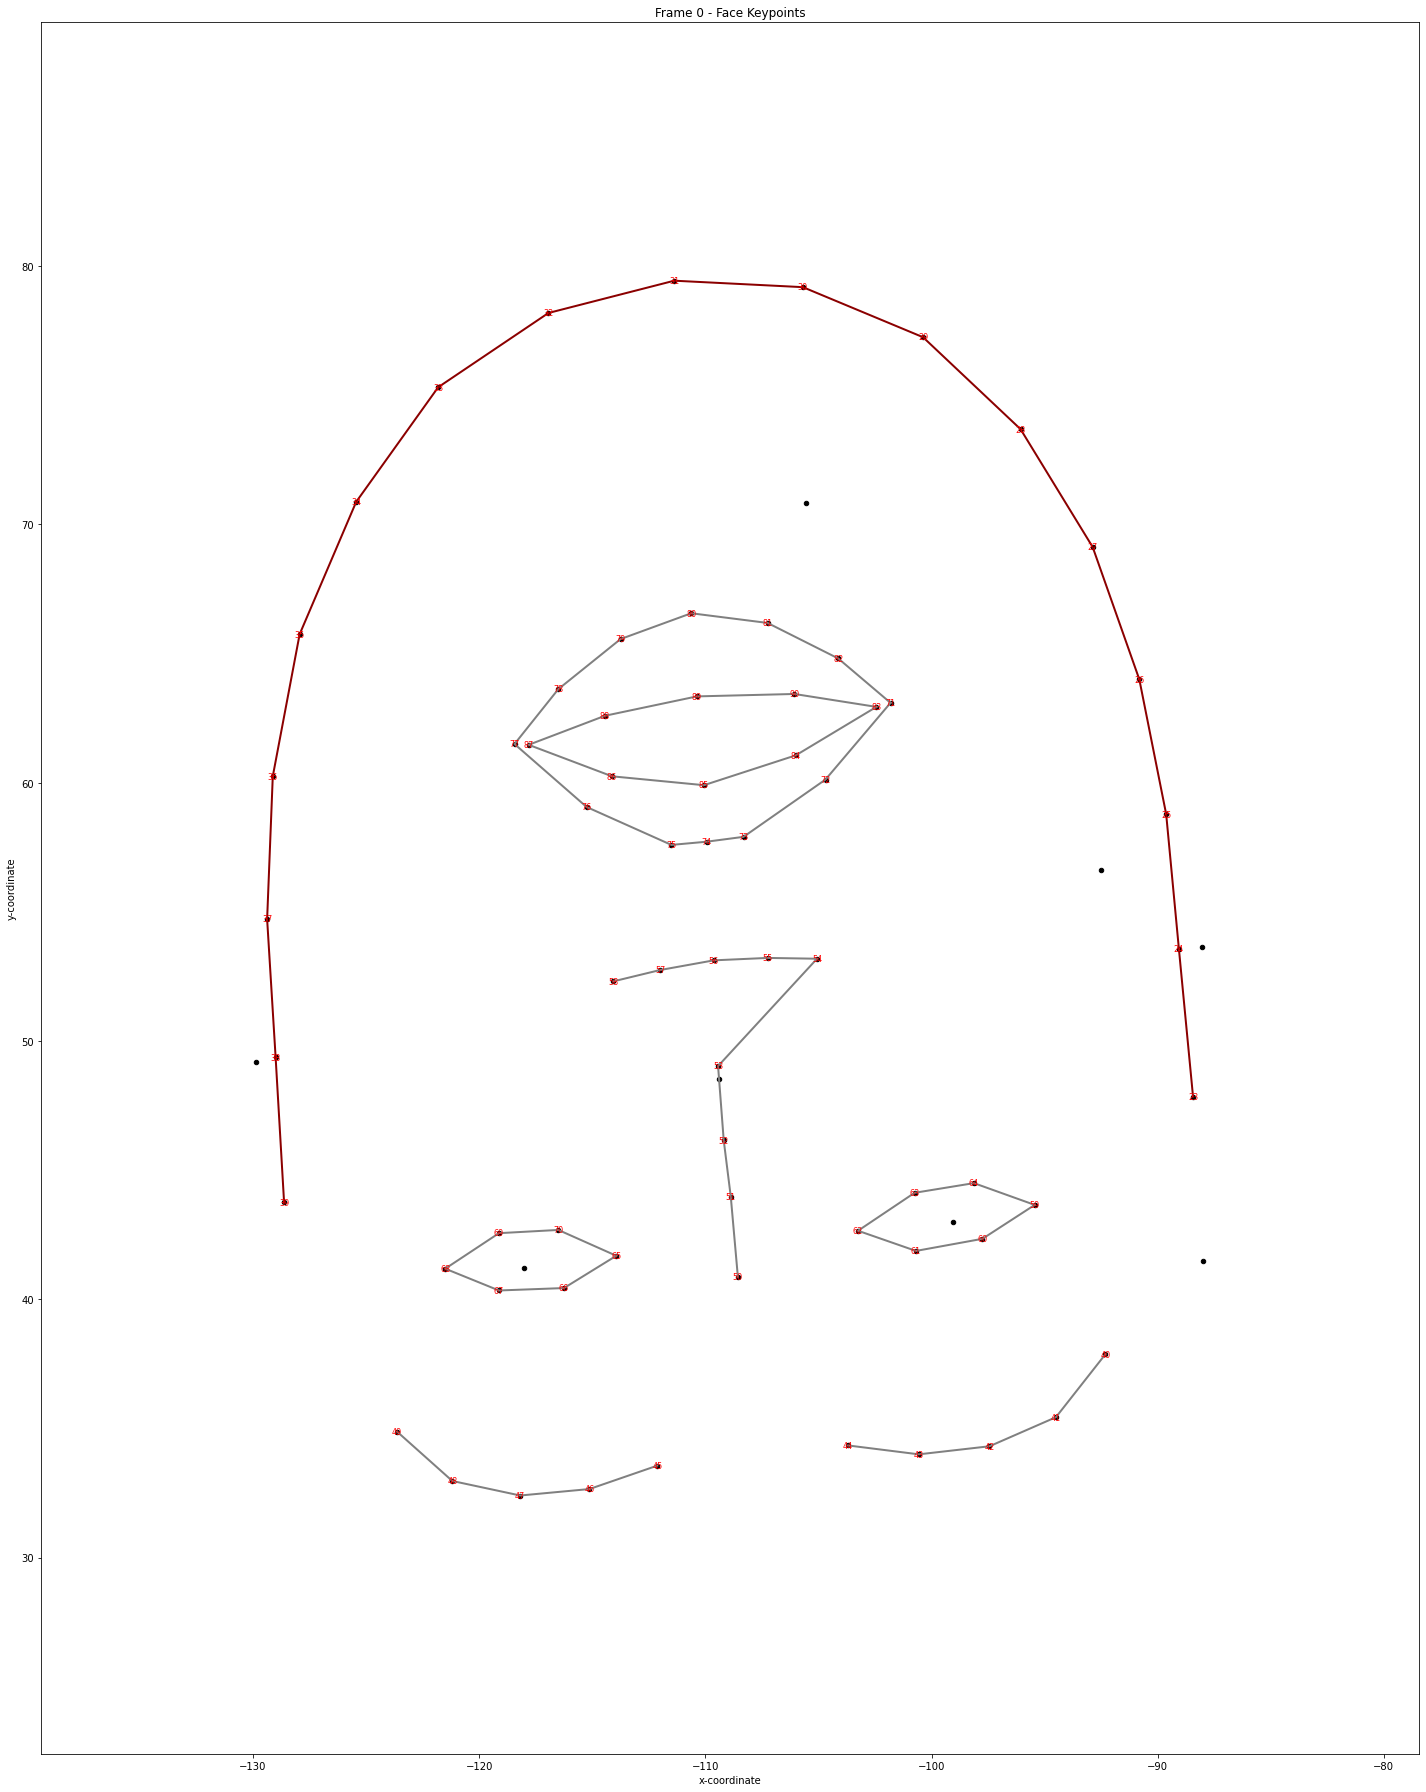

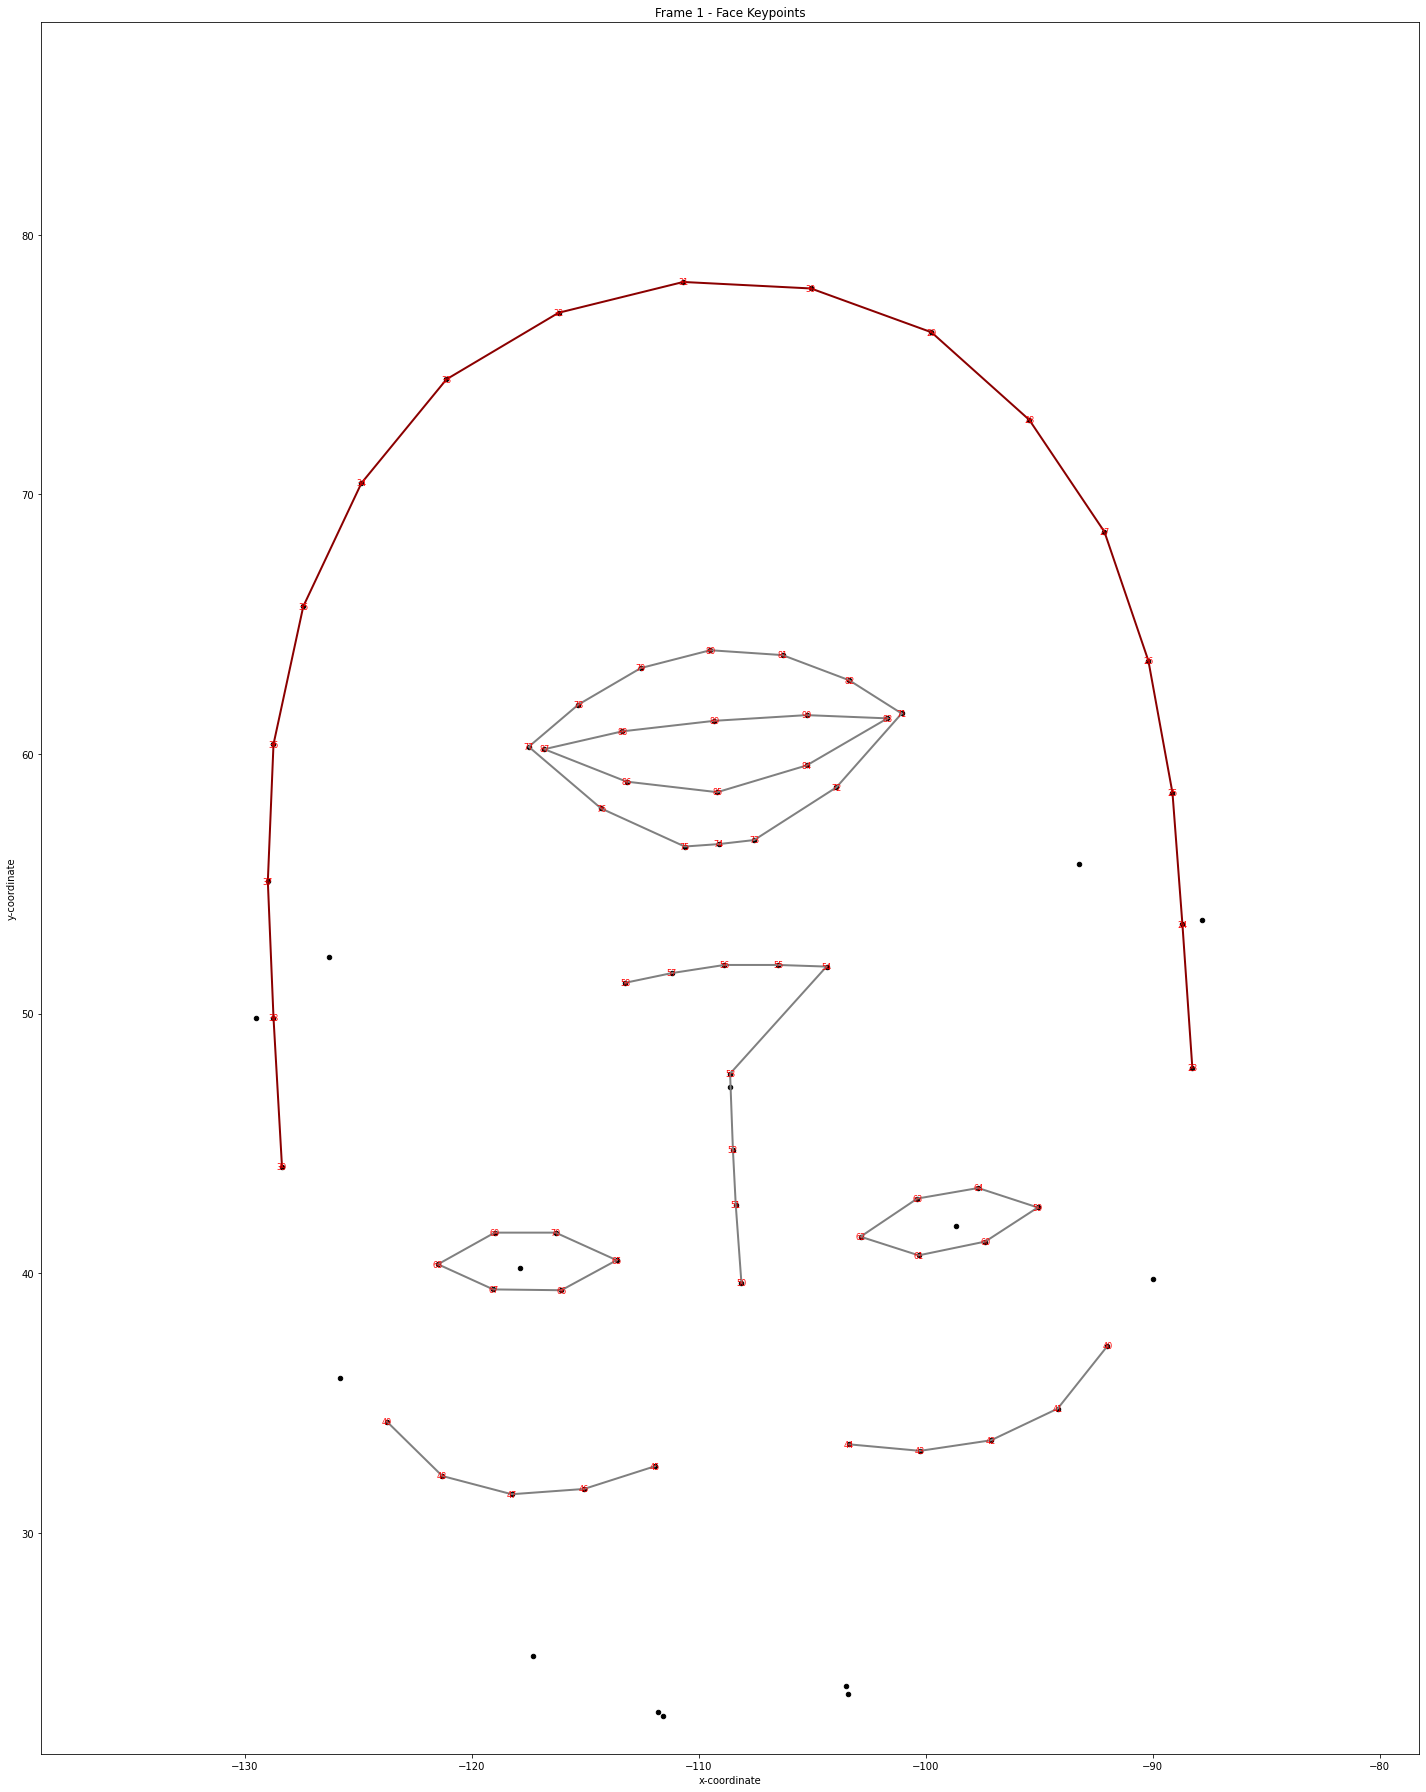

In [45]:
def visualize_face_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(20, 25))
    
    # Color mapping specifically for face parts
    color_map = {
        'face_contour': 'darkred',
        'eyes_region': 'navy',
        'left_eye': 'blue',
        'right_eye': 'royalblue',
        'eyebrows_region': 'darkmagenta',
        'left_eyebrow': 'purple',
        'right_eyebrow': 'mediumorchid',
        'nose_region': 'darkorange',
        'nose_upper': 'orange',
        'nose_lower': 'coral',
        'mouth_region': 'maroon',
        'mouth_outer': 'firebrick',
        'mouth_inner': 'indianred'
    }
    
    # Face-specific keypoint regions
    face_parts = {
        'contour': list(range(23, 40)),  # Face outline
        'eyes': {
            'left': list(range(59, 65)) + [59],
            'right': list(range(65, 71)) + [65]
        },
        'eyebrows': {
            'left': list(range(45, 50)),
            'right': list(range(40, 45))
        },
        'nose': list(range(50, 59)),
        'mouth': {
            'outer': list(range(71, 83)) + [71],
            'inner': list(range(83, 91)) + [83]
        }
    }
    
    # Create a subplot for the face
    plt.subplot(111)
    
    # Plot face keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=20, label='Keypoints')

    # Add numbers for face keypoints
    for i, (x, y, c) in enumerate(rotated_keypoints):
        if 23 <= i < 91:  # Only label keypoints in the face region
            plt.text(x, -y, f'{i}', fontsize=8, color='red', ha='center', va='center')

    # Function to draw keypoint connections
    def draw_face_connections(parts, color_prefix='face'):
        if isinstance(parts, dict):
            for part_name, part_points in parts.items():
                color_key = f'{color_prefix}_{part_name}'
                
                # Recursively handle nested structures
                if isinstance(part_points, dict):
                    draw_face_connections(part_points, color_key)
                else:
                    draw_connections(part_points, color_map.get(color_key, 'gray'))
        else:
            draw_connections(parts, color_map.get(color_prefix, 'gray'))

    # Helper function to draw connections
    def draw_connections(points, color):
        if isinstance(points, list):
            if len(points) > 0:
                if isinstance(points[0], int):
                    # Simple list of indices
                    plt.plot(rotated_keypoints[points, 0], 
                             -rotated_keypoints[points, 1], 
                             color=color, 
                             linewidth=2)
                else:
                    # List of connection tuples
                    for start, end in points:
                        x_start, y_start = rotated_keypoints[start, 0], -rotated_keypoints[start, 1]
                        x_end, y_end = rotated_keypoints[end, 0], -rotated_keypoints[end, 1]
                        plt.plot([x_start, x_end], [y_start, y_end], 
                                 color=color, 
                                 linewidth=2)

    # Draw connections for face parts
    draw_face_connections(face_parts)

    plt.title(f"Frame {frame_index} - Face Keypoints")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    # Adjust the plot to focus on the face region
    plt.xlim(rotated_keypoints[23:91, 0].min() - 10, rotated_keypoints[23:91, 0].max() + 10)
    plt.ylim(-rotated_keypoints[23:91, 1].max() - 10, -rotated_keypoints[23:91, 1].min() + 10)
    
    plt.show()

# Modify the main loop to use the new visualization function
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_face_keypoints(rotated_keypoints, frame_index)
        break

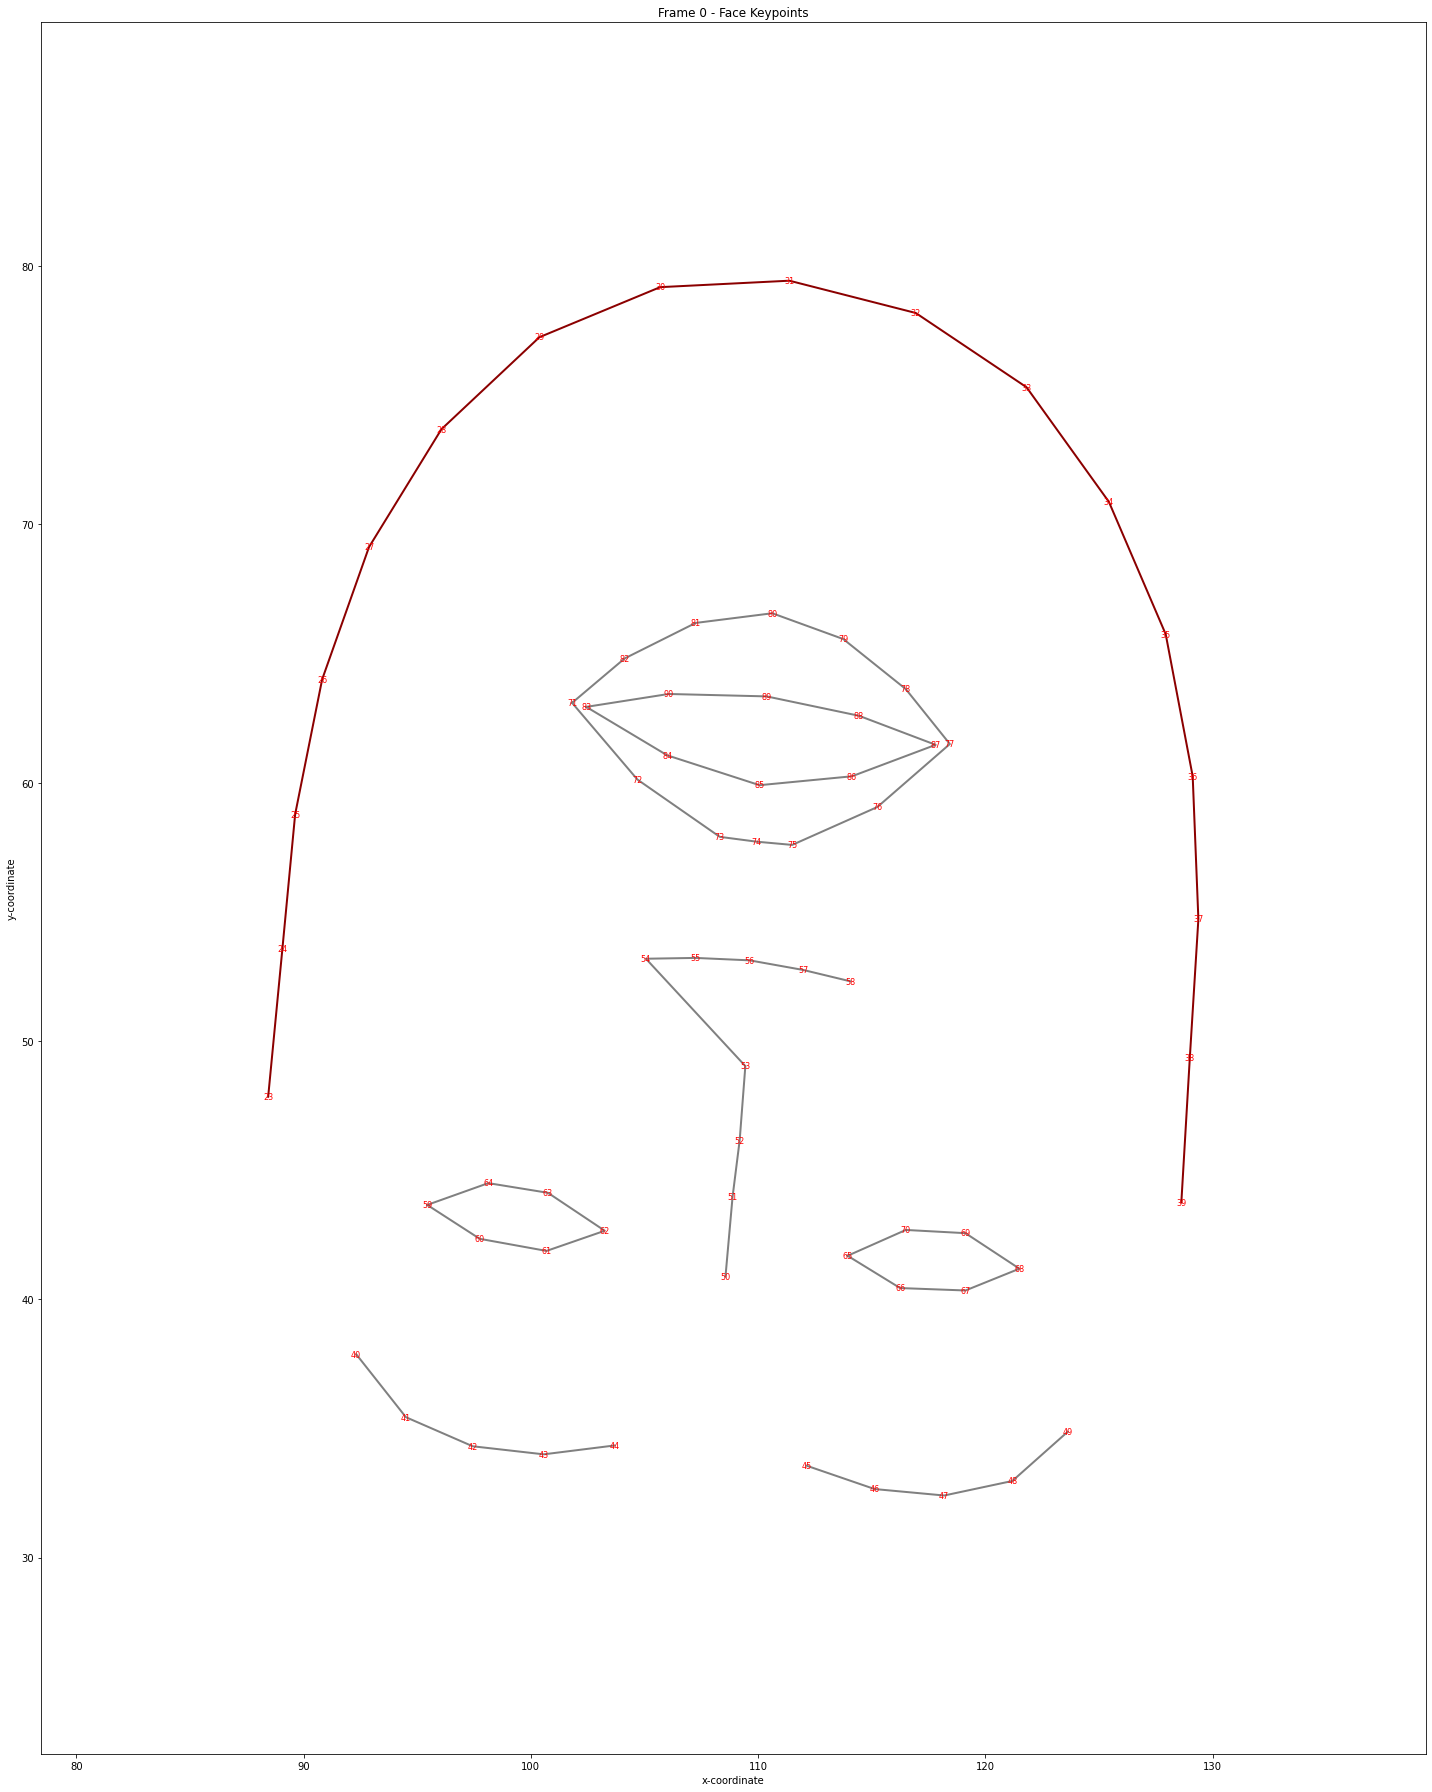

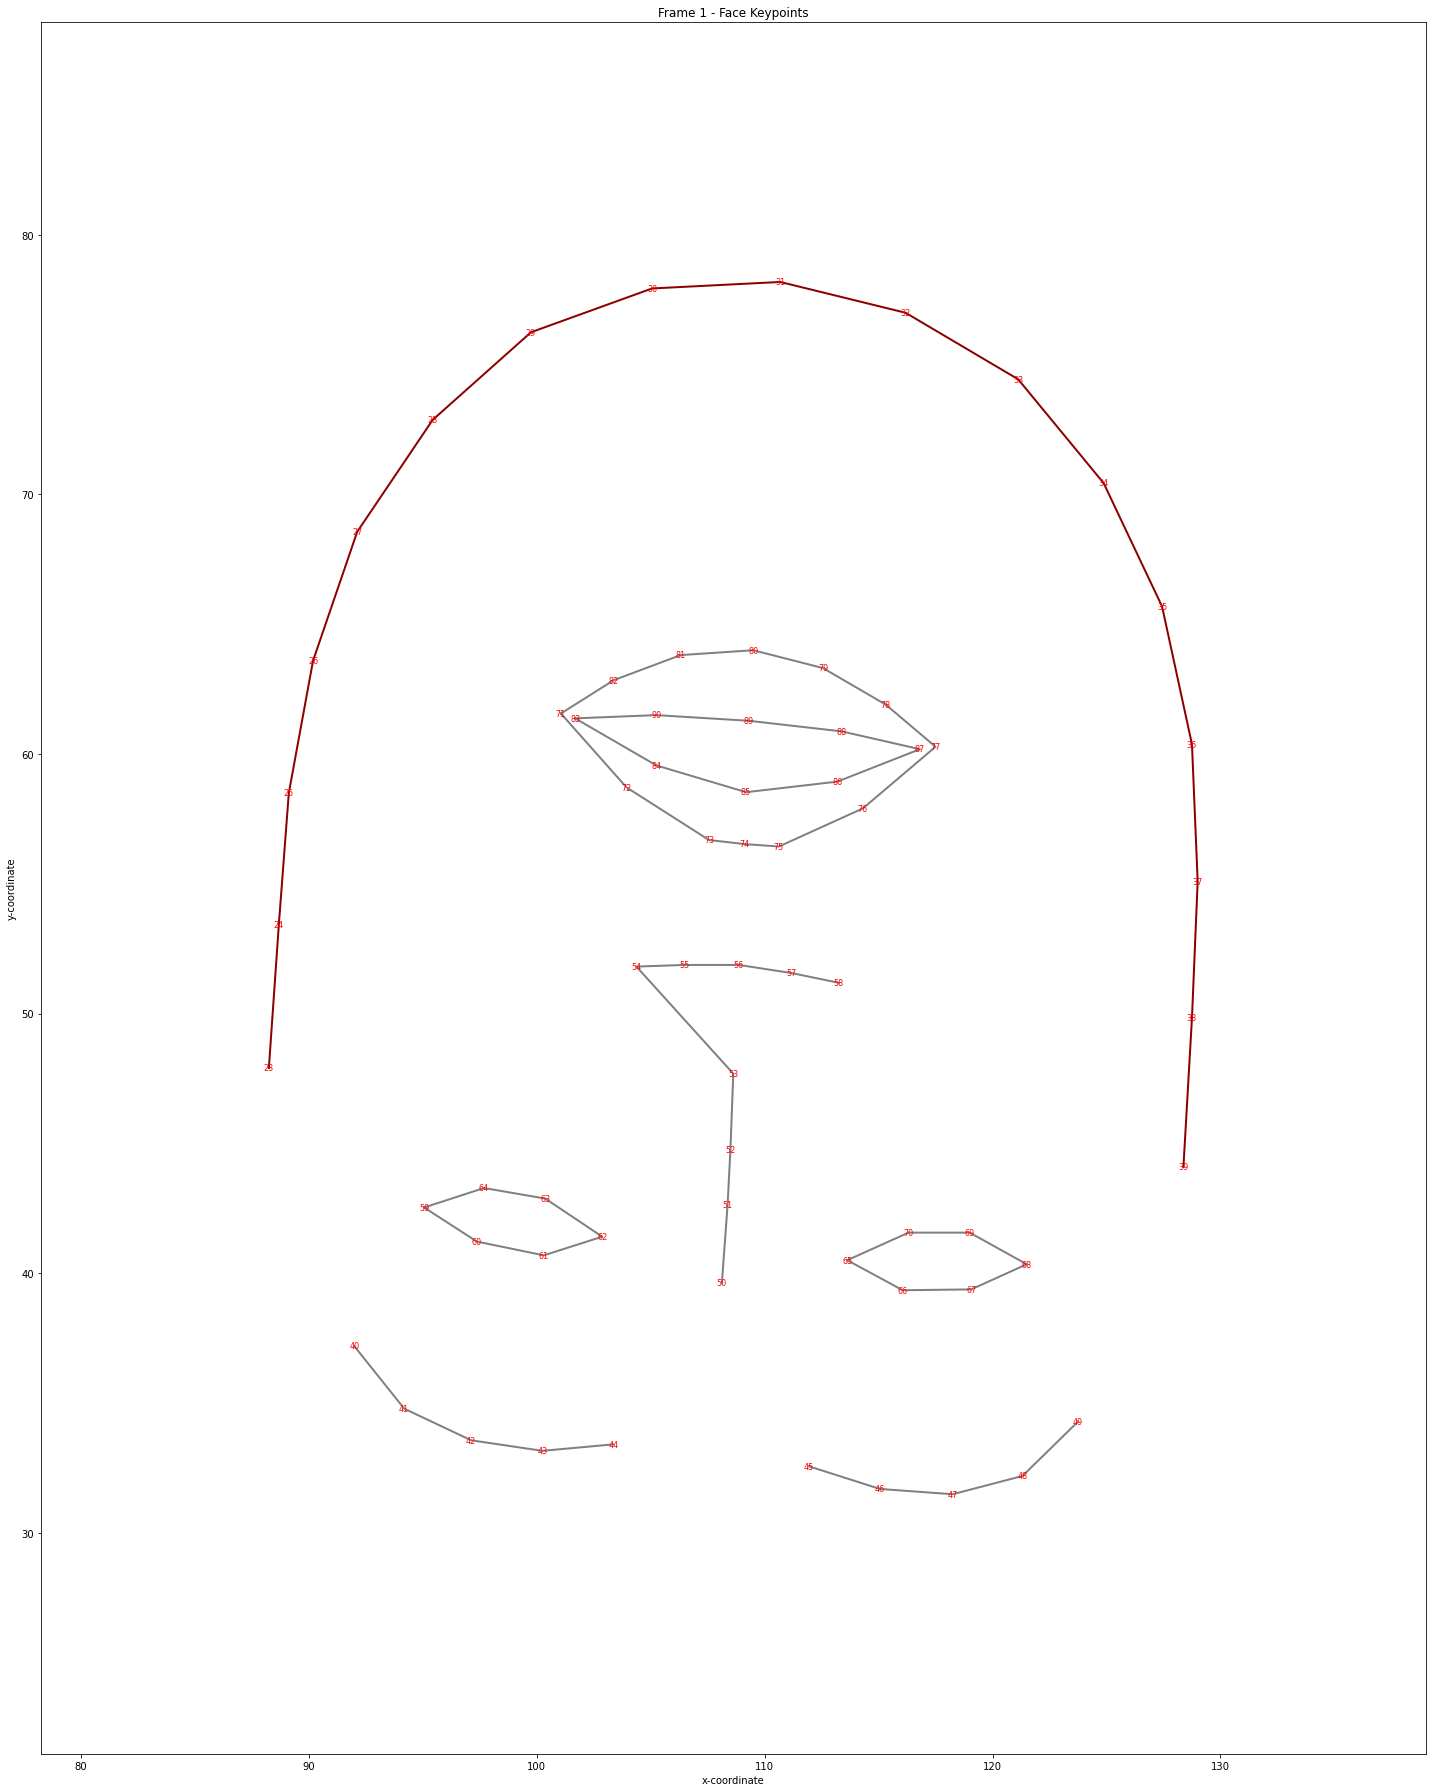

In [50]:
def visualize_face_keypoints(keypoints, frame_index):
    plt.figure(figsize=(20, 25))
    
    # Color mapping specifically for face parts
    color_map = {
        'face_contour': 'darkred',
        'eyes_region': 'navy',
        'left_eye': 'blue',
        'right_eye': 'royalblue',
        'eyebrows_region': 'darkmagenta',
        'left_eyebrow': 'purple',
        'right_eyebrow': 'mediumorchid',
        'nose_region': 'darkorange',
        'nose_upper': 'orange',
        'nose_lower': 'coral',
        'mouth_region': 'maroon',
        'mouth_outer': 'firebrick',
        'mouth_inner': 'indianred'
    }
    
    # Face-specific keypoint regions
    face_parts = {
        'contour': list(range(23, 40)),  # Face outline
        'eyes': {
            'left': list(range(59, 65)) + [59],
            'right': list(range(65, 71)) + [65]
        },
        'eyebrows': {
            'left': list(range(45, 50)),
            'right': list(range(40, 45))
        },
        'nose': list(range(50, 59)),
        'mouth': {
            'outer': list(range(71, 83)) + [71],
            'inner': list(range(83, 91)) + [83]
        }
    }
    
    # Create a subplot for the face
    plt.subplot(111)
    
    # Plot face keypoints without vertical negation
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=20, label='Keypoints')

    # Add numbers for face keypoints
    for i, (x, y, c) in enumerate(keypoints):
        if 23 <= i < 91:  # Only label keypoints in the face region
            plt.text(x, y, f'{i}', fontsize=8, color='red', ha='center', va='center')

    # Function to draw keypoint connections
    def draw_face_connections(parts, color_prefix='face'):
        if isinstance(parts, dict):
            for part_name, part_points in parts.items():
                color_key = f'{color_prefix}_{part_name}'
                
                # Recursively handle nested structures
                if isinstance(part_points, dict):
                    draw_face_connections(part_points, color_key)
                else:
                    draw_connections(part_points, color_map.get(color_key, 'gray'))
        else:
            draw_connections(parts, color_map.get(color_prefix, 'gray'))

    # Helper function to draw connections
    def draw_connections(points, color):
        if isinstance(points, list):
            if len(points) > 0:
                if isinstance(points[0], int):
                    # Simple list of indices
                    plt.plot(keypoints[points, 0], 
                             keypoints[points, 1], 
                             color=color, 
                             linewidth=2)
                else:
                    # List of connection tuples
                    for start, end in points:
                        x_start, y_start = keypoints[start, 0], keypoints[start, 1]
                        x_end, y_end = keypoints[end, 0], keypoints[end, 1]
                        plt.plot([x_start, x_end], [y_start, y_end], 
                                 color=color, 
                                 linewidth=2)

    # Draw connections for face parts
    draw_face_connections(face_parts)

    plt.title(f"Frame {frame_index} - Face Keypoints")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    
    # Adjust the plot to focus on the face region
    plt.xlim(keypoints[23:91, 0].min() - 10, keypoints[23:91, 0].max() + 10)
    plt.ylim(keypoints[23:91, 1].min() - 10, keypoints[23:91, 1].max() + 10)
    
    plt.tight_layout()
    plt.show()

# Modification for the main loop
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            # No need for rotation if you want the original orientation
            visualize_face_keypoints(frame_keypoints, frame_index)
        break

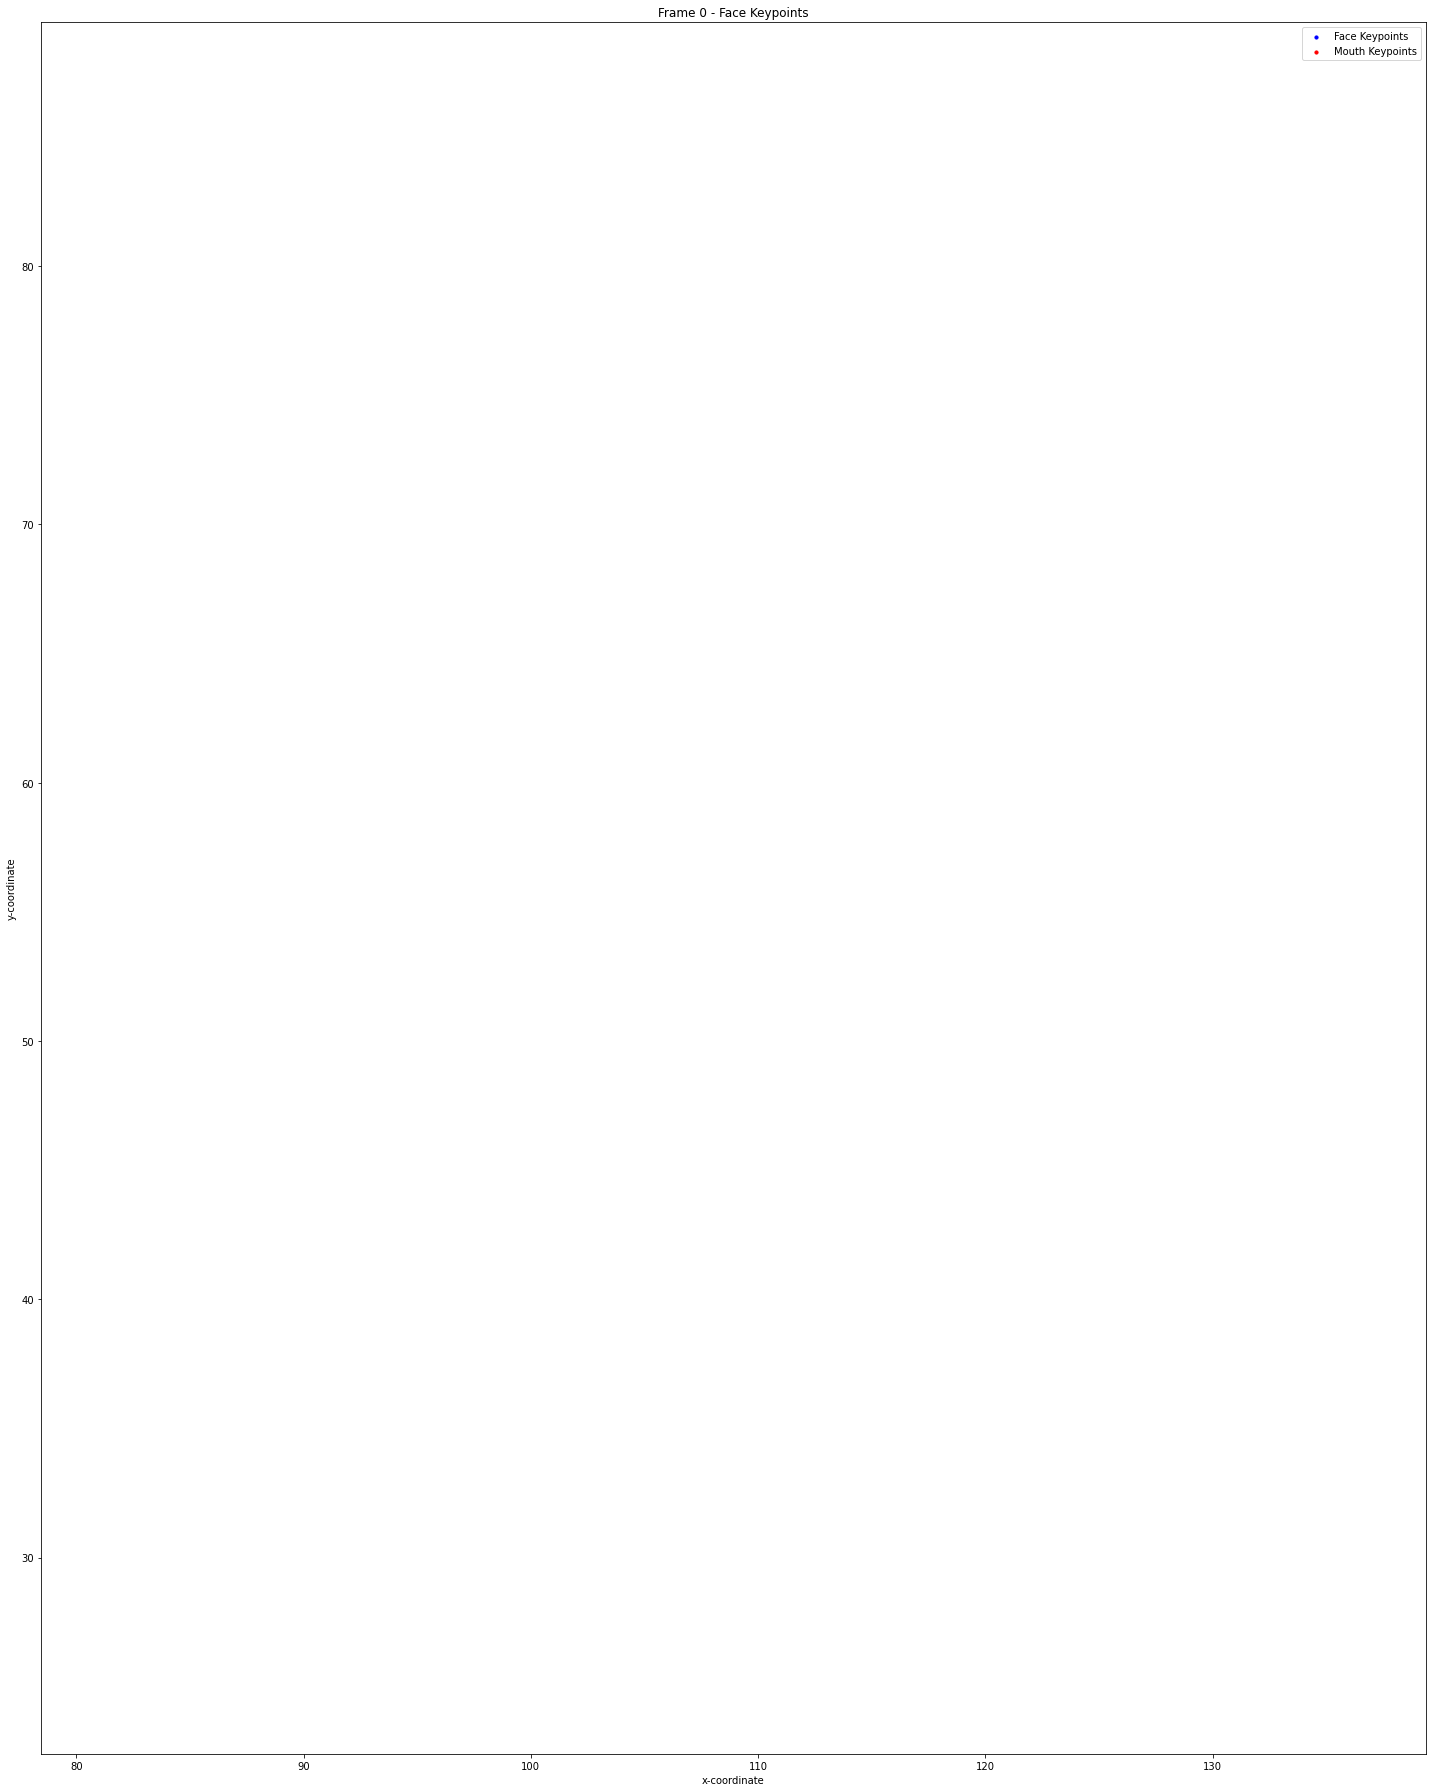

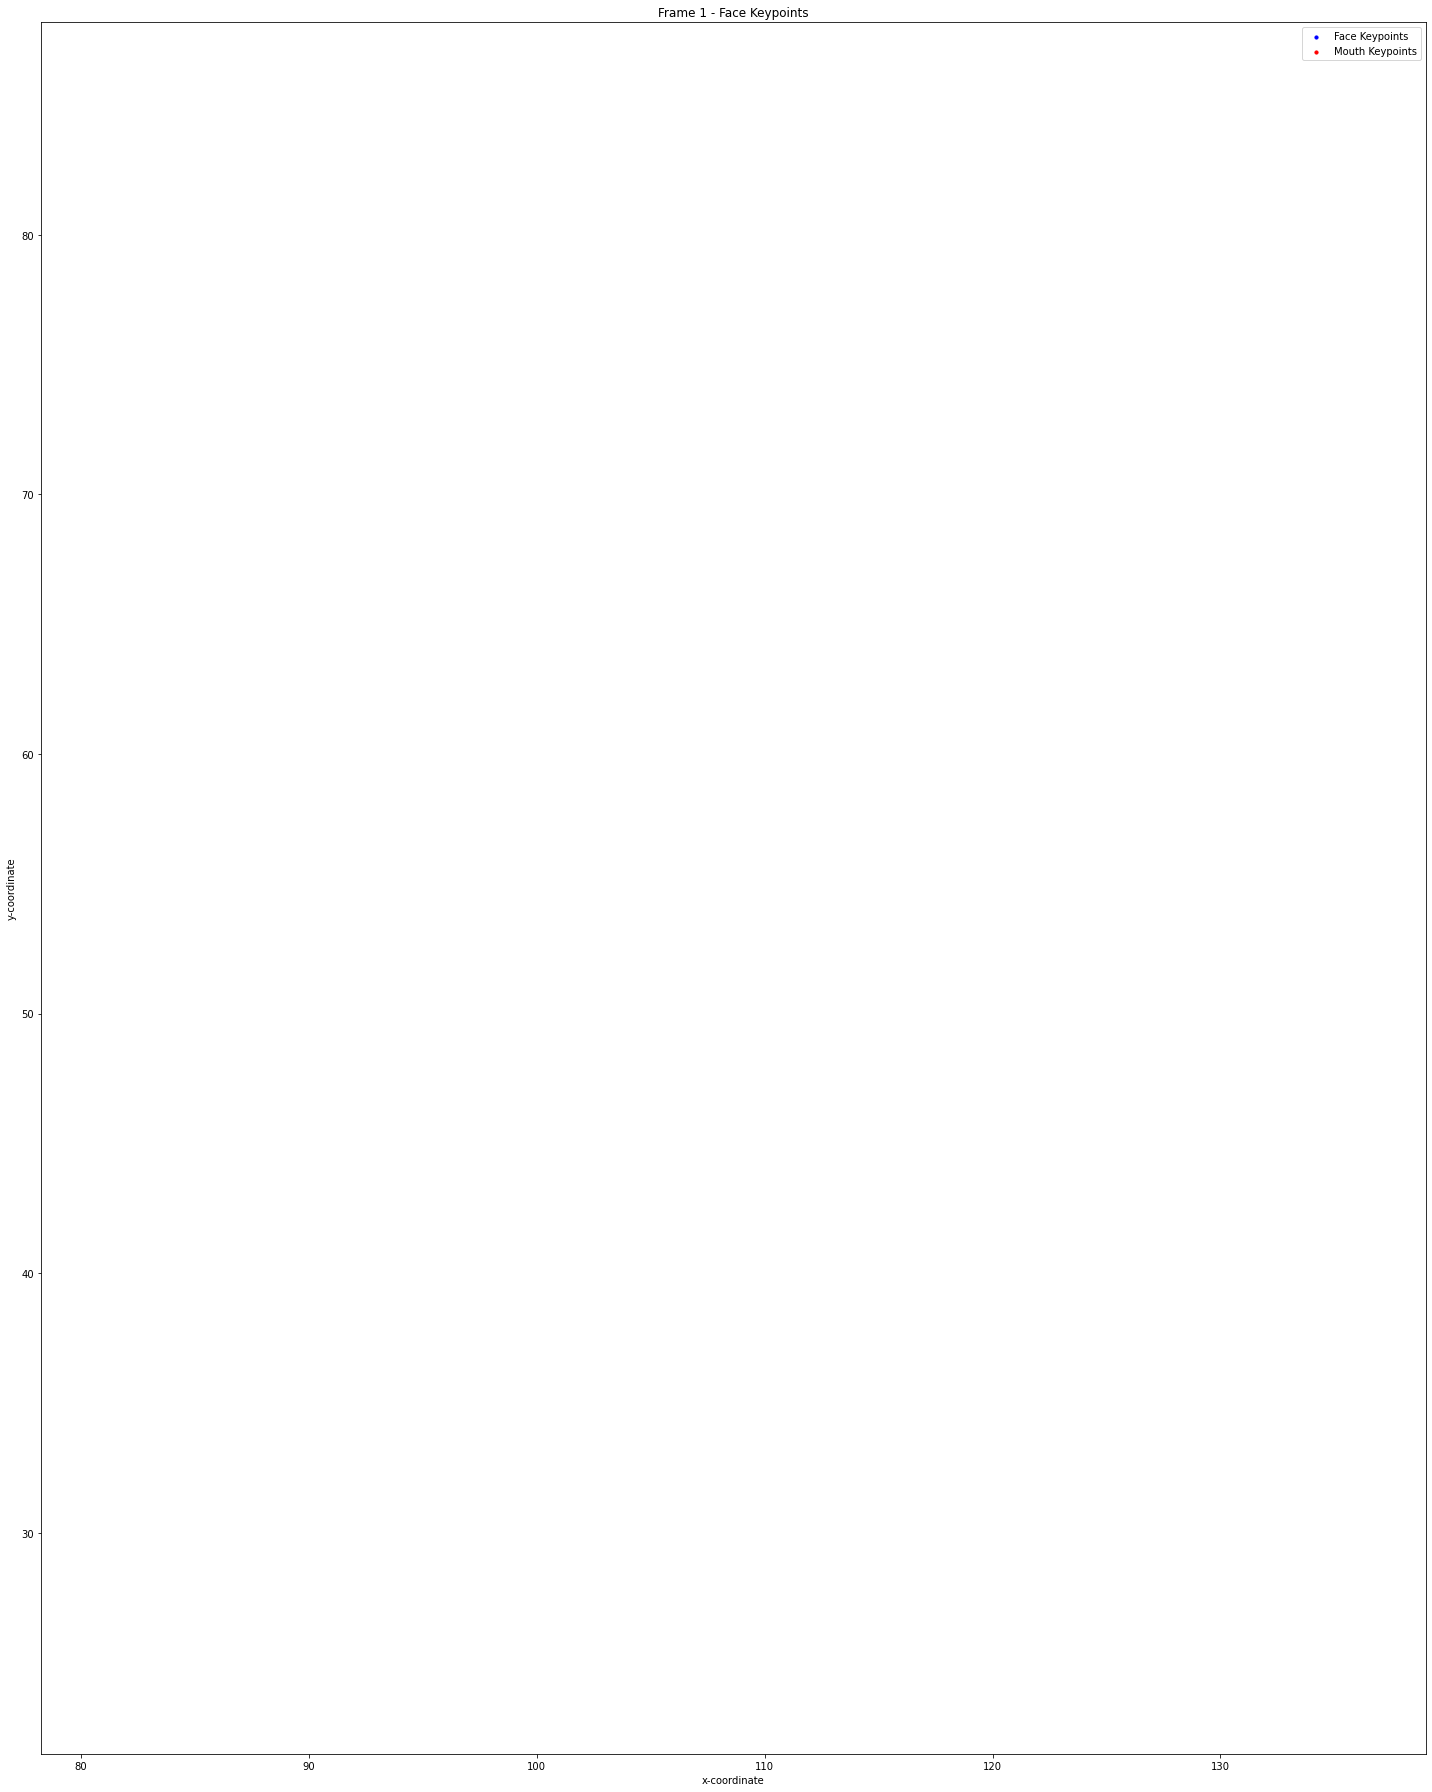

In [51]:
from rtree import index

def create_face_rtree(keypoints):
    face_idx = index.Index()
    face_points = list(range(23, 40)) + list(range(45, 71)) + list(range(50, 59))
    for i in face_points:
        x, y, _ = keypoints[i]
        face_idx.insert(i, (x, y, x, y))
    return face_idx

def create_mouth_rtree(keypoints):
    mouth_idx = index.Index()
    mouth_points = list(range(71, 91))
    for i in mouth_points:
        x, y, _ = keypoints[i]
        mouth_idx.insert(i, (x, y, x, y))
    return mouth_idx

def visualize_face_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(20, 25))

    # Create R-trees for facial and mouth keypoints
    face_rtree = create_face_rtree(rotated_keypoints)
    mouth_rtree = create_mouth_rtree(rotated_keypoints)

    # Plot face keypoints
    face_points = list(face_rtree.intersection(face_rtree.bounds))
    plt.scatter([rotated_keypoints[i][0] for i in face_points], 
                [-rotated_keypoints[i][1] for i in face_points], 
                color='blue', s=10, label='Face Keypoints')

    # Plot mouth keypoints separately
    mouth_points = list(mouth_rtree.intersection(mouth_rtree.bounds))
    plt.scatter([rotated_keypoints[i][0] for i in mouth_points], 
                [-rotated_keypoints[i][1] for i in mouth_points], 
                color='red', s=10, label='Mouth Keypoints')

    # Define color mapping for different face parts
    color_map = {
        'face_contour': 'darkred',
        'eyes_region': 'navy',
        'left_eye': 'blue',
        'right_eye': 'royalblue',
        'eyebrows_region': 'darkmagenta',
        'left_eyebrow': 'purple',
        'right_eyebrow': 'mediumorchid',
        'nose_region': 'darkorange',
        'nose_upper': 'orange',
        'nose_lower': 'coral',
        'mouth_region': 'maroon',
        'mouth_outer': 'firebrick',
        'mouth_inner': 'indianred'
    }

    # Body parts definition
    body_parts = {
        'contour': list(range(23, 40)),  # Face outline
        'eyes': {
            'left': list(range(59, 65)) + [59],
            'right': list(range(65, 71)) + [65]
        },
        'eyebrows': {
            'left': list(range(45, 50)),
            'right': list(range(40, 45))
        },
        'nose': list(range(50, 59)),
        'mouth': {
            'outer': list(range(71, 83)) + [71],
            'inner': list(range(83, 91)) + [83]
        }
    }

    # Draw connections for each body part
    def draw_face_connections(parts):
        if isinstance(parts, dict):
            for part_name, part_points in parts.items():
                if isinstance(part_points, dict):
                    draw_face_connections(part_points)  # Recursive call
                else:
                    plt.plot(rotated_keypoints[part_points][:, 0], -rotated_keypoints[part_points][:, 1],
                             color=color_map.get(part_name.replace(' ', '_'), 'gray'), linewidth=2)

    draw_face_connections(body_parts)

    plt.title(f"Frame {frame_index} - Face Keypoints")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    
    # Adjust the plot to focus on the face region
    plt.xlim(rotated_keypoints[23:91, 0].min() - 10, rotated_keypoints[23:91, 0].max() + 10)
    plt.ylim(rotated_keypoints[23:91, 1].min() - 10, rotated_keypoints[23:91, 1].max() + 10)
    
    plt.tight_layout()
    plt.legend()
    plt.show()

# Main loop remains unchanged
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            visualize_face_keypoints(frame_keypoints, frame_index)
        break

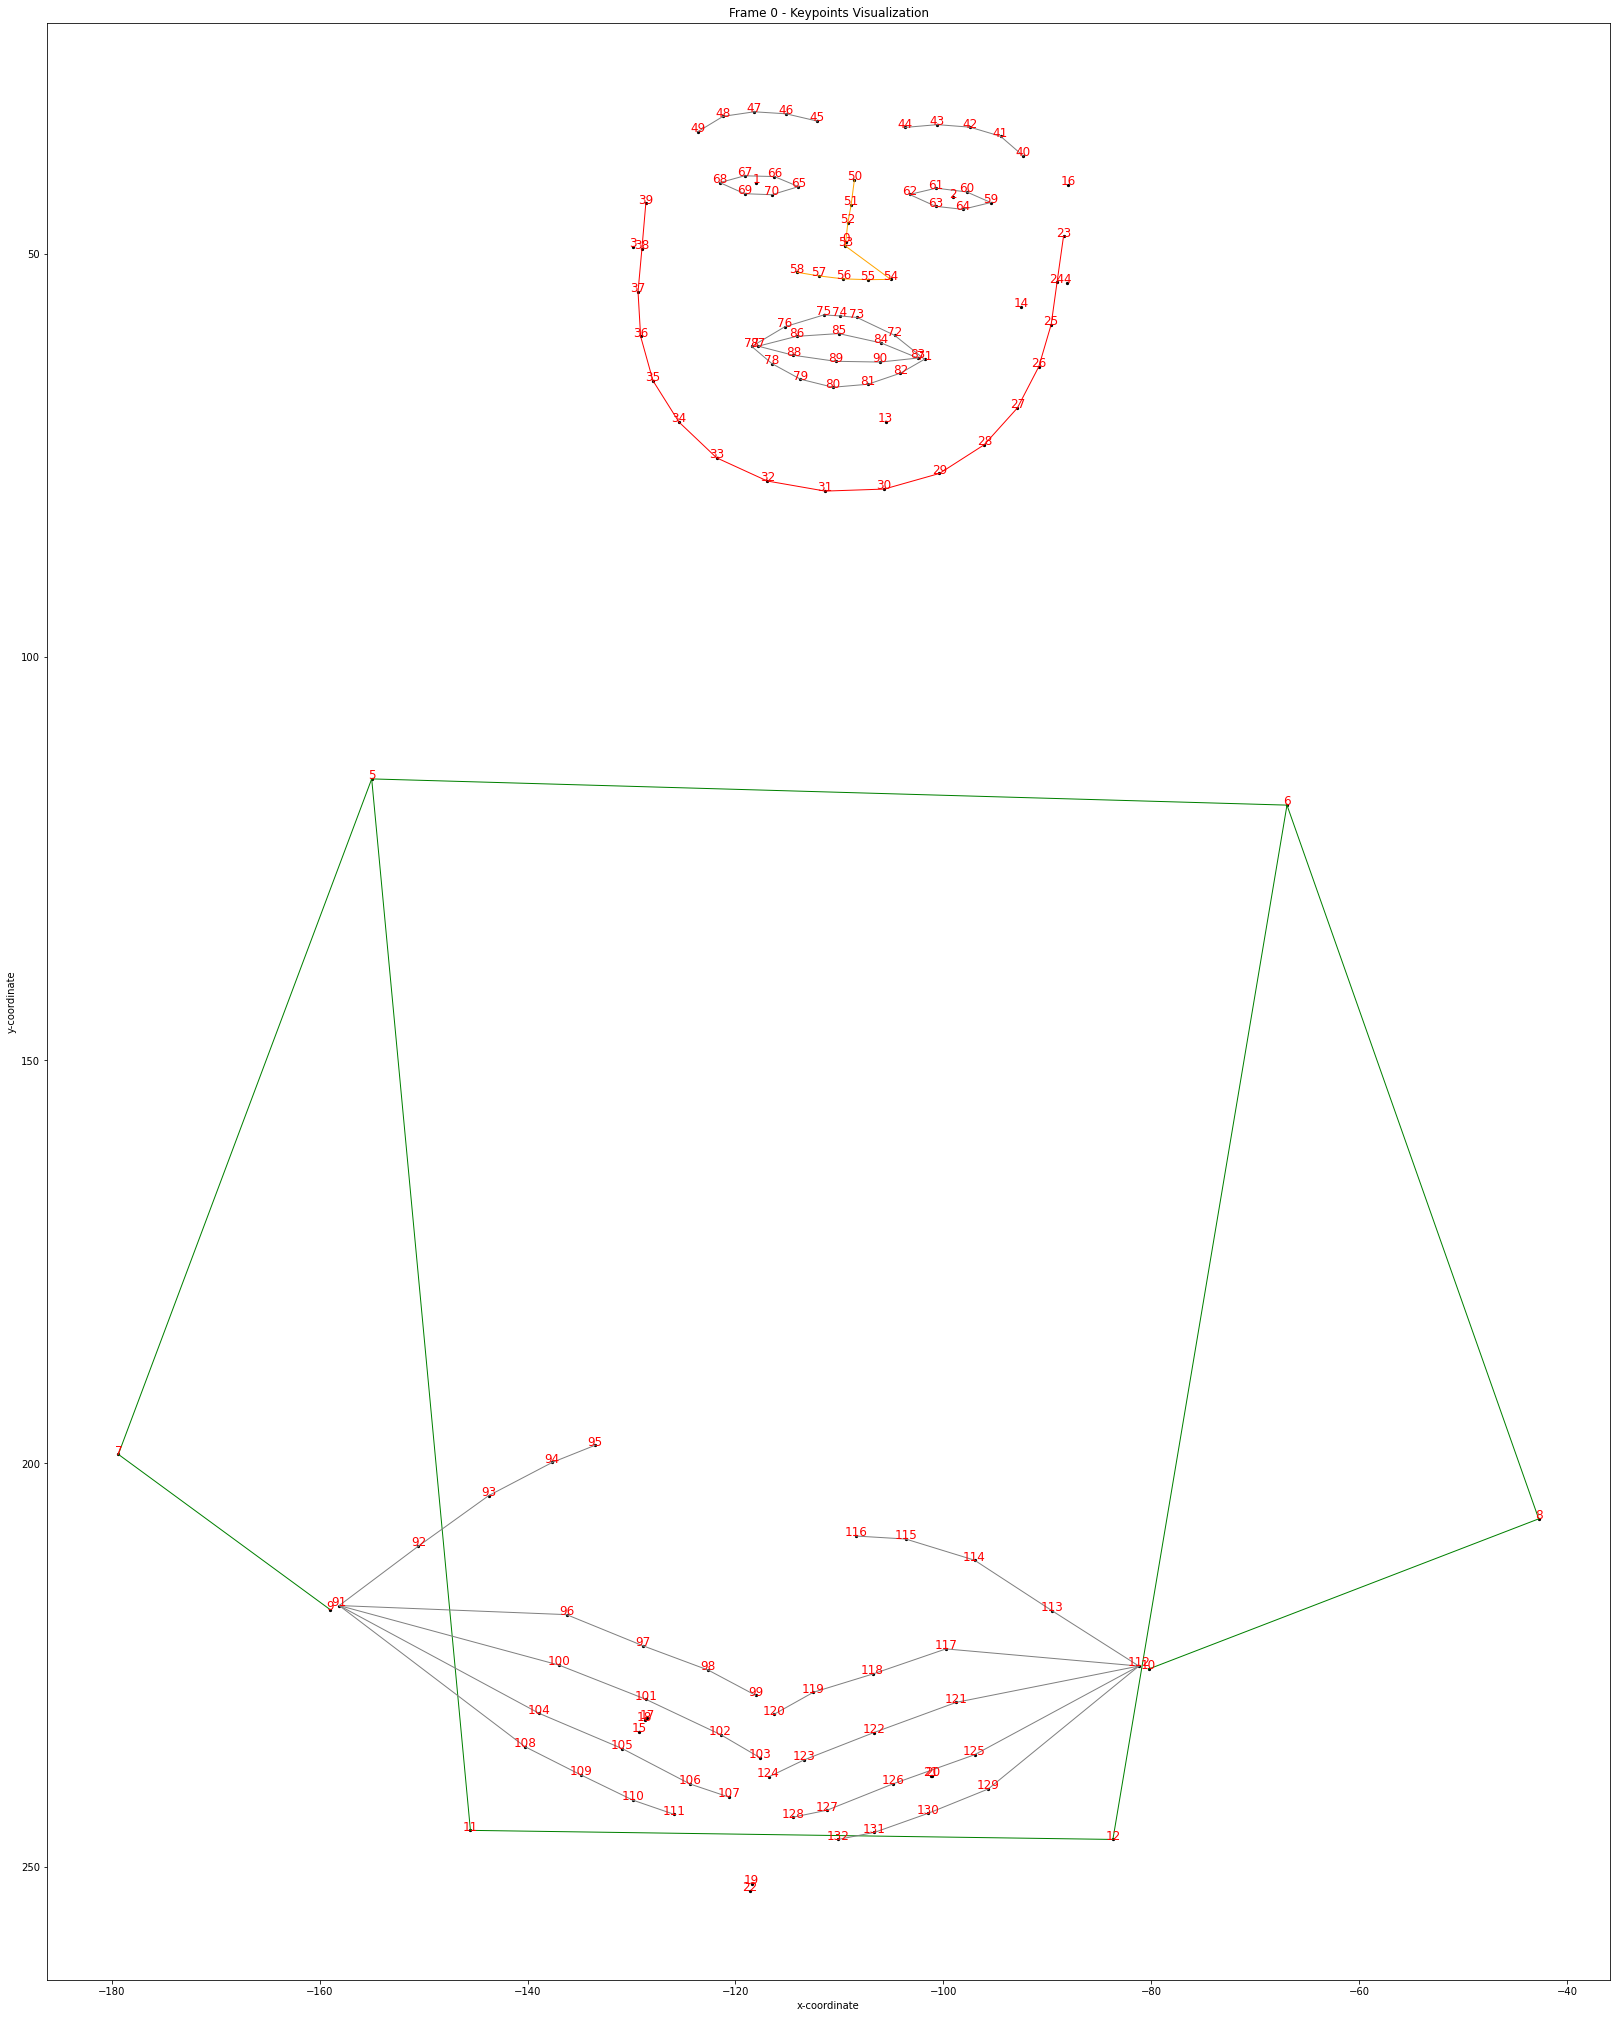

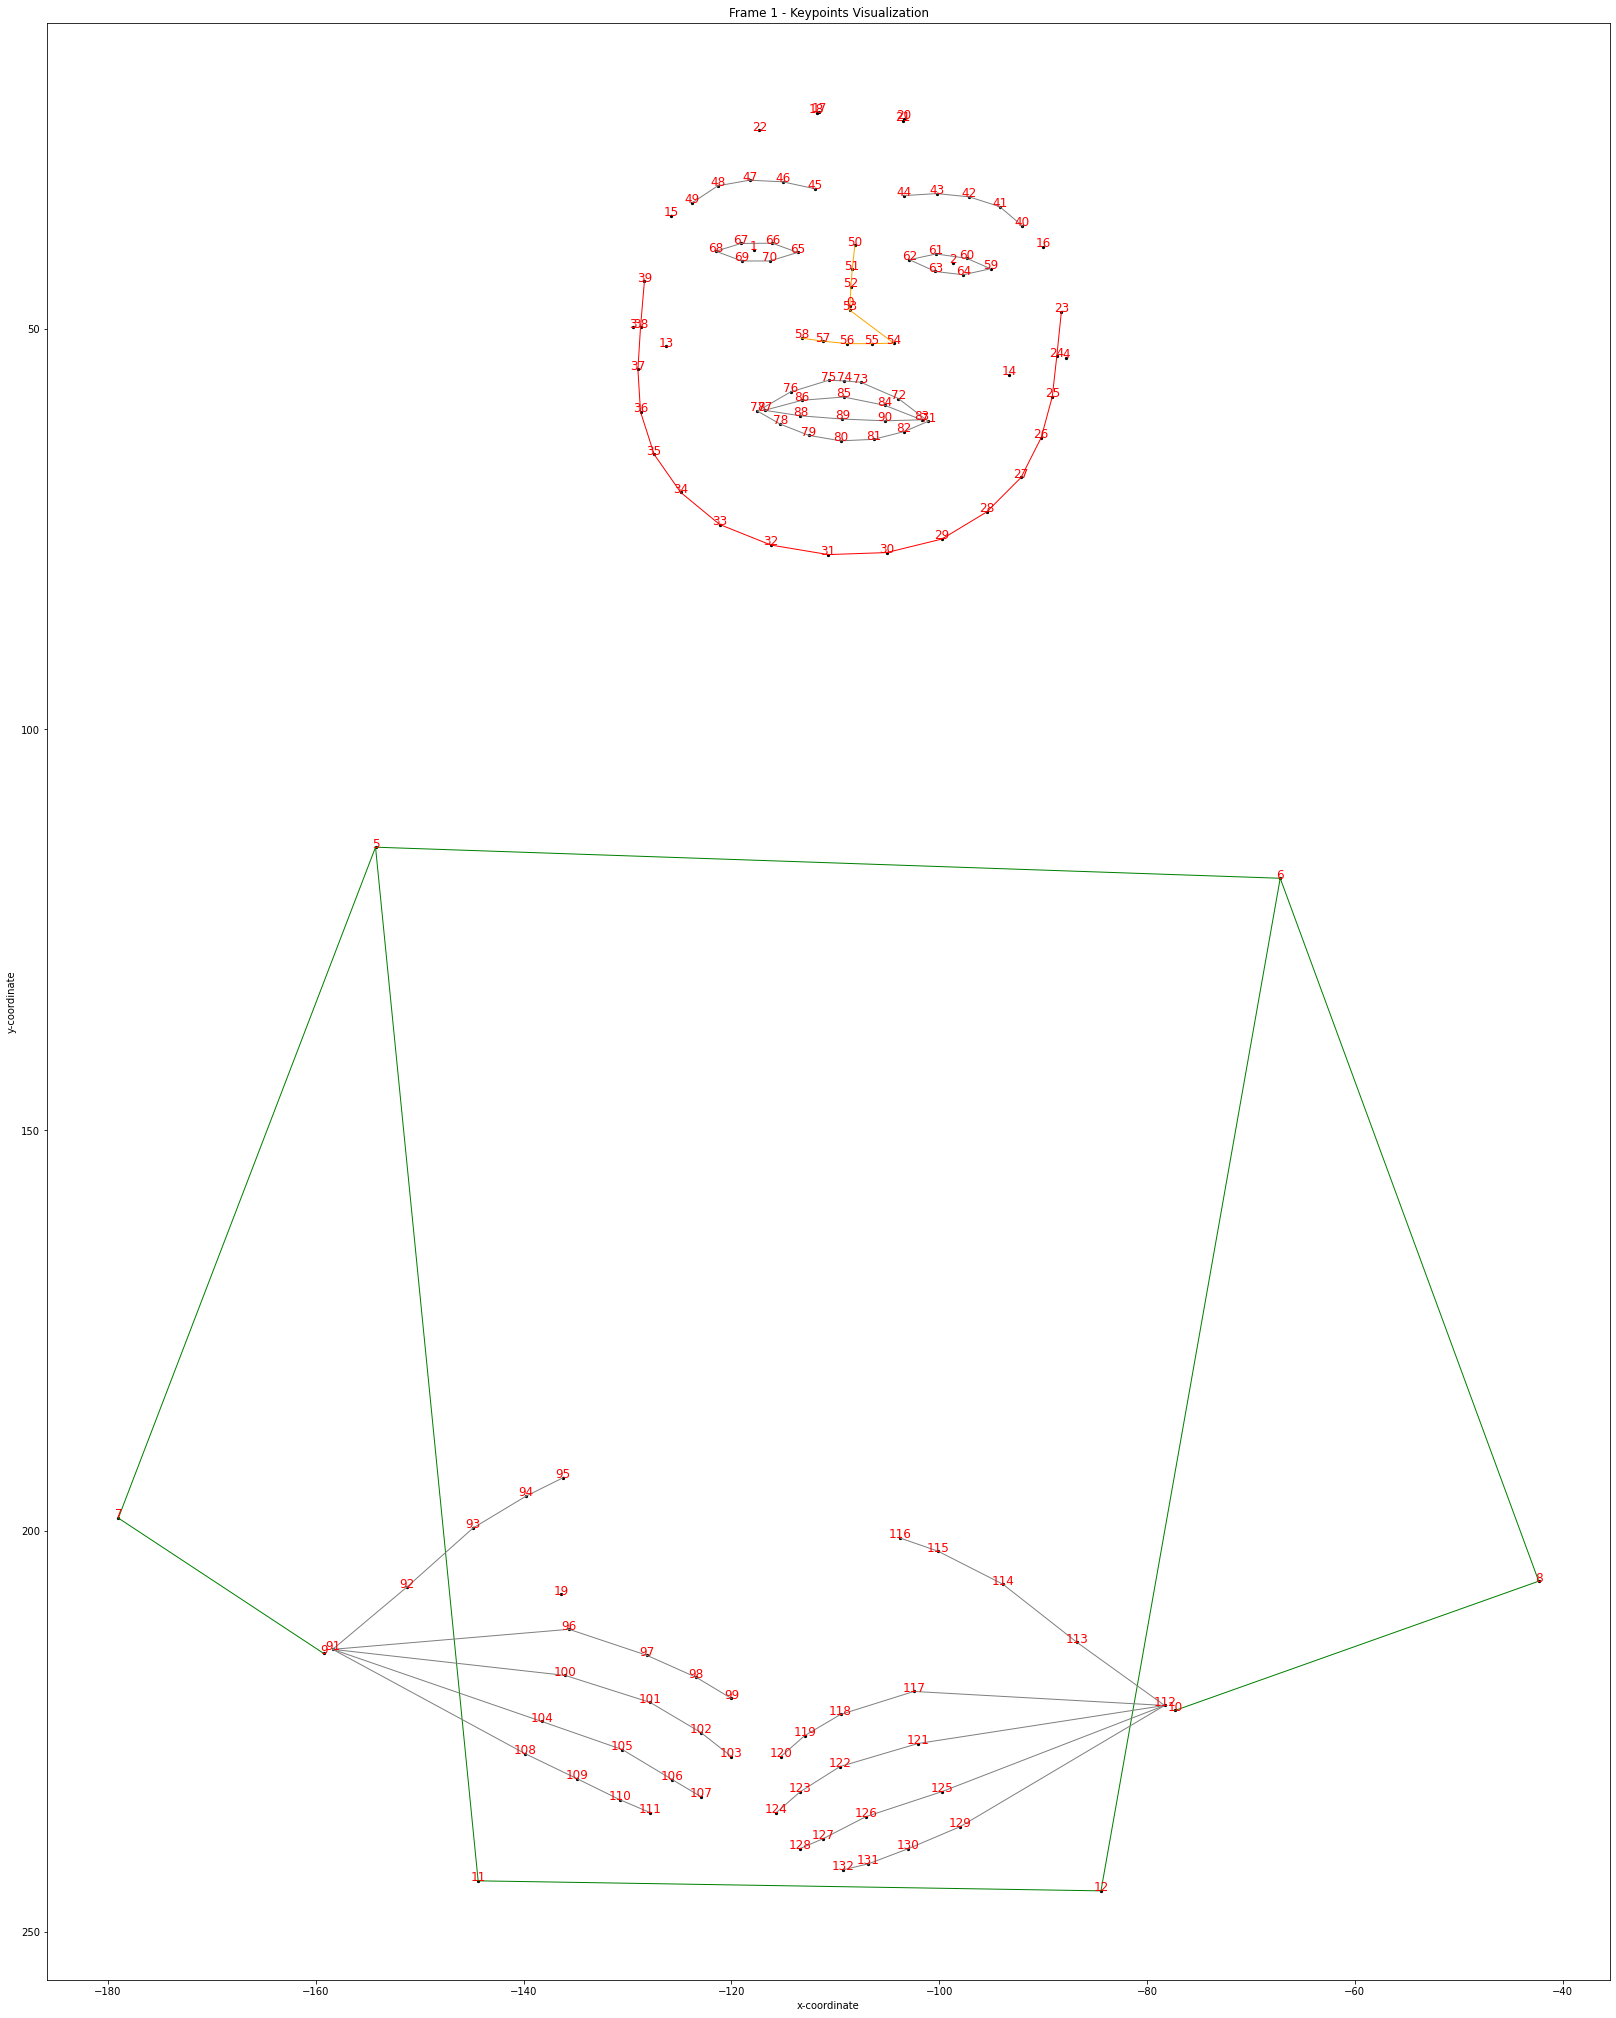

In [34]:
def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))
    
    # Define color mapping for different body parts
    color_map = {
    'body': 'green',
    'face': 'red',
    'left_eyes': 'blue',
    'right_eyes': 'blue',
    'left_eyebrows': 'purple',
    'right_eyebrows': 'purple',
    'nose': 'orange',
    'mouth_outer': 'magenta',
    'mouth_inner': 'magenta',
    'right_thumb': 'cyan',
    'right_index': 'gold',
    'right_middle': 'lime',
    'right_ring': 'pink',
    'right_pinky': 'violet',
    'left_thumb': 'brown',
    'left_index': 'olive',
    'left_middle': 'teal',
    'left_ring': 'coral',
    'left_pinky': 'lavender'
}
    
    # Body parts
    body_parts = {
    'body': [(5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12)],
    'face': list(range(23, 40)),
    'left_eyes': list(range(59, 65)) + [59],
    'right_eyes': list(range(65, 71)) + [65],
    'left_eyebrows': [(45, 46), (46, 47), (47, 48), (48, 49)],
    'right_eyebrows': [(40, 41), (41, 42), (42, 43), (43, 44)],
    'nose': list(range(50, 59)),
    'mouth_outer': list(range(71, 83)) + [71],
    'mouth_inner': list(range(83, 91)) + [83],
    'right_thumb': [(91, 92), (92, 93), (93, 94), (94, 95)],
    'right_index': [(91, 96), (96, 97), (97, 98), (98, 99)],
    'right_middle': [(91, 100), (100, 101), (101, 102), (102, 103)],
    'right_ring': [(91, 104), (104, 105), (105, 106), (106, 107)],
    'right_pinky': [(91, 108), (108, 109), (109, 110), (110, 111)],
    'left_thumb': [(112, 113), (113, 114), (114, 115), (115, 116)],
    'left_index': [(112, 117), (117, 118), (118, 119), (119, 120)],
    'left_middle': [(112, 121), (121, 122), (122, 123), (123, 124)],
    'left_ring': [(112, 125), (125, 126), (126, 127), (127, 128)],
    'left_pinky': [(112, 129), (129, 130), (130, 131), (131, 132)]
}
    
    # Plot keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=5, label='Keypoints')
    
    # Add numbers for each keypoint
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=12, color='red', ha='center')
    
    # Draw connections for each body part
    for part, connections in body_parts.items():
        if isinstance(connections, list) and len(connections) > 0:
            if isinstance(connections[0], int):
                # If list of indices
                plt.plot(rotated_keypoints[connections, 0], -rotated_keypoints[connections, 1], 
                         color=color_map.get(part.split('_')[0], 'gray'), linewidth=1)
            else:
                # If list of connection tuples
                for start, end in connections:
                    x_start, y_start = rotated_keypoints[start, 0], -rotated_keypoints[start, 1]
                    x_end, y_end = rotated_keypoints[end, 0], -rotated_keypoints[end, 1]
                    plt.plot([x_start, x_end], [y_start, y_end], 
                             color=color_map.get(part.split('_')[0], 'gray'), linewidth=1)
    
    plt.title(f"Frame {frame_index} - Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.show()
# Main loop
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

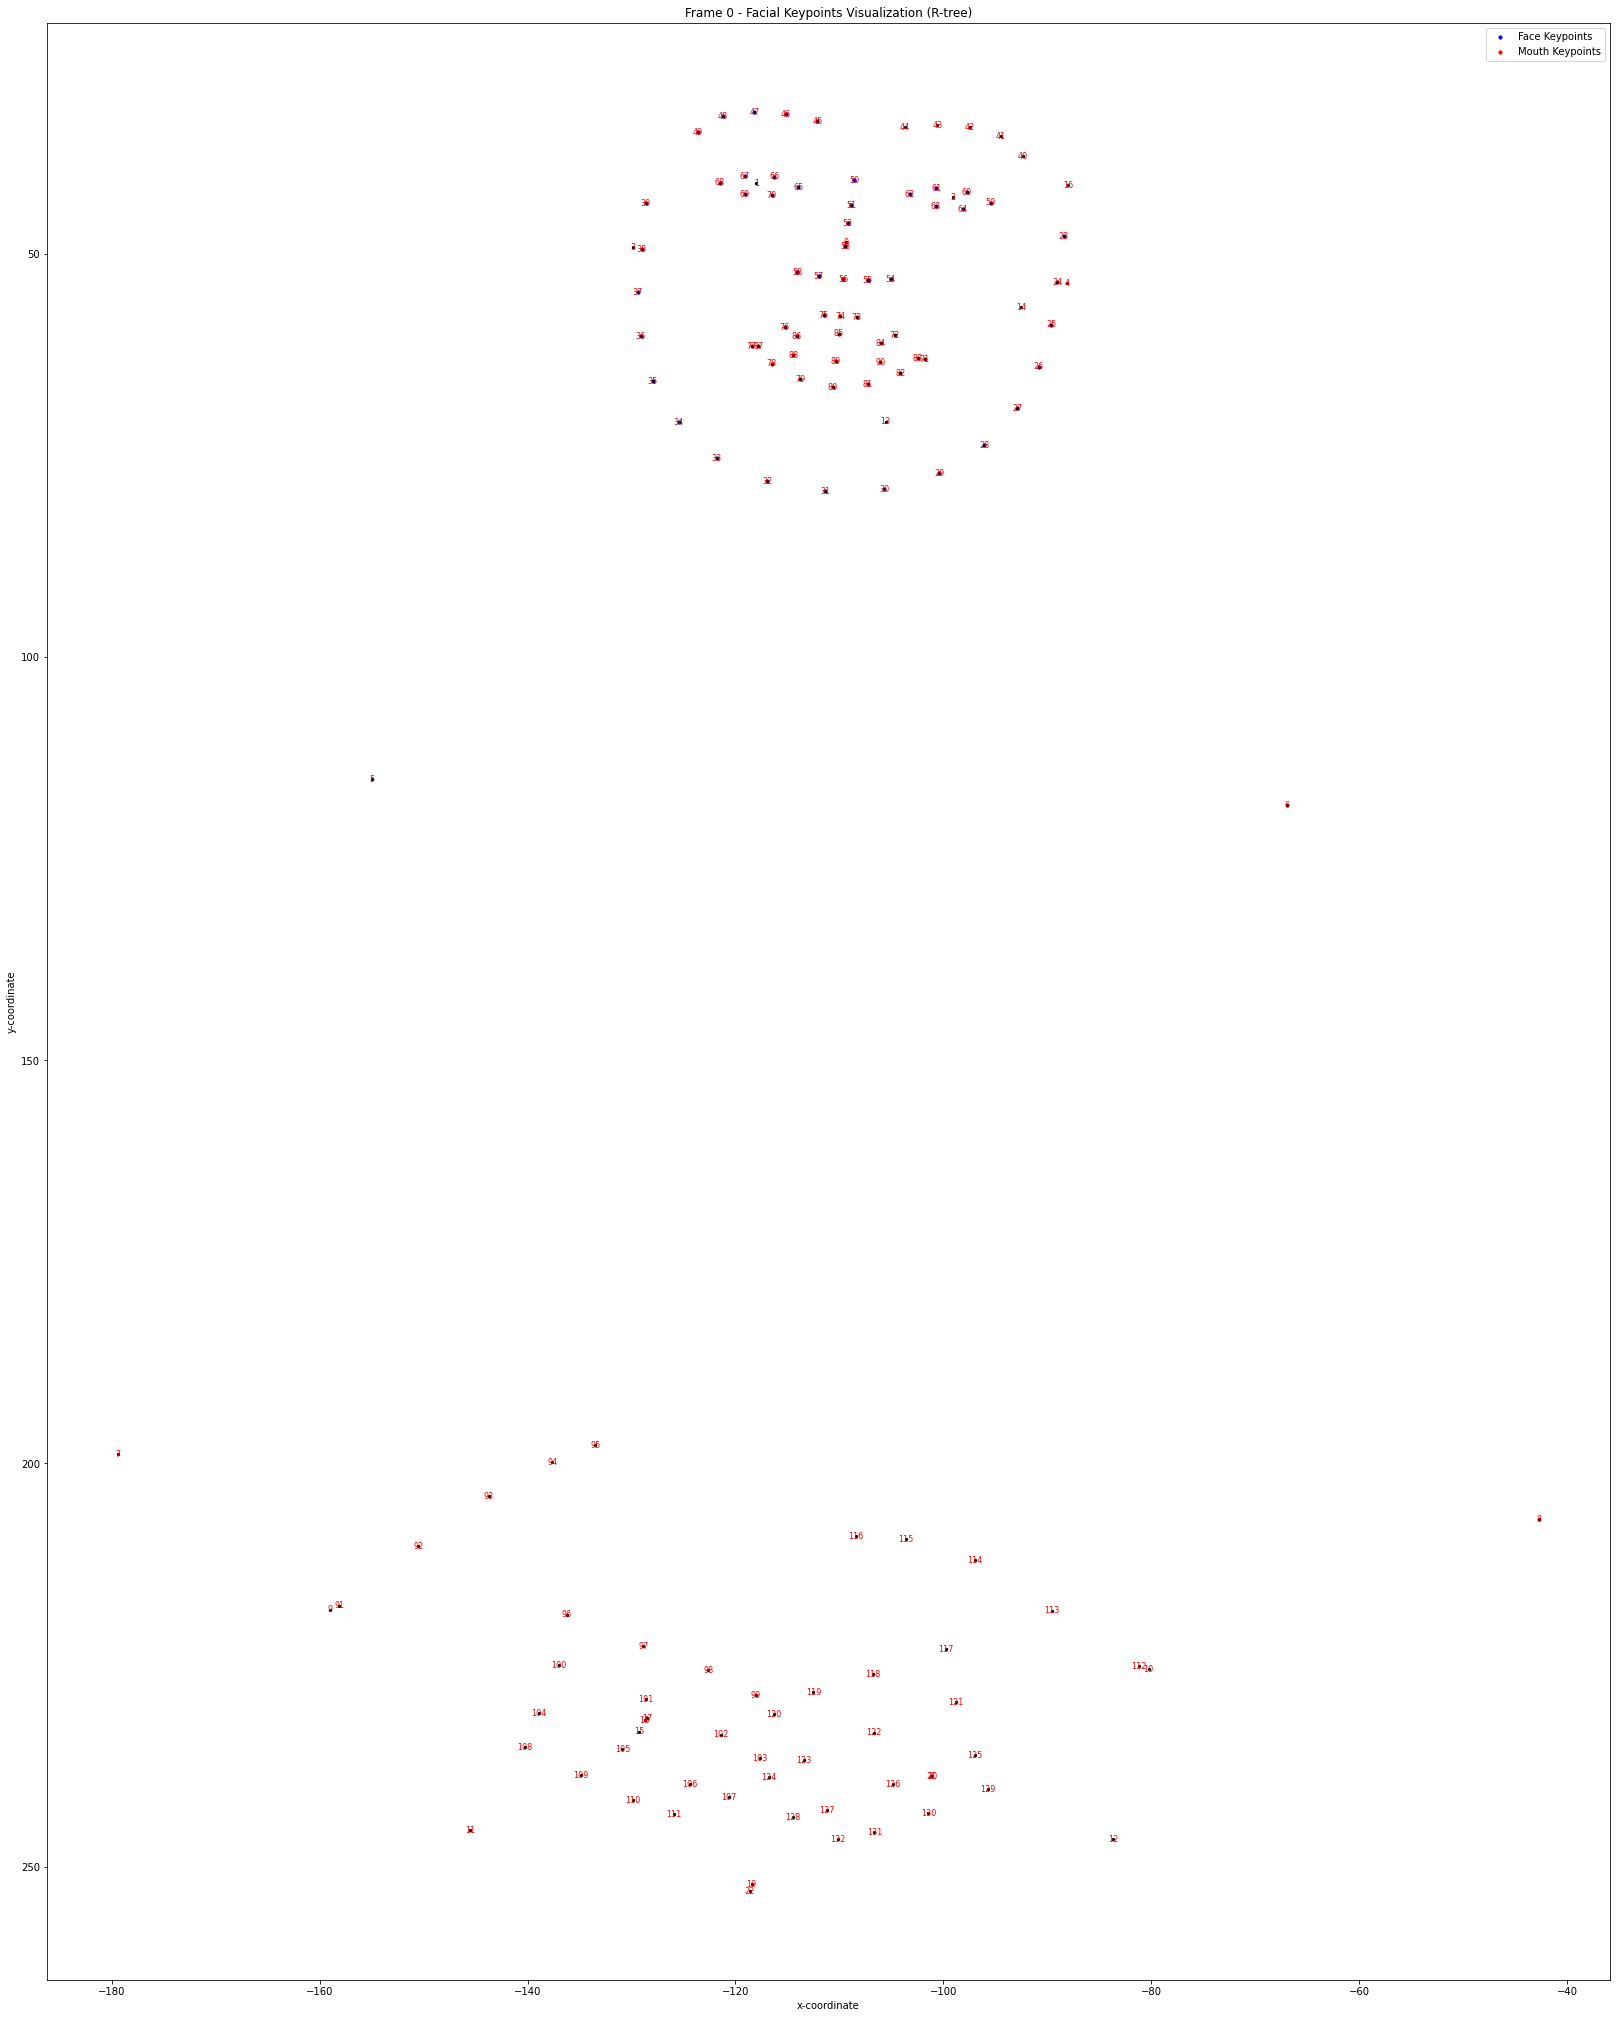

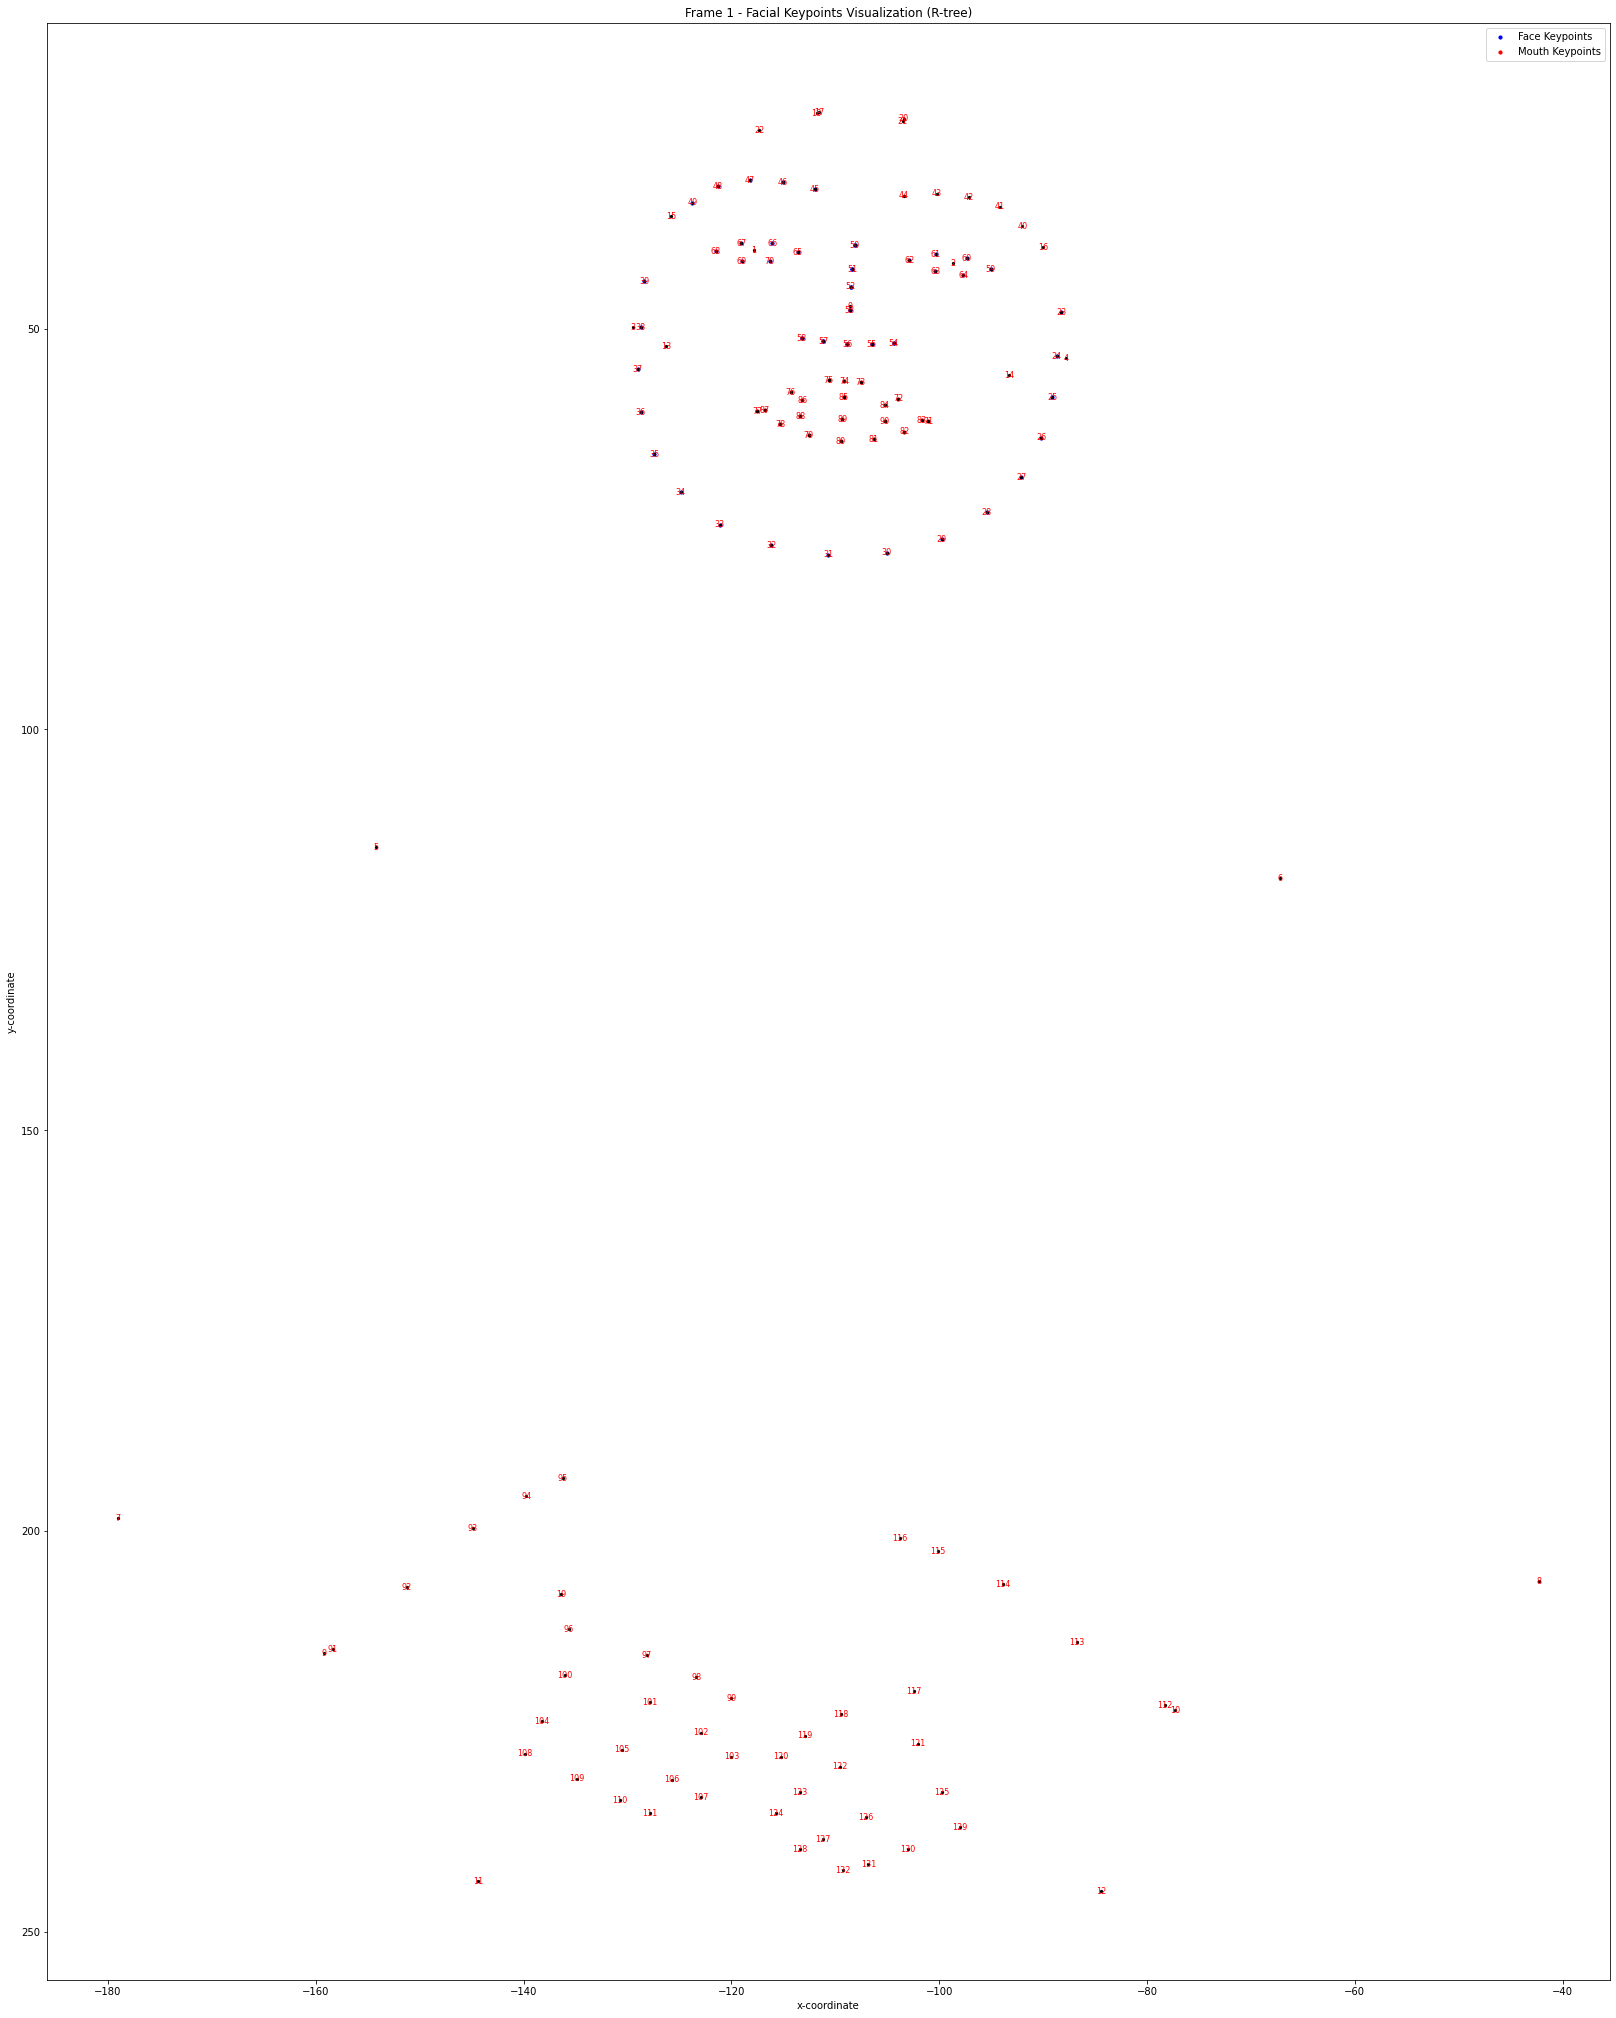

In [36]:
from rtree import index

def create_face_rtree(keypoints):
    face_idx = index.Index()
    face_points = list(range(23, 40)) + list(range(45, 71)) + list(range(50, 59))
    for i in face_points:
        x, y, _ = keypoints[i]
        face_idx.insert(i, (x, y, x, y))
    return face_idx

def create_mouth_rtree(keypoints):
    mouth_idx = index.Index()
    mouth_points = list(range(71, 91))
    for i in mouth_points:
        x, y, _ = keypoints[i]
        mouth_idx.insert(i, (x, y, x, y))
    return mouth_idx

def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))

    # Create R-trees for facial and mouth keypoints
    face_rtree = create_face_rtree(rotated_keypoints)
    mouth_rtree = create_mouth_rtree(rotated_keypoints)

    # Plot face keypoints
    face_points = list(face_rtree.intersection(face_rtree.bounds))
    plt.scatter([rotated_keypoints[i][0] for i in face_points], 
                [-rotated_keypoints[i][1] for i in face_points], 
                color='blue', s=10, label='Face Keypoints')

    # Plot mouth keypoints separately
    mouth_points = list(mouth_rtree.intersection(mouth_rtree.bounds))
    plt.scatter([rotated_keypoints[i][0] for i in mouth_points], 
                [-rotated_keypoints[i][1] for i in mouth_points], 
                color='red', s=10, label='Mouth Keypoints')

    # Define color mapping for different body parts
    color_map = {
        'body': 'green',
        'face': 'red',
        'left_eyes': 'blue',
        'right_eyes': 'blue',
        'left_eyebrows': 'purple',
        'right_eyebrows': 'purple',
        'nose': 'orange',
        'mouth_outer': 'magenta',
        'mouth_inner': 'cyan',
        'right_thumb': 'lime',
        'right_index': 'yellow',
        'right_middle': 'cyan',
        'right_ring': 'pink',
        'right_pinky': 'gold',
        'left_thumb': 'brown',
        'left_index': 'olive',
        'left_middle': 'teal',
        'left_ring': 'coral',
        'left_pinky': 'lavender'
    }

    # Body parts
    body_parts = {
        # ... (same body parts as before)
    }

    # Plot keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=5)

    # Add numbers for each keypoint
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=8, color='red', ha='center', va='center')

    # Draw connections for each body part
    for part, connections in body_parts.items():
        if isinstance(connections, list) and len(connections) > 0:
            if isinstance(connections[0], int):
                # If list of indices
                plt.plot(rotated_keypoints[connections, 0], -rotated_keypoints[connections, 1], 
                         color=color_map.get(part.split('_')[0], 'gray'), linewidth=1)
            else:
                # If list of connection tuples
                for start, end in connections:
                    x_start, y_start = rotated_keypoints[start, 0], -rotated_keypoints[start, 1]
                    x_end, y_end = rotated_keypoints[end, 0], -rotated_keypoints[end, 1]
                    plt.plot([x_start, x_end], [y_start, y_end], 
                             color=color_map.get(part.split('_')[0], 'gray'), linewidth=1)

    plt.title(f"Frame {frame_index} - Facial Keypoints Visualization (R-tree)")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# Main loop remains unchanged
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

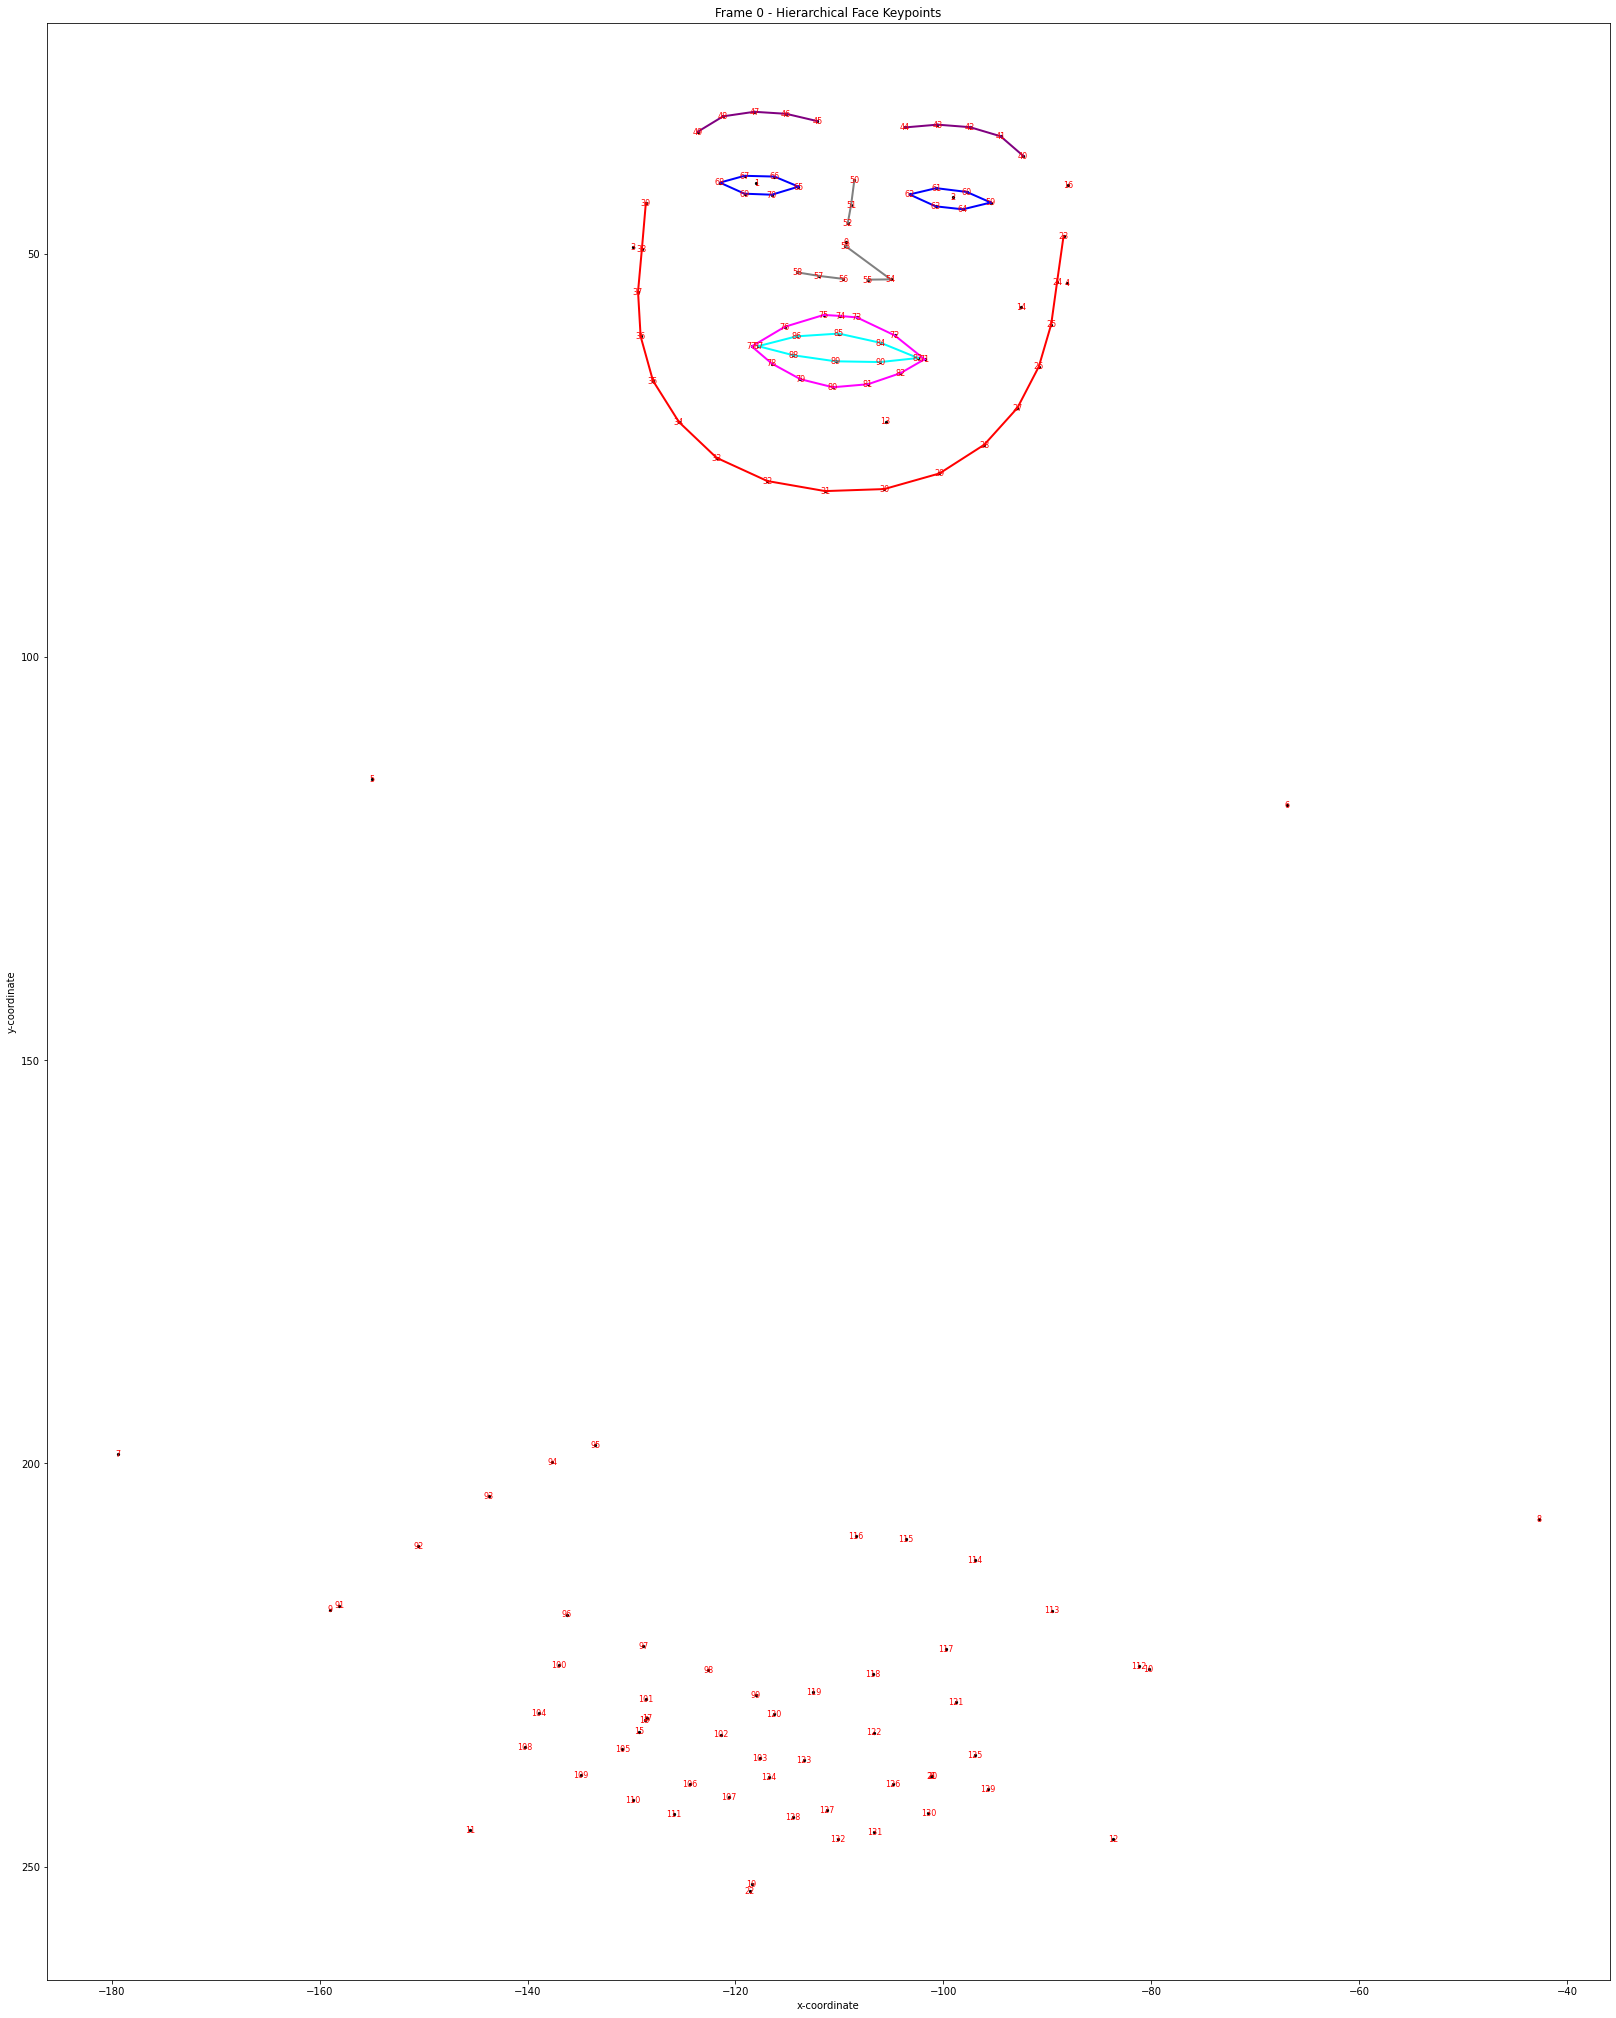

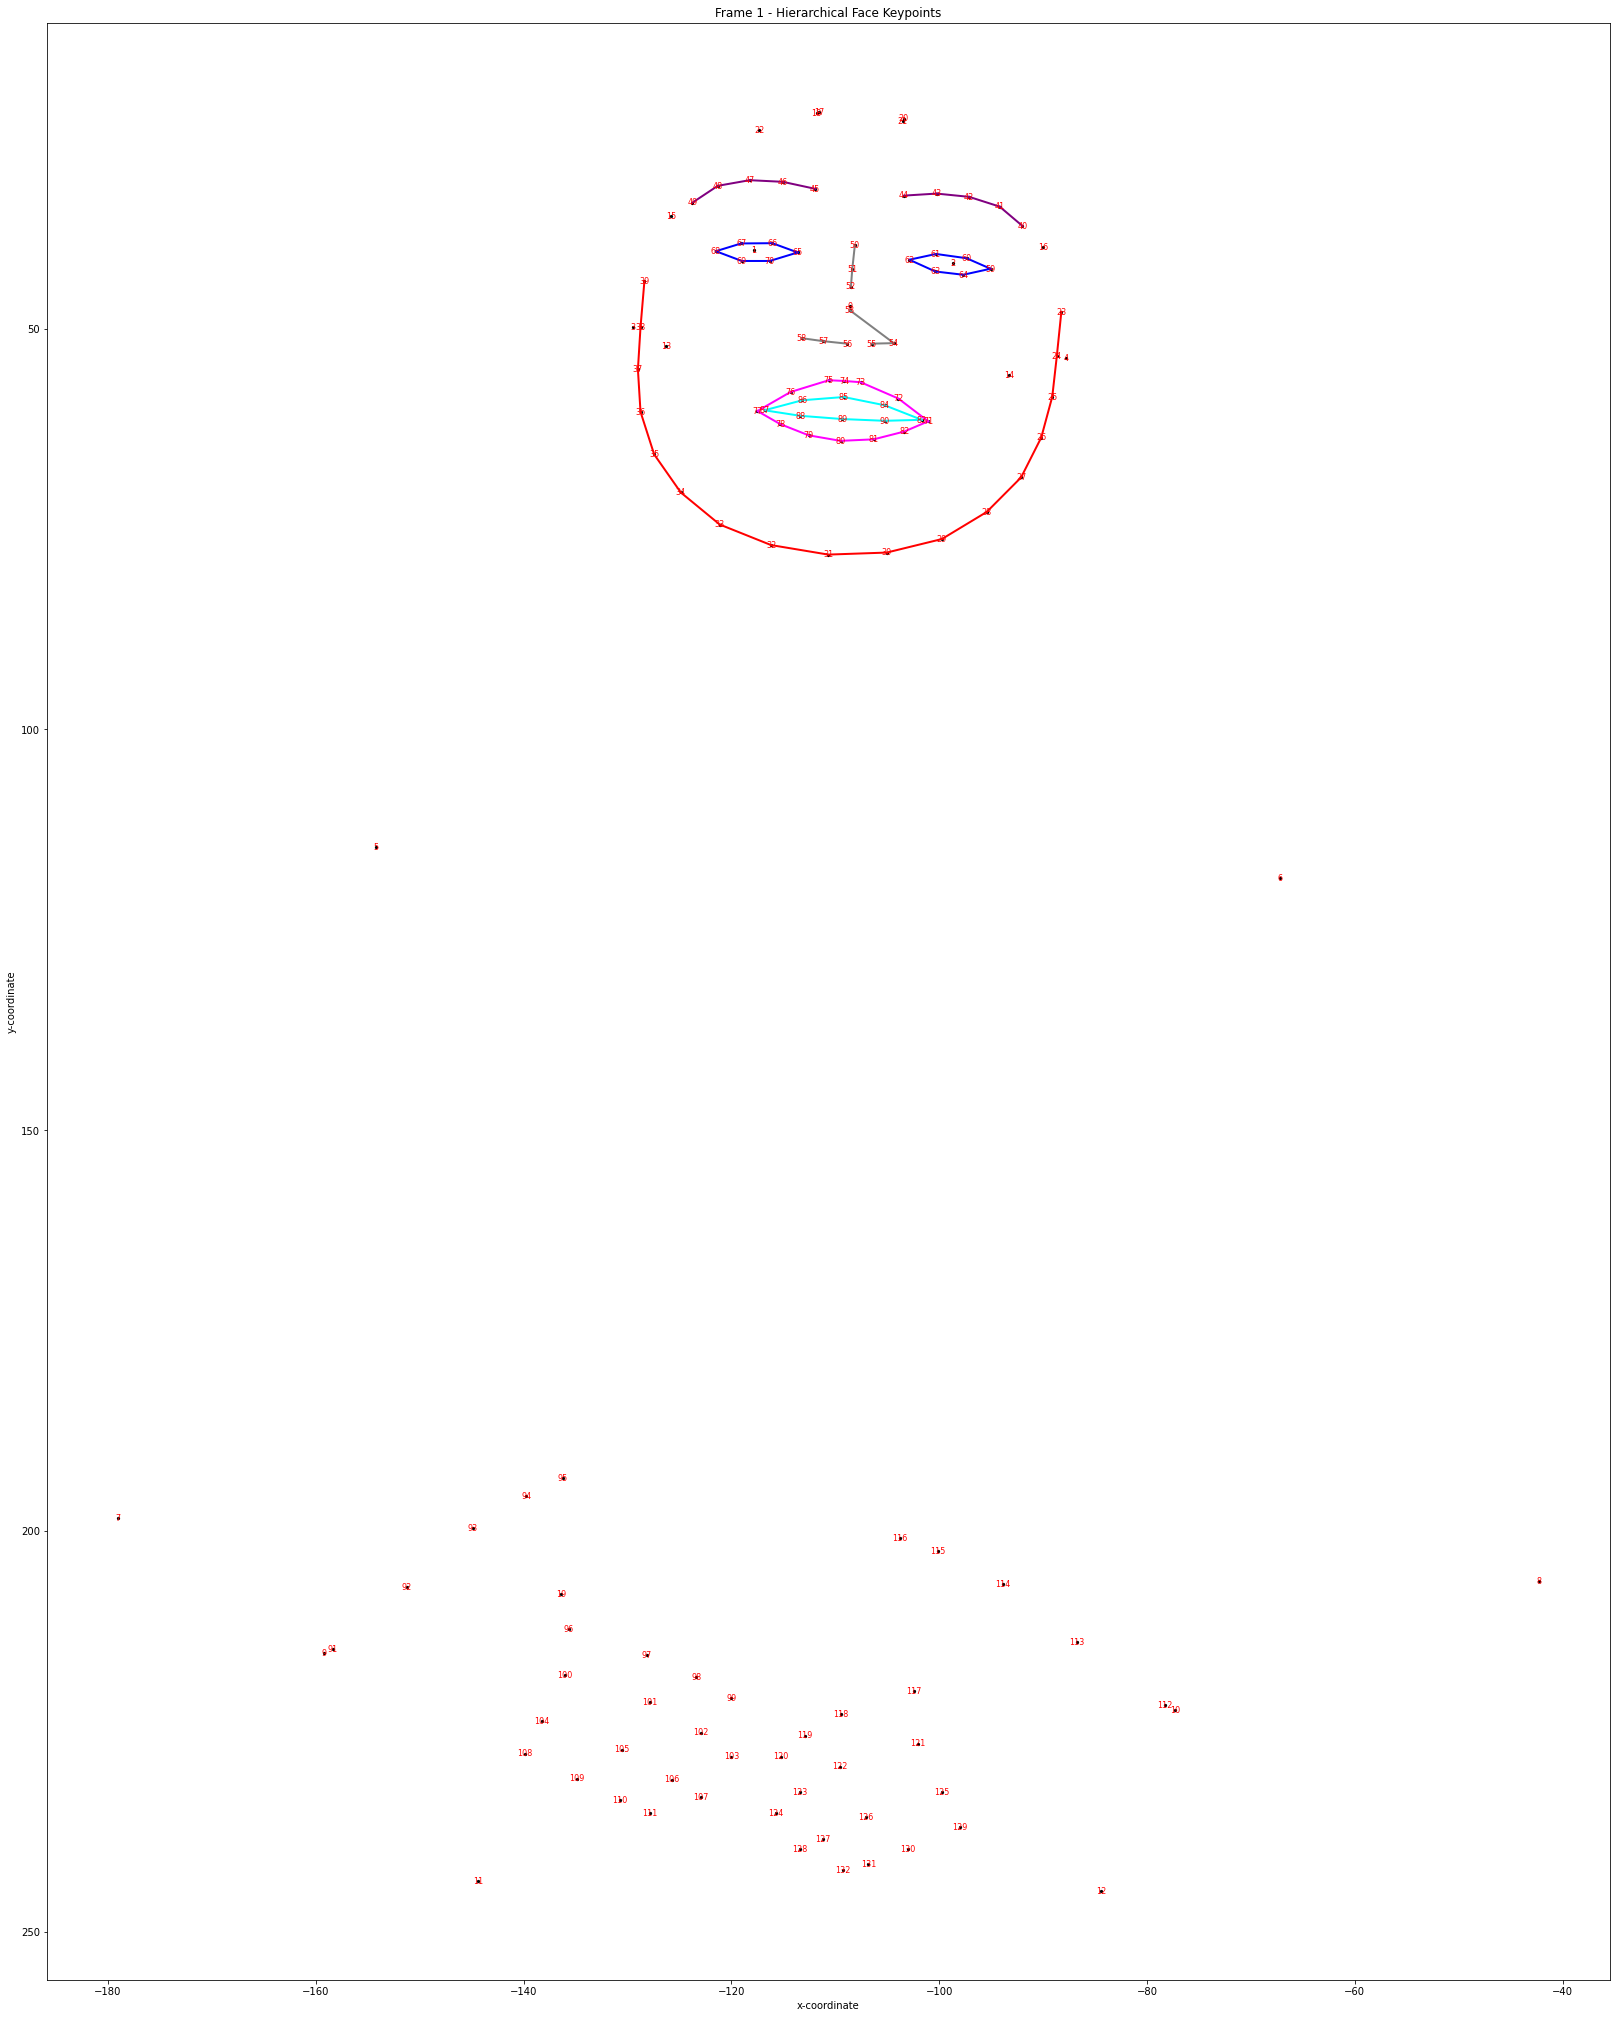

In [38]:
def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))
    
    # Define color mapping for different body parts
    color_map = {
        'face_outline': 'red',
        'face_details': 'orange',
        'left_eyes': 'blue',
        'right_eyes': 'blue',
        'left_eyebrows': 'purple',
        'right_eyebrows': 'purple',
        'nose': 'green',
        'mouth_outer': 'magenta',
        'mouth_inner': 'cyan'
    }
    
    # Hierarchical face keypoint connections
    face_parts = {
        'face_outline': list(range(23, 40)),  # Outer face contour
        'left_eyes': list(range(59, 65)) + [59],  # Left eye area
        'right_eyes': list(range(65, 71)) + [65],  # Right eye area
        'left_eyebrows': [(45, 46), (46, 47), (47, 48), (48, 49)],  # Left eyebrow
        'right_eyebrows': [(40, 41), (41, 42), (42, 43), (43, 44)],  # Right eyebrow
        'nose': {
            'root': list(range(50, 53)),  # Upper nose
            'bridge': list(range(53, 56)),  # Nose bridge
            'tip': list(range(56, 59))  # Nose tip
        },
        'mouth': {
            'outer': list(range(71, 83)) + [71],  # Outer mouth contour
            'inner': list(range(83, 91)) + [83]  # Inner mouth area
        }
    }
    
    # Plot keypoints
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', s=5, label='Keypoints')

    # Add numbers for each keypoint
    for i, (x, y, c) in enumerate(rotated_keypoints):
        plt.text(x, -y, f'{i}', fontsize=8, color='red', ha='center', va='center')

    # Draw hierarchical face connections
    def draw_keypoint_connections(parts, color_key='face_details'):
        if isinstance(parts, dict):
            # Recursive handling for nested structures
            for sub_part, sub_points in parts.items():
                draw_keypoint_connections(sub_points, color_key + '_' + sub_part)
        elif isinstance(parts, list):
            if len(parts) > 0:
                if isinstance(parts[0], int):
                    # Simple list of indices
                    plt.plot(rotated_keypoints[parts, 0], -rotated_keypoints[parts, 1], 
                             color=color_map.get(color_key, 'gray'), linewidth=2)
                else:
                    # List of connection tuples
                    for start, end in parts:
                        x_start, y_start = rotated_keypoints[start, 0], -rotated_keypoints[start, 1]
                        x_end, y_end = rotated_keypoints[end, 0], -rotated_keypoints[end, 1]
                        plt.plot([x_start, x_end], [y_start, y_end], 
                                 color=color_map.get(color_key, 'gray'), linewidth=2)

    # Iterate through face parts and draw connections
    for part, connections in face_parts.items():
        draw_keypoint_connections(connections, part)

    plt.title(f"Frame {frame_index} - Hierarchical Face Keypoints")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.show()
# Main loop remains unchanged
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

In [41]:
from rtree import index
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_r_tree(keypoints, margin=5):
    """
    Creates an R-tree index for keypoints with a specified margin.

    Args:
        keypoints (np.ndarray): Array of keypoint coordinates
        margin (float, optional): Margin around each keypoint. Defaults to 5.

    Returns:
        index.Index: R-tree spatial index
    """

    idx = index.Index()
    for i, point in enumerate(keypoints):
        x, y = point[:2]  # Ensure we only use x and y coordinates
        bbox = (x - margin, y - margin, x + margin, y + margin)
        idx.insert(i, bbox, obj=i)
    return idx

def visualize_keypoints(rotated_keypoints, frame_index):
    plt.figure(figsize=(28, 36))

    # Define color mapping for different body parts
    color_map = {
        'body': 'green',
        'face': 'red',
        'left_eyes': 'blue',
        'right_eyes': 'blue',
        'left_eyebrows': 'purple',
        'right_eyebrows': 'purple',
        'nose': 'orange',
        'mouth_outer': 'magenta',
        'mouth_inner': 'cyan',
        'right_thumb': 'lime',
        'right_index': 'yellow',
        'right_middle': 'cyan',
        'right_ring': 'pink',
        'right_pinky': 'gold',
        'left_thumb': 'brown',
        'left_index': 'olive',
        'left_middle': 'teal',
        'left_ring': 'coral',
        'left_pinky': 'lavender'
    }

    # Body parts (including face as a separate entity for hierarchical visualization)
    body_parts = {
        'body': [(5, 6), (5, 7), (6, 8), (7, 9), (8, 10), (5, 11), (6, 12), (11, 12)],
        'face': list(range(23, 40)),
    }

    # Separate keypoints for facial features (eyes, eyebrows, nose, mouth)
    facial_features = {
        'left_eyes': list(range(59, 65)) + [59],
        'right_eyes': list(range(65, 71)) + [65],
        'left_eyebrows': [(45, 46), (46, 47), (47, 48), (48, 49)],
        'right_eyebrows': [(40, 41), (41, 42), (42, 43), (43, 44)],
        'nose': list(range(50, 59)),
        'mouth_outer': list(range(71, 83)) + [71],
        'mouth_inner': list(range(83, 91)) + [83],
    }

    # Create R-tree for facial keypoints
    r_tree = create_r_tree(rotated_keypoints[body_parts['face']])

    # Plot keypoints (distinguish between body and face)
    plt.scatter(rotated_keypoints[:, 0], -rotated_keypoints[:, 1], color='black', alpha=0.3, s=5, label='All Keypoints')
    plt.scatter(rotated_keypoints[body_parts['face'], 0], -rotated_keypoints[body_parts['face'], 1], color=color_map['face'], alpha=0.7, s=5, label='Face')

    # Add numbers for each keypoint (optional)
    # ... (similar logic for adding numbers)

    # Draw connections for body parts (excluding face)
    for part, connections in body_parts.items():
        if part != 'face' and isinstance(connections, list) and len(connections) > 0:
            # ... (similar logic for drawing connections)

    # Hierarchical visualization for facial features within the face region
    for feature_name, feature_indices in facial_features.items():
        # Search for feature keypoints using R-tree
        feature_bbox = get_feature_bounding_box(rotated_keypoints, feature_indices)
        feature_keypoint_indices = list(r_tree.intersection(feature_bbox))

        # Plot and potentially connect feature keypoints
        plt.scatter(rotated_keypoints[feature_keypoint_indices, 0], -rotated_keypoints[feature_keypoint_indices, 1], 
                    color=color_map[feature_name], s=10, label=feature_name)
        
        # ... (logic for connecting feature keypoints based on feature_indices)

    plt.title(f"Frame {frame_index} - Keypoints Visualization")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# ... (other functions including create_r_tree and get_feature_bounding_box)

# ... (other functions including create_r_tree and get_feature_bounding_box)
# Main loop remains unchanged
# Main loop remains unchanged
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index, frame_keypoints in enumerate(keypoints[:2]):
            rotated_keypoints = rotate_keypoints_180(frame_keypoints)
            visualize_keypoints(rotated_keypoints, frame_index)
        break

IndentationError: expected an indented block (<ipython-input-41-f072116bde13>, line 84)